Serie temporal sistema lagunar peine

ingreso de series temporales de pozos de monitoreo de nivel en peine, mediciones por SQM 

In [128]:

import os
import pandas as pd
import pastas as ps
import matplotlib.pyplot as plt
import pymannkendall as mk
import numpy as np
from scipy import stats


ps.set_log_level("ERROR")
ps.show_versions()

Pastas version: 1.8.1
Python version: 3.11.8
NumPy version: 2.1.3
Pandas version: 2.2.3
SciPy version: 1.15.2
Matplotlib version: 3.10.0
Numba version: 0.61.0


aca se configura la ruta a la base de datos , para los niveles, la precipitacion y la evaporacion.

In [154]:
# --- Paso 1: Configuración inicial ---


carpeta_pozos = os.path.join('datos', 'pozos nivel peine')

# Rutas de los archivos de estrés (precipitación y evaporación)
archivos_precipitacion = [os.path.join('datos', 'resultados_meteo', 'precip', 'Prec_CHAXA.csv'), 
                          os.path.join('datos', 'resultados_meteo', 'precip', 'Prec_LZA9-1 (Interna).csv'), 
                          os.path.join('datos', 'resultados_meteo', 'precip', 'Prec_LZA10-1.csv')]
archivos_evaporacion = [os.path.join('datos', 'resultados_meteo', 'evap', 'Evap_CHAXA.csv'), 
                        os.path.join('datos', 'resultados_meteo', 'evap', 'Evap_LZA9-1 (Interna).csv')]

In [ ]:
reference_levels = pd.Series({
    "Pozo 1024": 2300.950,
    "Pozo 1028": 2301.448,
    "Pozo 2037": 2301.929,
    "Pozo 2018": 2301.762,
    "Pozo GD-03": 2301.051,
    "Pozo GD-04": 2300.880,
    "Pozo L10-1": 2305.996,
    "Pozo L10-2": 2301.602,
    "Pozo L10-3": 2301.877,
    "Pozo L10-4": 2301.882,
    "Pozo L10-5": 2301.747,
    "Pozo L10-6": 2301.760,
    "Pozo L10-7": 2301.976,
    "Pozo L10-8": 2301.993,
    "Pozo L10-9": 2302.035,
    "Pozo L10-10": 2302.046,
    "Pozo L10-11": 2301.782,
    "Pozo L10-12": 2301.832,
    "Pozo L10-13": 2301.961,
    "Pozo L10-14": 2302.007,
    "Pozo L10-15": 2301.859,
    "Pozo L10-16": 2301.935,
    "Pozo L10-17": 2301.901,
    "REGLILLA INTERNA CONAF": 2301.456,
    "REGLILLA SALADA CONAF": 2301.963,
    "REGLILLA SALADITA CONAF": 2301.762
})

Pozo 2018
REGLILLA SALADITA CONAF
Pozo 2037
Pozo 1028
Pozo L10-8
Pozo L10-9
Pozo L10-4
Pozo GD-04
Pozo L10-5
Pozo L10-7
REGLILLA INTERNA CONAF
Pozo L10-6
Pozo L10-2
Pozo GD-03
Pozo 1024
Pozo L10-3
Pozo L10-1
Pozo L10-13
Pozo L10-12
Pozo L10-10
Pozo L10-11
Pozo L10-15
REGLILLA SALADA CONAF
Pozo L10-14
Pozo L10-16
Pozo L10-17
{'Pozo 2018': Fecha
2007-04-09    2300.462
2007-02-10    2300.419
NaT           2300.414
2007-06-12    2300.411
NaT           2300.404
                ...   
NaT           2299.687
NaT           2299.681
NaT           2299.677
NaT           2299.670
NaT           2299.672
Name: Pozo 2018, Length: 240, dtype: float64, 'REGLILLA SALADITA CONAF': Fecha
2005-01-01    2300.947
2005-01-05    2300.952
2005-01-08    2300.967
2005-01-10         NaN
2006-01-02    2300.952
                ...   
NaT                NaN
NaT                NaN
NaT                NaN
NaT                NaN
NaT                NaN
Name: Pozo REGLILLA SALADITA CONAF, Length: 137, dtype: float64, 'Poz

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a fo

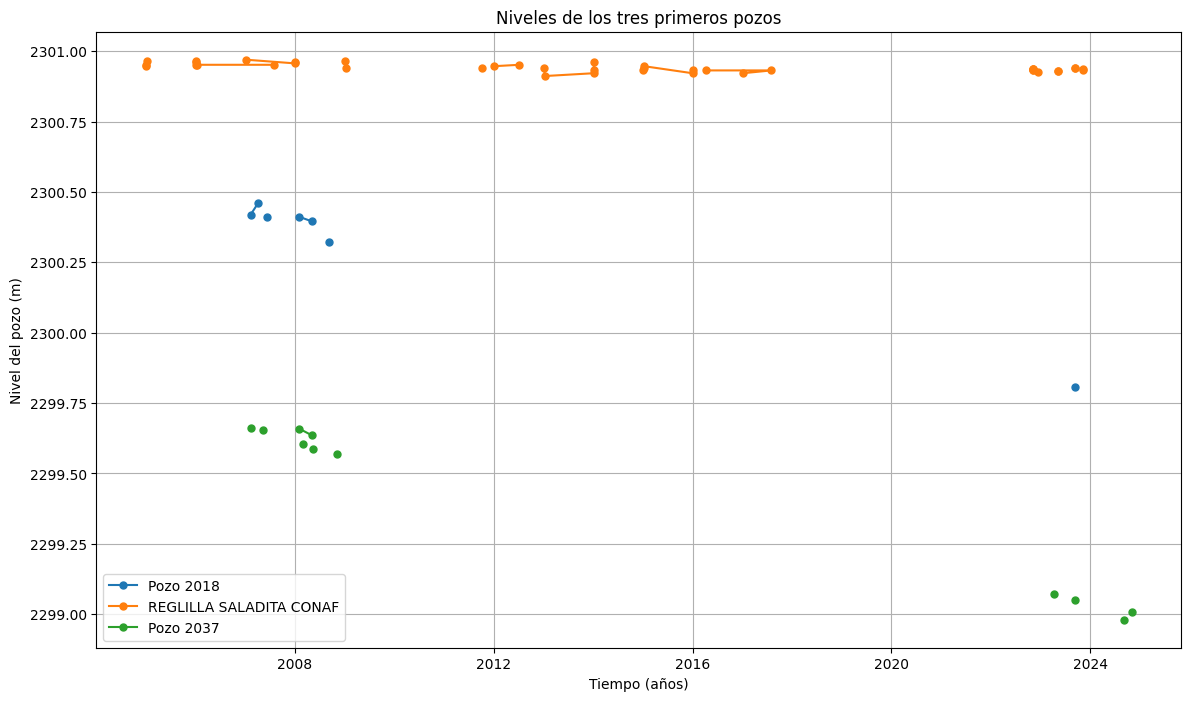

**********
Fecha
1999-08-01    0.0
1999-08-02    0.0
1999-08-03    0.0
1999-08-04    0.0
1999-08-05    0.0
             ... 
2024-12-27    0.0
2024-12-28    0.0
2024-12-29    0.0
2024-12-30    0.0
2024-12-31    0.0
Freq: D, Name: Precipitación, Length: 9285, dtype: float64


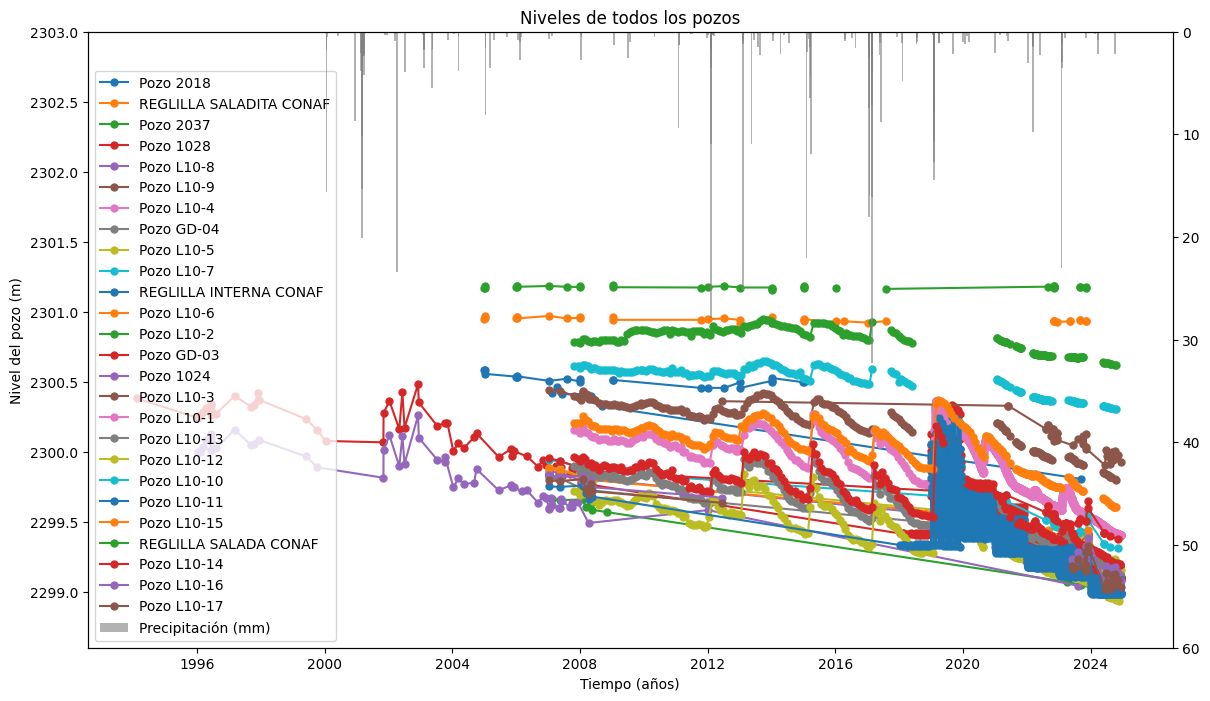

                  Bore Name  Statistic (Z)  Statistic (S)  \
0                 Pozo 2018     -14.124830       -17342.0   
1   REGLILLA SALADITA CONAF      -4.037200        -1273.0   
2                 Pozo 2037     -12.966392       -15720.0   
3                 Pozo 1028     -32.217602     -1497884.0   
4                Pozo L10-8      -7.506201        -7104.0   
5                Pozo L10-9     -16.376724       -15614.0   
6                Pozo L10-4     -62.820168     -2682946.0   
7                Pozo GD-04      -7.014859        -6540.0   
8                Pozo L10-5      -9.545691       -13533.0   
9                Pozo L10-7      -6.808858        -6396.0   
10   REGLILLA INTERNA CONAF      -3.303732         -272.0   
11               Pozo L10-6      -6.757713        -6348.0   
12               Pozo L10-2     -10.894800       -10233.0   
13               Pozo GD-03      -5.420763        -5169.0   
14                Pozo 1024     -19.621018       -46454.0   
15               Pozo L1

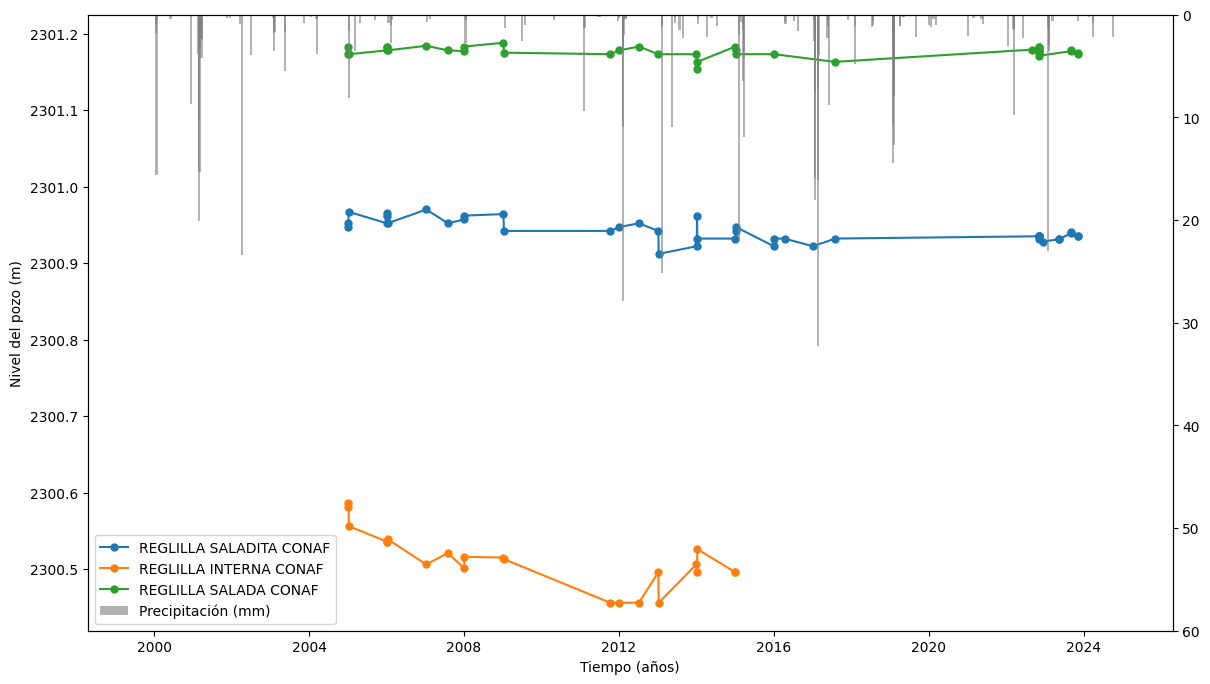

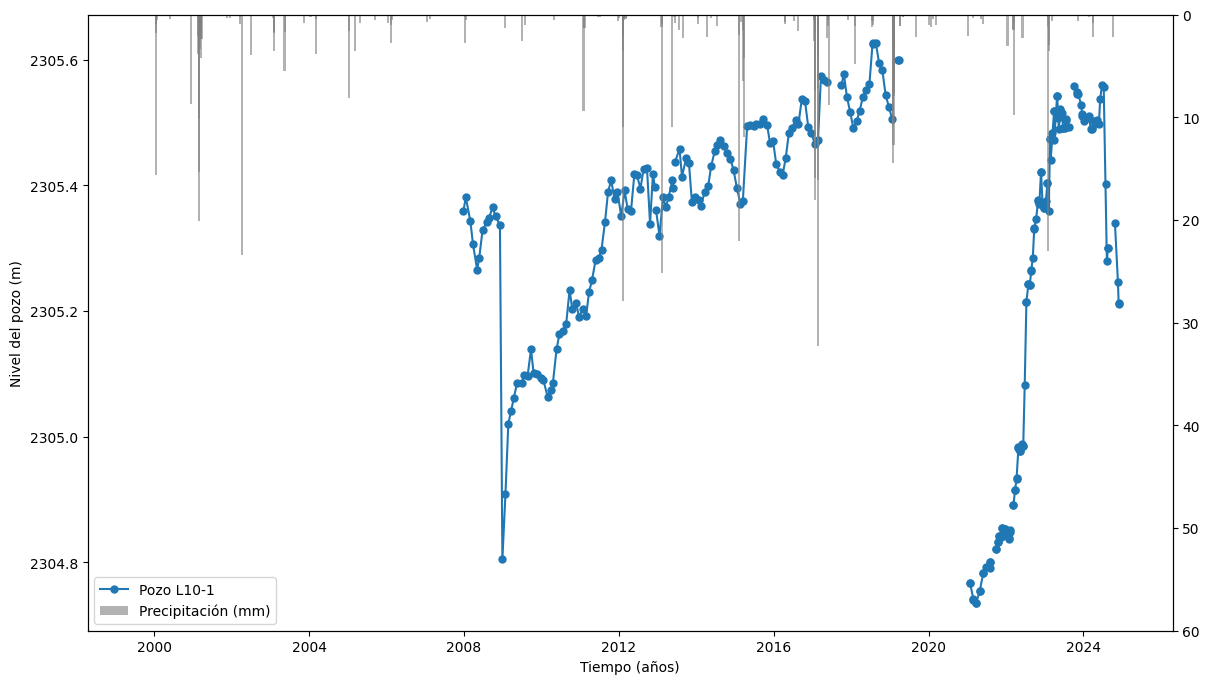

In [ ]:

# Leer los datos de nivel de los pozos
datos_pozos = {}

for archivo in os.listdir(carpeta_pozos):
    if archivo.endswith(".csv"):
        nombre_pozo = archivo.split(".")[0]
        print(nombre_pozo)
        ruta_archivo = os.path.join(carpeta_pozos, archivo)
        
        # Leer el archivo CSV y convertirlo en una Series
        datos = pd.read_csv(ruta_archivo, index_col=0, parse_dates=True)
        datos.index = pd.to_datetime(datos.index, errors='coerce')  # Asegurarse de que el índice sea de tipo datetime
        datos_series = datos.squeeze("columns")  # Convertir DataFrame a Series
        # if "REGLILLA" in nombre_pozo:
        datos_series = reference_levels[nombre_pozo] - datos_series # Heads
        # else:
        #     datos_series = reference_levels[nombre_pozo[5:]] - datos_series # Heads
        # datos_series = datos_series - 2300 # Heads above 2300 msnm
        datos_pozos[nombre_pozo] = datos_series 

print(datos_pozos)
plt.figure(figsize=(14, 8))

for i, (pozo, datos) in enumerate(datos_pozos.items()):
    if i < 3:
        plt.plot(datos.index, datos.values, label=pozo, marker='o', linestyle='-', markersize=5)

plt.xlabel('Tiempo (años)')
plt.ylabel('Nivel del pozo (m)')
plt.title('Niveles de los tres primeros pozos')
plt.legend()
plt.grid(True)
plt.show()

pp =pd.read_csv(os.path.join('datos', 'resultados_meteo', 'precip', 'Prec_CHAXA.csv'), index_col=0, parse_dates=True)#, format='%d/%m/%Y')
pp.index = pd.to_datetime(pp.index, format='%d/%m/%Y')
pp = pp.squeeze("columns")
pp = pp.resample('D').sum()
# pp = pp.resample('M').sum()
print("**********")
print(pp)

results = []

# Graficar los datos de todos los pozos
fig, ax1 = plt.subplots(figsize=(14, 8))

for pozo, datos in datos_pozos.items():
    if True:#pozo != "Pozo REGLILLA SALADITA CONAF" and pozo != "Pozo REGLILLA SALADA CONAF" and pozo != "Pozo REGLILLA INTERNA CONAF" and pozo != "Pozo L10-1" and pozo != "Pozo L10-11" and pozo != "Pozo 1028" and pozo != "Pozo 1024":
        datos.sort_index(inplace=True)
        datos.resample('D').mean()
        trend_test = mk.original_test(datos)
        trend = "Increasing" if trend_test.trend == "increasing" else "Decreasing" if trend_test.trend == "decreasing" else "Stable"
        # S = trend_test.s
        # Z = trend_test.z
        # p_value = trend_test.p
        # trend = trend_test.trend  # 'increasing', 'decreasing', or 'no trend'
        results.append([pozo, trend_test.z, trend_test.s, trend_test.p, trend])
        

        ax1.plot(datos.index, datos.values, label=pozo, marker='o', linestyle='-', markersize=5)
        

ax2 = ax1.twinx()
ax2.invert_yaxis() 
ax2.bar(pp.index, pp.values, width=20, color='gray', alpha=0.6, label='Precipitación (mm)')
# ax2.set_yscale('log')
ax1.set_ylim(2298.6,2303)
ax2.set_ylim(60, 0)

ax1.set_xlabel('Tiempo (años)')
ax1.set_ylabel('Nivel del pozo (m)')
plt.title('Niveles de todos los pozos')
# plt.legend(loc='best')
# plt.xlim('2002', '2028')
# plt.tight_layout()
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc="lower left")  # Leyenda combinada

# plt.grid(True)
plt.show()

results_df = pd.DataFrame(results, columns=["Bore Name", "Statistic (Z)","Statistic (S)","Statistic (p-value)", "Trend"])
results_df.to_csv("results.csv", index=False)
print(results_df)

fig, ax1 = plt.subplots(figsize=(14, 8))

for pozo, datos in datos_pozos.items():
    if pozo == "REGLILLA SALADITA CONAF" or pozo == "REGLILLA SALADA CONAF" or pozo == "REGLILLA INTERNA CONAF":
        datos.dropna(inplace=True)
        datos.sort_index(inplace=True)
        ax1.plot(datos.index, datos.values, label=pozo, marker='o', linestyle='-', markersize=5)
        

ax2 = ax1.twinx()
ax2.invert_yaxis() 
ax2.bar(pp.index, pp.values, width=20, color='gray', alpha=0.6, label='Precipitación (mm)')
# ax2.set_yscale('log')
# ax1.set_ylim(2298.6,2303)
ax2.set_ylim(60, 0)

ax1.set_xlabel('Tiempo (años)')
ax1.set_ylabel('Nivel del pozo (m)')
# plt.title('Niveles de todos los pozos')
# plt.legend(loc='best')
# plt.xlim('2002', '2028')
# plt.tight_layout()
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc="lower left")  # Leyenda combinada

# plt.grid(True)
plt.show()

fig, ax1 = plt.subplots(figsize=(14, 8))

for pozo, datos in datos_pozos.items():
    if pozo == "Pozo L10-1":# or pozo == "Pozo L10-11" or pozo == "Pozo 1028" or pozo == "Pozo 1024":
        ax1.plot(datos.index, datos.values, label=pozo, marker='o', linestyle='-', markersize=5)
        

ax2 = ax1.twinx()
ax2.invert_yaxis() 
ax2.bar(pp.index, pp.values, width=20, color='gray', alpha=0.6, label='Precipitación (mm)')
# ax2.set_yscale('log')
# ax1.set_ylim(2298.6,2303)
ax2.set_ylim(60, 0)

ax1.set_xlabel('Tiempo (años)')
ax1.set_ylabel('Nivel del pozo (m)')
# plt.title('Niveles de todos los pozos')
# plt.legend(loc='best')
# plt.xlim('2002', '2028')
# plt.tight_layout()
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc="lower left")  # Leyenda combinada

# plt.grid(True)
plt.show()

Datos de precipitación:
Fecha
01/01/2000    0.0
01/01/2001    0.0
01/01/2003    0.0
01/01/2004    0.0
01/01/2005    0.0
Name: Precipitación, dtype: float64

Datos de evaporación:
Fecha
01/01/2000    10.60
01/01/2001     8.20
01/01/2003    12.90
01/01/2004    12.20
01/01/2005    10.63
Name: Evaporación, dtype: float64


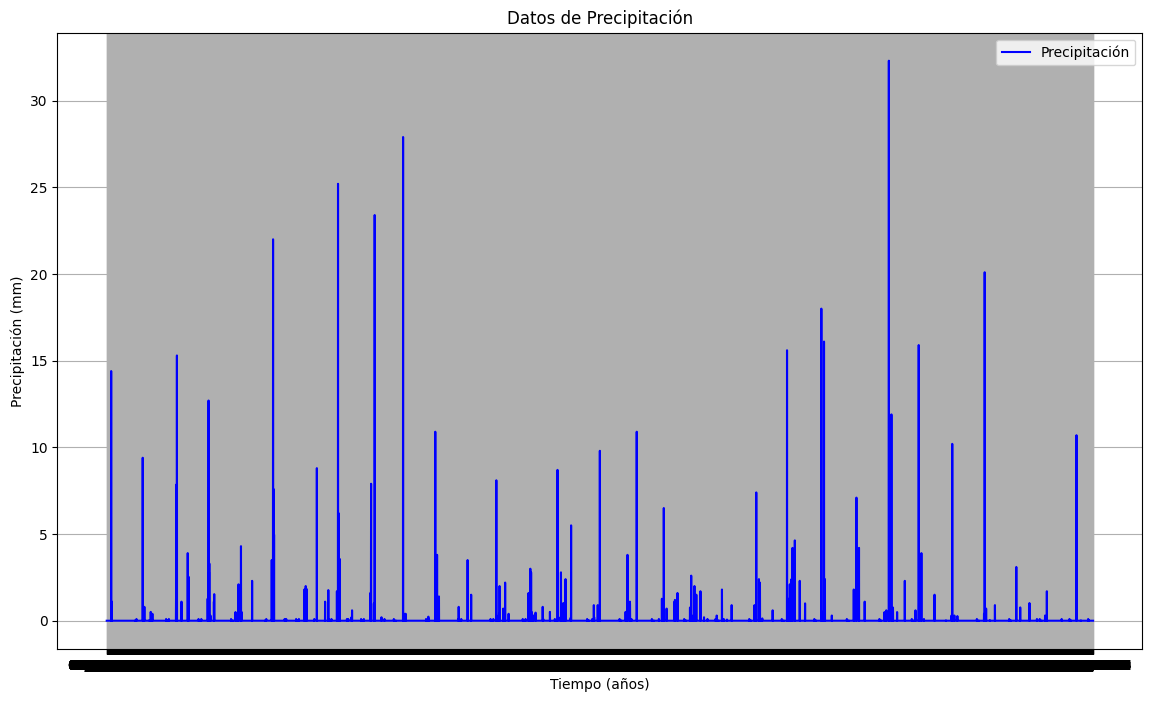

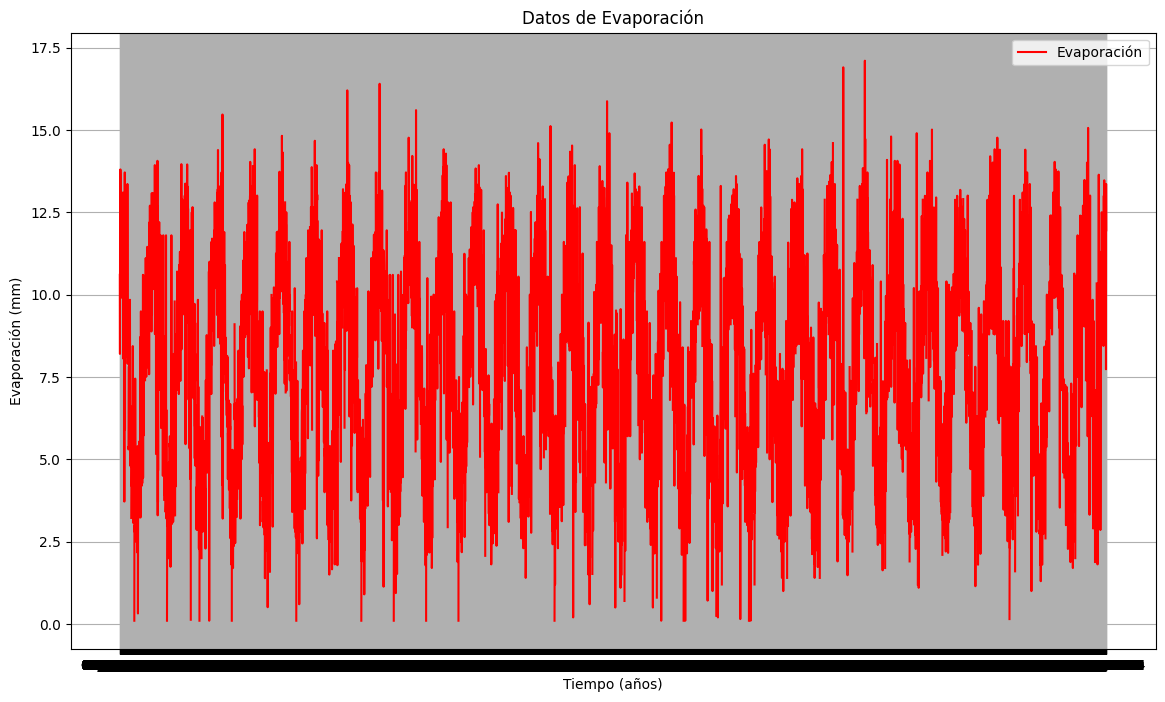

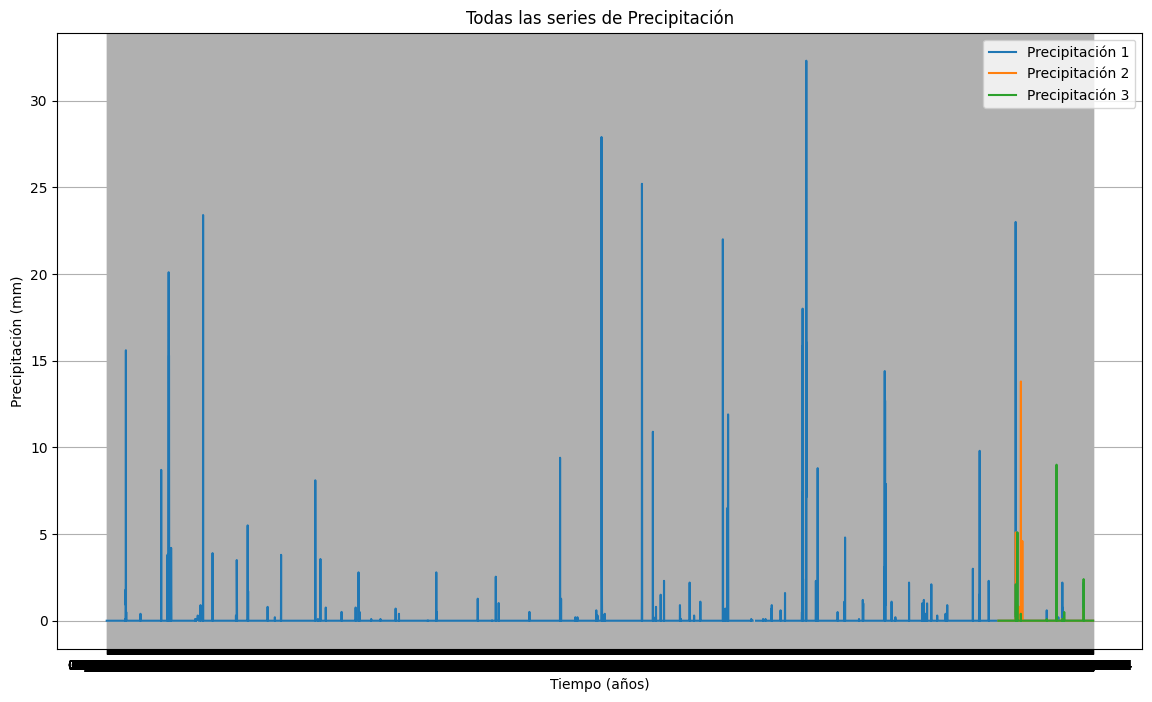

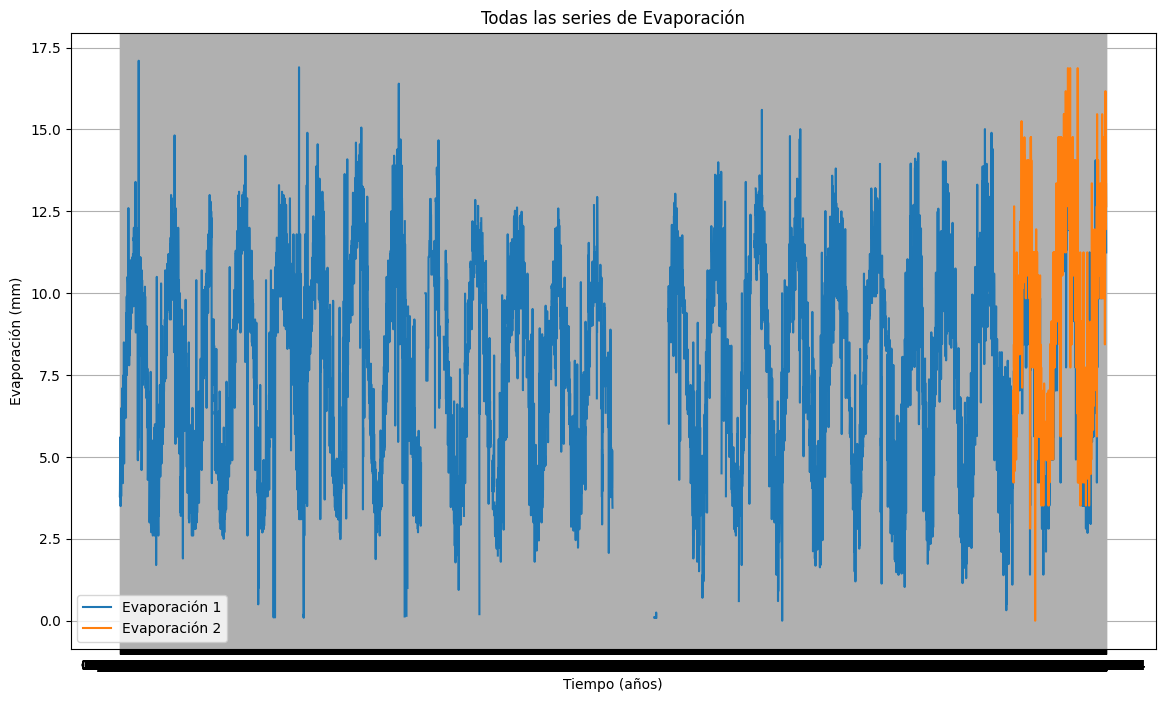

In [99]:
# --- Paso 2: Leer datos de estrés ---
# Leer y concatenar datos de precipitación
precipitacion_list = [pd.read_csv(archivo, index_col=0, parse_dates=True).squeeze("columns") for archivo in archivos_precipitacion]
precipitacion = pd.concat(precipitacion_list).groupby(level=0).mean()

# Leer y concatenar datos de evaporación
evaporacion_list = [pd.read_csv(archivo, index_col=0, parse_dates=True).squeeze("columns") for archivo in archivos_evaporacion]
evaporacion = pd.concat(evaporacion_list).groupby(level=0).mean()

# Verificar que los datos se han leído correctamente
print("Datos de precipitación:")
print(precipitacion.head())
print("\nDatos de evaporación:")
print(evaporacion.head())


# Graficar los datos de estrés (precipitación y evaporación) por separado

# Graficar datos de precipitación
plt.figure(figsize=(14, 8))
plt.plot(precipitacion.index, precipitacion.values, label='Precipitación', color='blue', linestyle='-')
plt.xlabel('Tiempo (años)')
plt.ylabel('Precipitación (mm)')
plt.title('Datos de Precipitación')
plt.legend()
plt.grid(True)
plt.show()

# Graficar datos de evaporación
plt.figure(figsize=(14, 8))
plt.plot(evaporacion.index, evaporacion.values, label='Evaporación', color='red', linestyle='-')
plt.xlabel('Tiempo (años)')
plt.ylabel('Evaporación (mm)')
plt.title('Datos de Evaporación')
plt.legend()
plt.grid(True)
plt.show()

# Graficar todas las series de precipitación juntas
plt.figure(figsize=(14, 8))
for i, serie in enumerate(precipitacion_list):
    plt.plot(serie.index, serie.values, label=f'Precipitación {i+1}', linestyle='-')
plt.xlabel('Tiempo (años)')
plt.ylabel('Precipitación (mm)')
plt.title('Todas las series de Precipitación')
plt.legend()
plt.grid(True)
plt.show()

# Graficar todas las series de evaporación juntas
plt.figure(figsize=(14, 8))
for i, serie in enumerate(evaporacion_list):
    plt.plot(serie.index, serie.values, label=f'Evaporación {i+1}', linestyle='-')
plt.xlabel('Tiempo (años)')
plt.ylabel('Evaporación (mm)')
plt.title('Todas las series de Evaporación')
plt.legend()
plt.grid(True)
plt.show()


            MPW-1  MPW-10  MPW-11  MPW-12  MPW-13  MPW-14  MPW-15  MPW-16  \
fecha                                                                       
1995-05-31    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1995-06-30    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1995-07-31    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1995-08-31    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1995-09-30    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...           ...     ...     ...     ...     ...     ...     ...     ...   
2022-04-30    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2022-05-31    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2022-06-30    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2022-07-31    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2022-08-31    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

'M' is deprecated and will be removed in a future version, please use 'ME' instead.'M' is deprecated and will be removed in a future version, please use 'ME' instead.'M' is deprecated and will be removed in a future version, please use 'ME' instead.'M' is deprecated and will be removed in a future version, please use 'ME' instead.'M' is deprecated and will be removed in a future version, please use 'ME' instead.'M' is deprecated and will be removed in a future version, please use 'ME' instead.'M' is deprecated and will be removed in a future version, please use 'ME' instead.

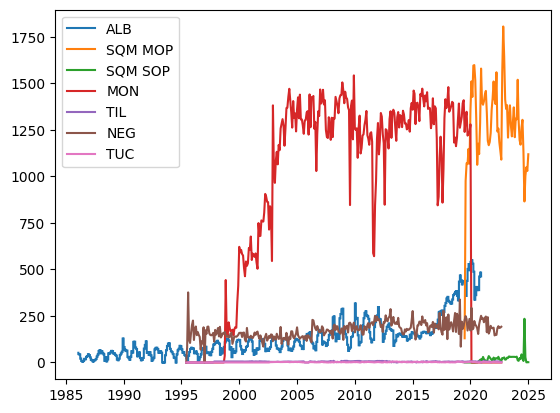

In [100]:
ALB = pd.read_csv(os.path.join("datos","pumping","ALB_pumping.csv"))
ALB["date"] = pd.to_datetime(ALB["DATE"], format="%Y-%m-%d")
ALB.set_index("date", inplace=True)

SQM = pd.read_csv(os.path.join("datos","pumping","SQM_pumping.csv"))
SQM["date"] = pd.to_datetime(SQM["Fecha final"], format="%Y-%m-%d")
SQM.set_index("date", inplace=True)

MON = pd.read_csv(os.path.join("datos","pumping","Monturaqui_pumping.csv"))
MON["fecha"] = pd.to_datetime(MON["fecha"], format="%d/%m/%Y")
MON.set_index("fecha", inplace=True)
print(MON)
MON['Total'] = MON.sum(axis=1)*-1
print(MON)

TIL = pd.read_csv(os.path.join("datos","pumping","tilopozo_pumping.csv"))
TIL["fecha"] = pd.to_datetime(TIL["fecha"], format="%d/%m/%Y")
TIL.set_index("fecha", inplace=True)
TIL['Total'] = TIL.sum(axis=1)*-1

NEG = pd.read_csv(os.path.join("datos","pumping","negrillar_pumping.csv"))
NEG["fecha"] = pd.to_datetime(NEG["fecha"], format="%d/%m/%Y")
NEG.set_index("fecha", inplace=True)
NEG['Total'] = NEG.sum(axis=1)*-1

TUC = pd.read_csv(os.path.join("datos","pumping","tucucaro_pumping.csv"))
TUC["fecha"] = pd.to_datetime(TUC["fecha"], format="%d/%m/%Y")
TUC.set_index("fecha", inplace=True)
TUC['Total'] = TUC.sum(axis=1)*-1

SQM_mop = pd.read_csv(os.path.join("datos","pumping","sqm","Bombeo mop","merged_output_mop.csv"))
SQM_mop["date"] = pd.to_datetime(SQM_mop["Fecha final"], format="%Y-%m-%d")
SQM_mop.set_index("date", inplace=True)


SQM_sop = pd.read_csv(os.path.join("datos","pumping","sqm","Bombeo sop","merged_output_sop.csv"))
SQM_sop["date"] = pd.to_datetime(SQM_sop["Fecha final"], format="%Y-%m-%d")
SQM_sop.set_index("date", inplace=True)


# print(SQM)


selected_column = "Grand Total"  # Change this to your desired column name
sub_df = ALB[[selected_column]]

selected_column2 = "Total"  # Change this to your desired column name
sub_df2 = SQM[[selected_column2]]

sub_df3 = SQM_mop[["Total"]]
sub_df4 = SQM_sop[["Total"]]

sub_df5 = MON[["Total"]]
sub_df6 = TIL[["Total"]]
sub_df7 = NEG[["Total"]]
sub_df8 = TUC[["Total"]]

# for column in sub_df.columns:
#     plt.plot(ALB.index, ALB[column])
    
wel_alb = sub_df.squeeze()
wel_alb = wel_alb.asfreq('D')

wel_sqm = sub_df2.squeeze()
wel_sqm = wel_sqm.asfreq('M')

wel_sqm_mop = sub_df3.squeeze()
wel_sqm_op = wel_sqm_mop.asfreq('M')

wel_sqm_sop = sub_df4.squeeze()
wel_sqm_sop = wel_sqm_sop.asfreq('M')

wel_mon = sub_df5.squeeze()
wel_mon = wel_mon.asfreq('M')

wel_til = sub_df6.squeeze()
wel_til = wel_til.asfreq('M')

wel_neg = sub_df7.squeeze()
wel_neg = wel_neg.asfreq('M')

wel_tuc = sub_df8.squeeze()
wel_tuc = wel_tuc.asfreq('M')

print(wel_sqm)

# plt.plot(wel_sqm.index,wel_sqm.values)
plt.plot(wel_alb.index,wel_alb.values/86.4)
plt.plot(wel_sqm_mop.index,wel_sqm_mop.values)
plt.plot(wel_sqm_sop.index,wel_sqm_sop.values)
plt.plot(wel_mon.index,wel_mon.values/86.4)
plt.plot(wel_til.index,wel_til.values/86.4)
plt.plot(wel_neg.index,wel_neg.values/86.4)
plt.plot(wel_tuc.index,wel_tuc.values/86.4)
plt.legend(["ALB","SQM MOP","SQM SOP","MON","TIL","NEG","TUC"])
plt.show()

# for column in sub_df.columns:
#     plt.plot(wel.index, wel[column])

7
3
Fecha
2005-01-01    2301.173
2005-01-05    2301.183
2005-01-08    2301.173
2006-01-02    2301.178
2006-01-05    2301.183
2006-01-07    2301.183
2006-01-11    2301.178
2007-01-10    2301.184
2007-08-02    2301.178
2008-01-02    2301.177
2008-01-04    2301.183
2009-01-07    2301.188
2009-01-11    2301.175
2011-10-11    2301.173
2012-01-05    2301.178
2012-07-08    2301.183
2013-01-07    2301.173
2014-01-01    2301.173
2014-01-07    2301.153
2014-01-10    2301.163
2015-01-04    2301.183
2015-01-07    2301.178
2015-01-10    2301.173
2016-01-04    2301.173
2017-08-02    2301.163
2022-09-04    2301.179
2022-11-06    2301.182
2022-11-07    2301.176
2022-11-08    2301.178
2022-11-09    2301.171
2023-09-07    2301.177
2023-11-08    2301.173
Name: Pozo REGLILLA SALADA CONAF, dtype: float64
Fit report REGLILLA SALADA CONAF Fit Statistics
nfev    69                     EVP        37.67
nobs    32                     R2          0.38
noise   False                  RMSE        0.01
tmin    2005-

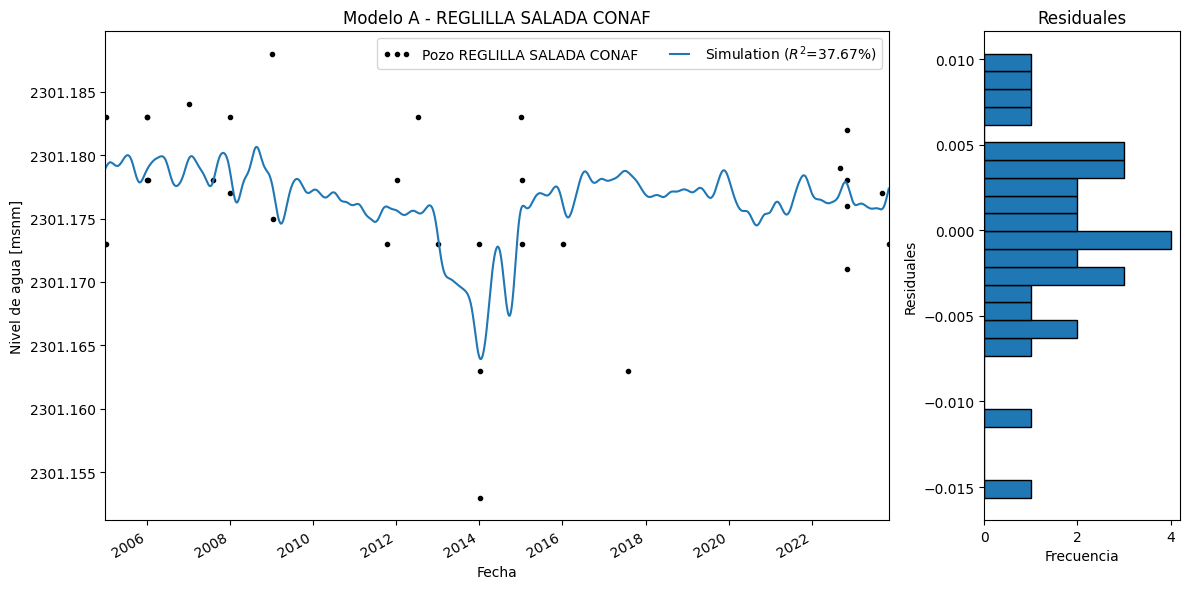

In [152]:

#### Modelo A: Solo Recarga



# --- Paso 4: Crear modelos individuales para cada pozo ---
modelos_individuales = {}
model_stats = {}

# Asegurarse de que los índices de las series de precipitación y evaporación sean de tipo datetime
precipitacion.index = pd.to_datetime(precipitacion.index, errors='coerce')
evaporacion.index = pd.to_datetime(evaporacion.index, errors='coerce')

# Eliminar NaNs de los índices de las series de precipitación y evaporación
precipitacion = precipitacion.loc[precipitacion.index.dropna()]
evaporacion = evaporacion.loc[evaporacion.index.dropna()]

# Ordenar los índices de las series de precipitación y evaporación
precipitacion = precipitacion.sort_index()
evaporacion = evaporacion.sort_index()

# Asegurarse de que las series de precipitación y evaporación tengan una frecuencia regular
precipitacion = precipitacion.asfreq('D')
evaporacion = evaporacion.asfreq('D')
# print(precipitacion)
# print(evaporacion)

# plt.plot(precipitacion.index, precipitacion.values)
# plt.plot(evaporacion.index, evaporacion.values)

list_wel = [wel_alb / 86.4, wel_sqm_mop, wel_sqm_sop, wel_tuc /86.4, wel_til / 86.4, wel_neg / 86.4, wel_mon / 86.4]
print(len(list_wel))
print(len(list_wel[0:3]))
dis = [16000,25000,28000,16000,16000,43000,63000]

list_wel2 = list_wel[0:3]

# pozos_a_modelar = [
#     "Pozo REGLILLA SALADA CONAF", "Pozo L10-10", "Pozo L10-12", 
#     "Pozo REGLILLA SALADITA CONAF", "Pozo REGLILLA INTERNA CONAF", "Pozo L10-2", "Pozo L10-2"
# ]


for pozo, datos in datos_pozos.items():
    if pozo == "REGLILLA SALADA CONAF":# or pozo == "Pozo L10-10" or pozo == "Pozo L10-12" or pozo == "REGLILLA SALADITA CONAF" or pozo == "REGLILLA INTERNA CONAF" or pozo == "Pozo L10-2" or pozo == "Pozo L10-4":
        
        # Eliminar NaNs del índice de la serie
        datos = datos.loc[datos.index.dropna()]
        
        # Eliminar índices duplicados
        datos = datos.loc[~datos.index.duplicated(keep='first')]
        
        # Ordenar el índice de la serie
        datos = datos.sort_index()
        
        # print(f"Modelando {pozo}")
        print(datos)
              
        
        # Crear un modelo Pastas para el pozo actual
        ml = ps.Model(datos, name=pozo+" Recarga")
        #ml.add_noisemodel(ps.ArNoiseModel()) # Does not help too much
        # distances = [18000,280000000]
        # distances2 = [18000,28000,25000]
        # Añadir series de estrés (precipitación y evaporación)
        #Interna = 0.001
        #all 0.1
        if pozo == "REGLILLA INTERNA CONAF":
            sm_precip = ps.StressModel(precipitacion*0.1, ps.Gamma(), settings="prec", name="precipitacion")#, up=True)
        else:
            sm_precip = ps.StressModel(precipitacion*0.1, ps.Gamma(), settings="prec", name="precipitacion")
            
        sm_evap = ps.StressModel(evaporacion, ps.Gamma(), settings="evap", name="evaporacion")#, up=False)
        
        sm_alb = ps.StressModel(wel_alb / 84.6, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_sqm = ps.StressModel(wel_sqm, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        # sm_wel = ps.WellModel([wel_alb/ 1e6, wel_sqm], "WellModel", distances)
        sm_sqm_mop = ps.StressModel(wel_sqm_mop, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_sqm_sop = ps.StressModel(wel_sqm_sop, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        
        sm_mon = ps.StressModel(wel_mon / 86.4, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_til = ps.StressModel(wel_til / 86.4, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_neg = ps.StressModel(wel_neg / 86.4, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_tuc = ps.StressModel(wel_tuc / 86.4, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        
        # sm_wel2 = ps.WellModel([list_wel[0],list_wel[1]], "WellModel", [dis[0],dis[1]])#dis[0:3])
        sm_wel2 = ps.WellModel(list_wel, "WellModel", dis)
   
        #POZOS
        # sm_rch = ps.RechargeModel(
        #     precipitacion,
        #     evaporacion,
        #     ps.Gamma(),
        #     name="rainevap",
        #     recharge=ps.rch.Peterson(),
        #     settings=("prec", "evap"),
        # )    
        # modelos = ["A","B","C","D"]
        #LAGUNAS
        # for m in modelos:
        #     if m == "A":
        #         if pozo == "Pozo REGLILLA INTERNA CONAF":
        #             f=0.0001
        #         else:
        #             f=0.1
        #         sm_precip = ps.StressModel(precipitacion*f, ps.Gamma(), settings="prec", name="precipitacion")#, up=True)
        #         sm_evap = ps.StressModel(evaporacion, ps.Gamma(), settings="evap", name="evaporacion")#, up=False)
        #         ml.add_stressmodel(sm_precip)
        #         ml.add_stressmodel(sm_evap)
        #         ml.solve() 
        #         ml.
        #     elif m == "B":
                
        # sm_rch = ps.RechargeModel(
        #     precipitacion*0.8,
        #     evaporacion,
        #     ps.Gamma(),
        #     name="rainevap",
        #     recharge=ps.rch.Linear(),
        #     settings=("prec", "evap"),
        # )     
        
        #sm_rch = ps.RechargeModel(precipitacion, evaporacion, ps.Exponential(), "Recharge")
        
        sm_rch = ps.RechargeModel(
            precipitacion*0.8,
            evaporacion,
            ps.Gamma(),
            name="rainevap",
            recharge=ps.rch.Linear(),
            settings=("prec", "evap"),
        )     
        
        #sm_rch = ps.RechargeModel(precipitacion, evaporacion, ps.Exponential(), "Recharge")
        
        if "REGLILLA" in pozo:
            ml.add_stressmodel(sm_precip)
            ml.add_stressmodel(sm_evap)
        else:
            ml.add_stressmodel(sm_rch)
        # ml2 = ml.copy(name=pozo+" Recarga + Extracciones")
        ml.solve()
        # ml.add_stressmodel(sm_precip)
        # ml.add_stressmodel(sm_evap)
        # ml.add_stressmodel(sm_rch)

        
        
        # ml.add_stressmodel(sm_wel)
        # ml.add_stressmodel(sm_alb)
        #ml.add_stressmodel(sm_sqm)
        # ml.add_stressmodel(sm_sqm_mop)
        # ml.add_stressmodel(sm_sqm_sop)
        # ml2.add_stressmodel(sm_wel2)
        # ml.add_stressmodel(sm_mon)
        # ml2.add_stressmodel(sm_til)
        # ml.add_stressmodel(sm_neg)
        # ml2.add_stressmodel(sm_tuc)
        
        # ml.add_noisemodel(ps.ArmaNoiseModel())
        
        # ml2 = ml.copy(name=pozo+" Modelo A")
        # ml.solve()
        res =  ml.residuals()
        t_stat, p_value_t = stats.ttest_1samp(res, 0)
        stat_wilc, p_value_wilc = stats.wilcoxon(res)
        stat_shap, p_value_shap = stats.shapiro(res)
        
        fig, axes = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [4, 1]})
            
        # fig, ax = plt.subplots(figsize=(12, 6))
        ml.plot(ax=axes[0])
        axes[0].set_ylabel('Nivel de agua [msnm]')
        axes[0].set_title(f'Modelo A - {pozo}')
        axes[0].ticklabel_format(axis='y', style='plain',useOffset=False)  # Remove scientific notation from y-axis
        # axes[0].get_yaxis().get_offset_text().set_visible(False)  # Remove scientific notation factor from y-axis
        # axes[0].ticklabel_format(axis='x', style='plain')  # Remove scientific notation from x-axis if needed


   
        # fig = plt.figure(figsize=(12, 6))
        axes[1].hist(res, bins=25, edgecolor='black',orientation='horizontal')
        axes[1].set_xlabel('Frecuencia')
        axes[1].set_ylabel('Residuales')
        axes[1].set_title(f'Residuales')
        # fig.savefig(os.path.join("modelo_A",f"Residuals_{pozo}.png"))
        
        plt.tight_layout()
     
        fig.savefig(os.path.join("modelo_A",f"Modelo_A_{pozo}.png"))       
        # Calibrar el modelo
        # mlwel = ml.solve()
        
        # Guardar el modelo en el diccionario
        # modelos_individuales[pozo] = ml

        # Graficar los resultados del modelo individual
        # ml.plot()
        # try:
        #     ml.plots.diagnostics()
        # except:
        #     pass
        # c = ml.get_contributions()
        # print(c)
        
        # report = ml.fit_report()
        # print(report)
        
        
        # try:
        #     ml.plots.diagnostics()
        # except:
        #     pass
            # ml2.plot()
        
        # mc = ps.CompareModels(models=[ml, ml2])
        # mc.plot(adjust_height=True)
        # ml.plots.results(figsize=(10, 6))
        # ml.stats.summary()
        
        r2 = ml.stats.rsq()
        rmse = ml.stats.rmse()
        # except Exception as e:
        #     print(f"Error al resolver el modelo {m} para {pozo}: {e}")
        #     r2, rmse = np.nan, np.nan

        # Guardar modelo y estadísticas
            # Guardar modelo y estadísticas
        modelos_individuales[f"{pozo}_A"] = ml
        model_stats[(pozo)] = {"R²": r2, "RMSE": rmse, "p-value zero": p_value_t, "t-statistic zero": t_stat, "p-value wilconox": p_value_wilc, "statistic wilconox": stat_wilc, "p-value shapiro": p_value_shap, "statistic shapiro": stat_shap}

# Convertir estadísticas a DataFrame
        df_model_stats = pd.DataFrame.from_dict(model_stats, orient='index')
        df_model_stats.to_csv("Modelo_A.csv")
        
        # ml2.stats.summary()

        # ml.plots.stacked_results(
        #         figsize=(10, 8),
        #         stacklegend=True,
        #         stackcolors={"Extraction_2": "C1",},
            
        # )
        # plt.title(f"Modelo para el {pozo}")
        # plt.show()
        


7
3
Fit report REGLILLA SALADITA CON Fit Statistics
nfev    210                    EVP        50.23
nobs    36                     R2          0.50
noise   False                  RMSE        0.01
tmin    2005-01-01 00:00:00    AICc     -301.29
tmax    2023-11-08 00:00:00    BIC      -294.26
freq    D                      Obj         0.00
warmup  3650 days 00:00:00     ___             
solver  LeastSquares           Interp.       No

Parameters (10 optimized)
                     optimal      initial  vary
precipitacion_A     0.000010    15.865711  True
precipitacion_n     2.061527     1.000000  True
precipitacion_a    73.841918    10.000000  True
evaporacion_A       0.001482     0.349518  True
evaporacion_n      31.848657     1.000000  True
evaporacion_a       0.747621    10.000000  True
well_A             -0.003188    -0.022704  True
well_a           1918.365924   100.000000  True
well_b              0.303403     1.000000  True
constant_d       2300.958505  2300.943111  True

Warnings

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.

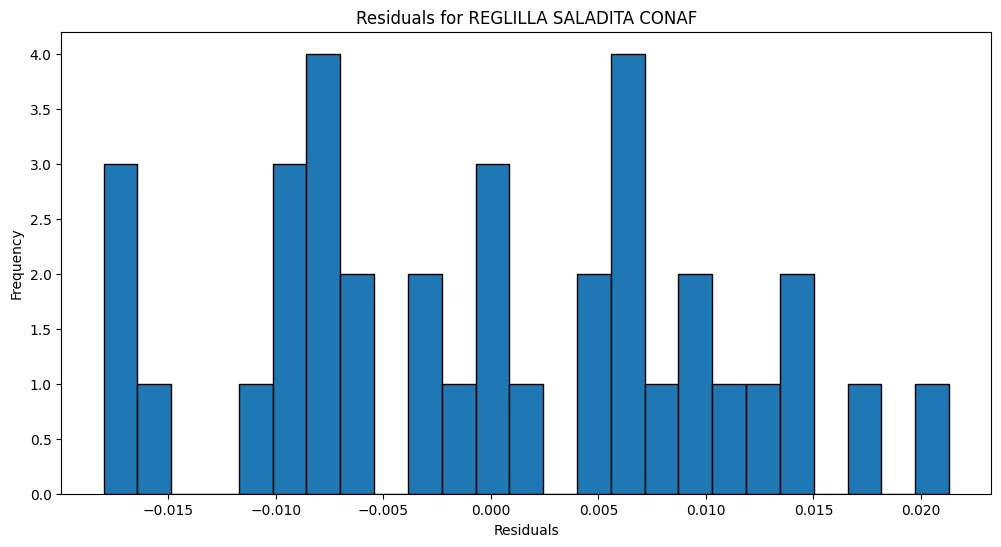

<Figure size 1200x600 with 0 Axes>

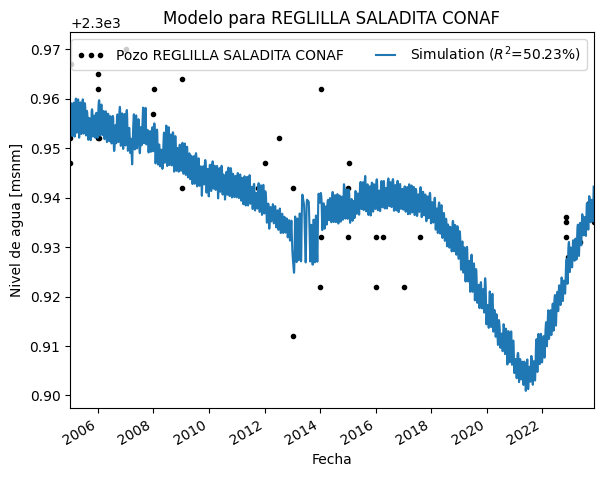

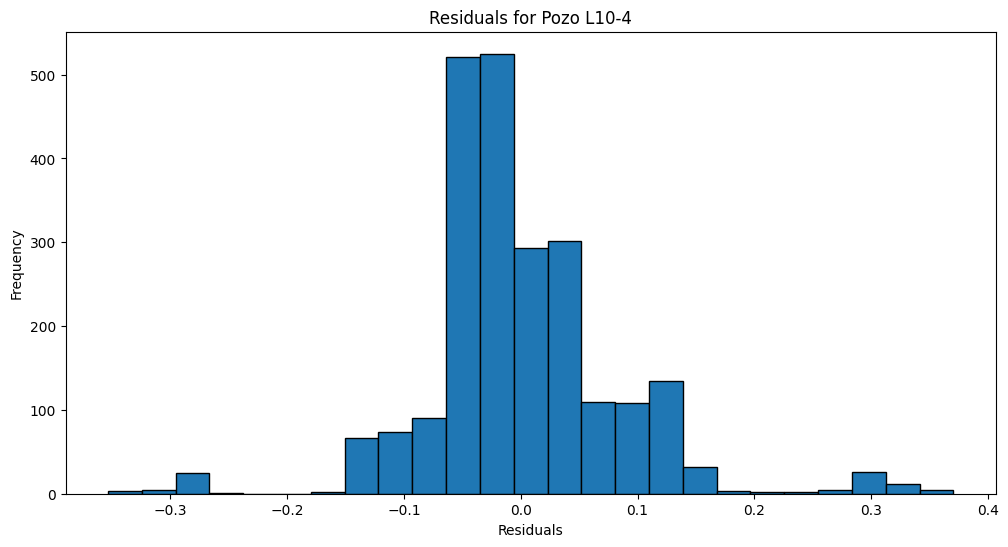

<Figure size 1200x600 with 0 Axes>

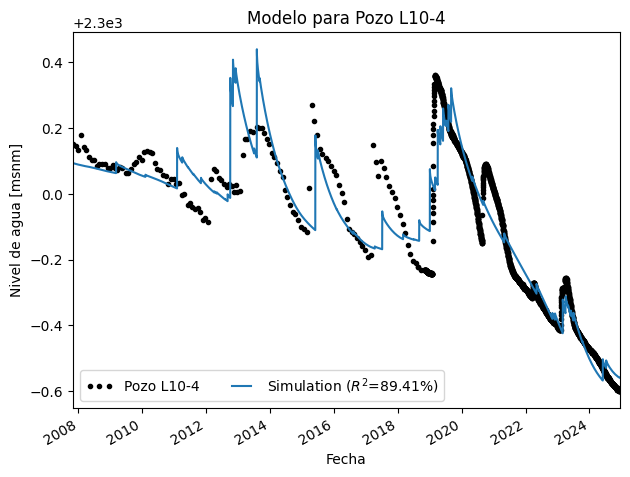

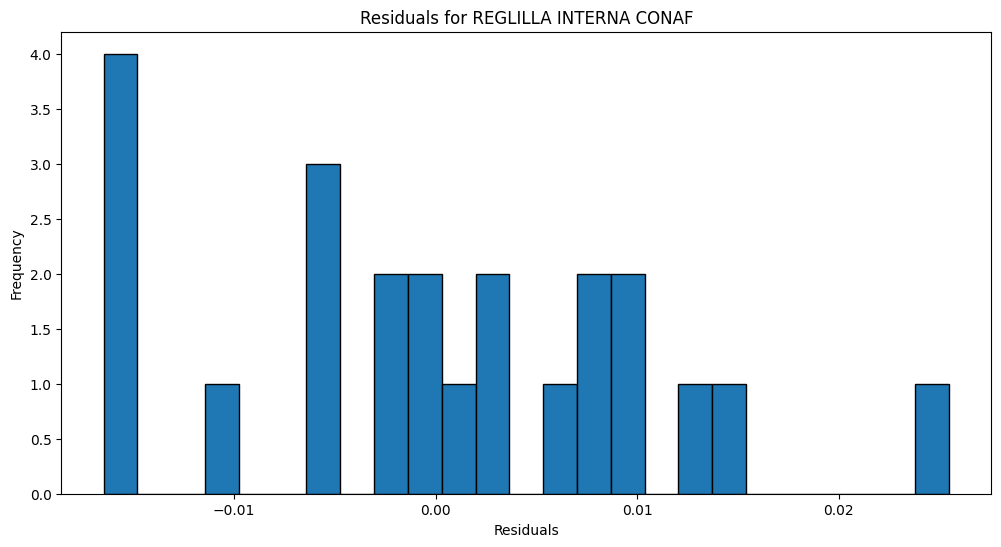

<Figure size 1200x600 with 0 Axes>

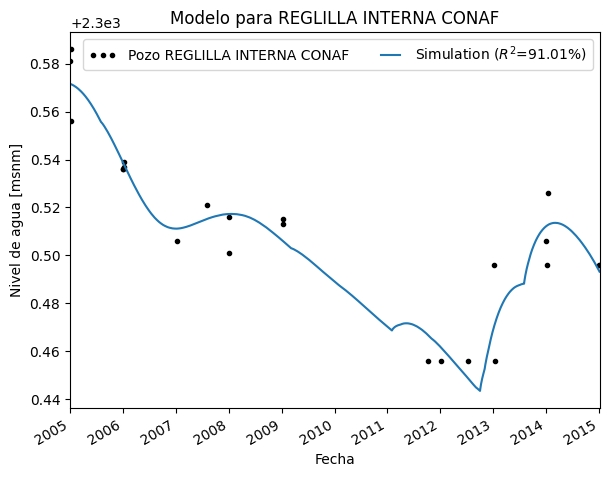

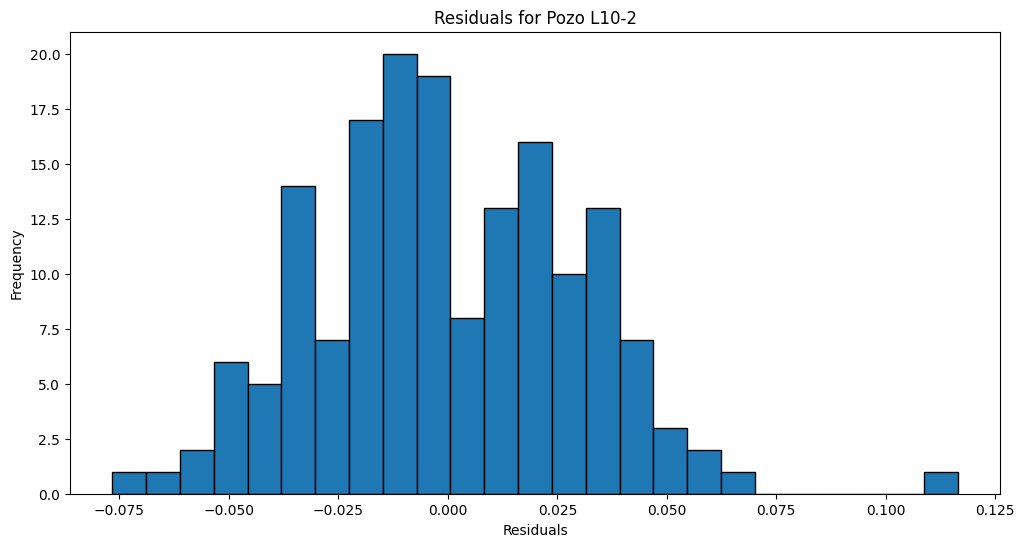

<Figure size 1200x600 with 0 Axes>

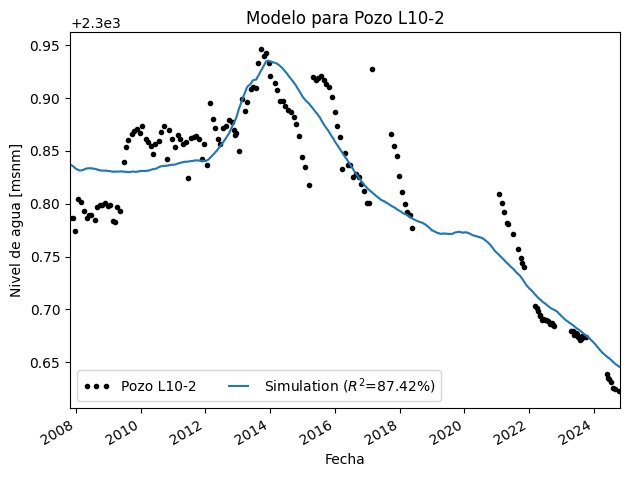

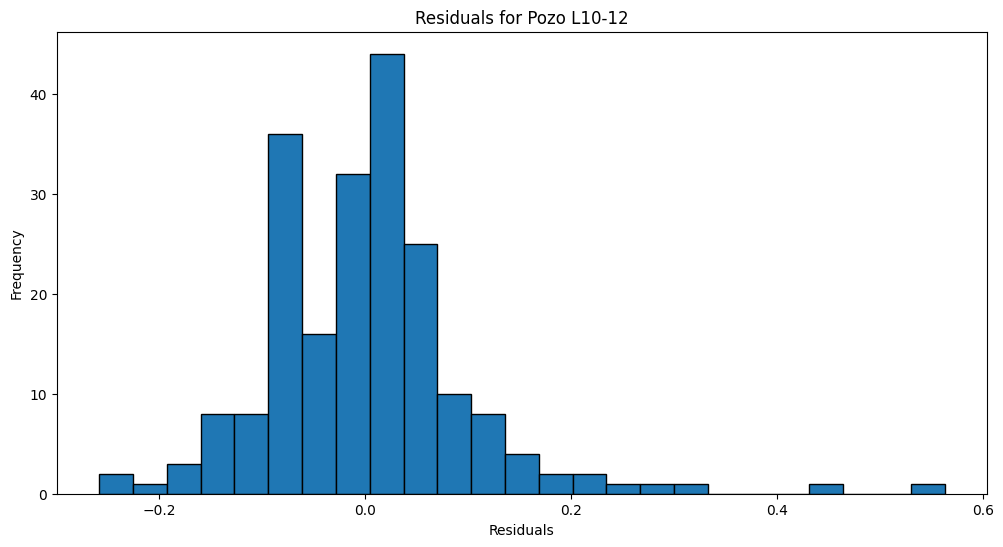

<Figure size 1200x600 with 0 Axes>

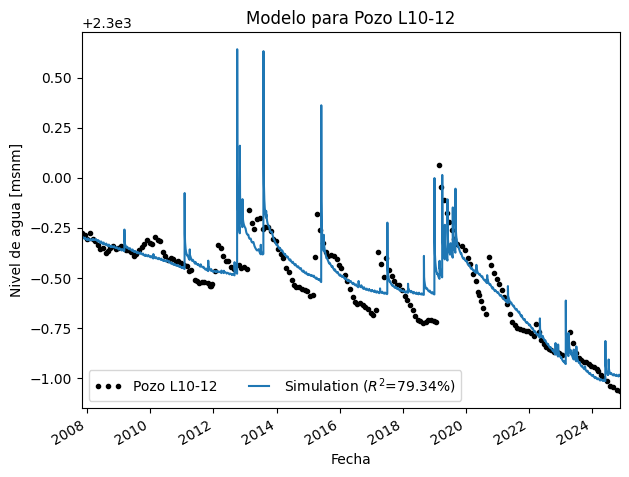

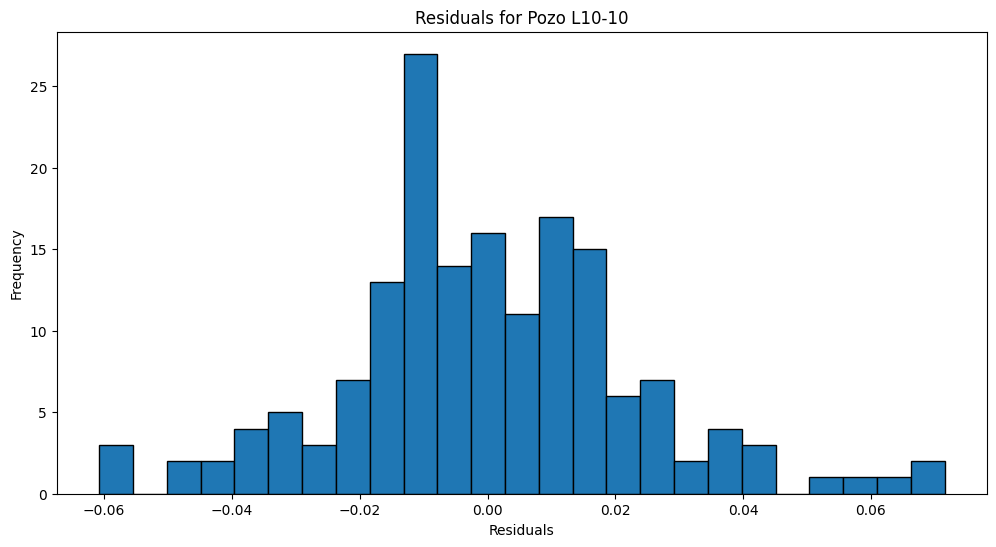

<Figure size 1200x600 with 0 Axes>

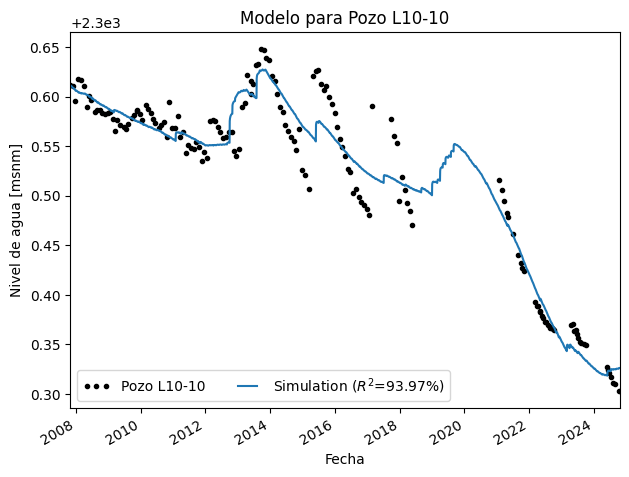

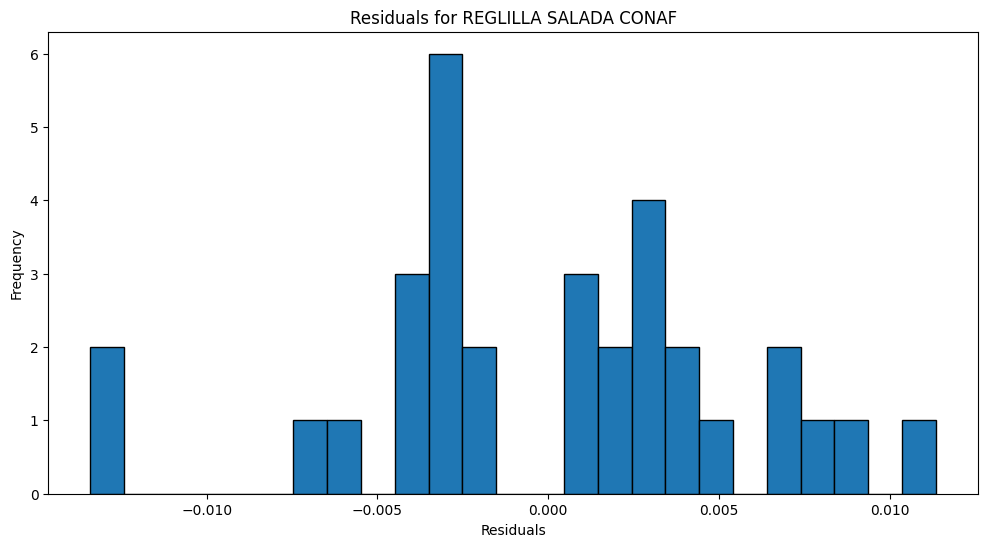

<Figure size 1200x600 with 0 Axes>

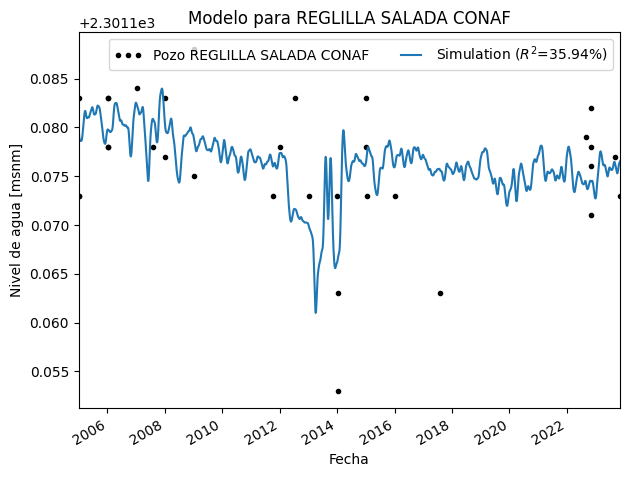

In [117]:

#### Modelo B: Recarga + Albemarle



# --- Paso 4: Crear modelos individuales para cada pozo ---
modelos_individuales = {}
model_stats = {}

# Asegurarse de que los índices de las series de precipitación y evaporación sean de tipo datetime
precipitacion.index = pd.to_datetime(precipitacion.index, errors='coerce')
evaporacion.index = pd.to_datetime(evaporacion.index, errors='coerce')

# Eliminar NaNs de los índices de las series de precipitación y evaporación
precipitacion = precipitacion.loc[precipitacion.index.dropna()]
evaporacion = evaporacion.loc[evaporacion.index.dropna()]

# Ordenar los índices de las series de precipitación y evaporación
precipitacion = precipitacion.sort_index()
evaporacion = evaporacion.sort_index()

# Asegurarse de que las series de precipitación y evaporación tengan una frecuencia regular
precipitacion = precipitacion.asfreq('D')
evaporacion = evaporacion.asfreq('D')
# print(precipitacion)
# print(evaporacion)

# plt.plot(precipitacion.index, precipitacion.values)
# plt.plot(evaporacion.index, evaporacion.values)

list_wel = [wel_alb / 86.4, wel_sqm_mop, wel_sqm_sop, wel_tuc /86.4, wel_til / 86.4, wel_neg / 86.4, wel_mon / 86.4]
print(len(list_wel))
print(len(list_wel[0:3]))
dis = [16000,25000,28000,16000,16000,43000,63000]

list_wel2 = list_wel[0:3]

pozos_a_modelar = [
    "Pozo REGLILLA SALADA CONAF", "Pozo L10-10", "Pozo L10-12", 
    "Pozo REGLILLA SALADITA CONAF", "Pozo REGLILLA INTERNA CONAF", "Pozo L10-2", "Pozo L10-2"
]


for pozo, datos in datos_pozos.items():
    if pozo == "REGLILLA SALADA CONAF" or pozo == "Pozo L10-10" or pozo == "Pozo L10-12" or pozo == "REGLILLA SALADITA CONAF" or pozo == "REGLILLA INTERNA CONAF" or pozo == "Pozo L10-2" or pozo == "Pozo L10-4":
        
        # Eliminar NaNs del índice de la serie
        datos = datos.loc[datos.index.dropna()]
        
        # Eliminar índices duplicados
        datos = datos.loc[~datos.index.duplicated(keep='first')]
        
        # Ordenar el índice de la serie
        datos = datos.sort_index()
        
        # Crear un modelo Pastas para el pozo actual
        ml = ps.Model(datos, name=pozo+" Recarga")
        #ml.add_noisemodel(ps.ArNoiseModel()) # Does not help too much
        # distances = [18000,280000000]
        # distances2 = [18000,28000,25000]
        # Añadir series de estrés (precipitación y evaporación)
        #Interna = 0.001
        #all 0.1
        if pozo == "REGLILLA INTERNA CONAF":
            sm_precip = ps.StressModel(precipitacion*0.1, ps.Gamma(), settings="prec", name="precipitacion")#, up=True)
        else:
            sm_precip = ps.StressModel(precipitacion*0.1, ps.Gamma(), settings="prec", name="precipitacion")
            
        sm_evap = ps.StressModel(evaporacion, ps.Gamma(), settings="evap", name="evaporacion")#, up=False)
        
        sm_alb = ps.StressModel(wel_alb / 84.6, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_sqm = ps.StressModel(wel_sqm, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        # sm_wel = ps.WellModel([wel_alb/ 1e6, wel_sqm], "WellModel", distances)
        sm_sqm_mop = ps.StressModel(wel_sqm_mop, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_sqm_sop = ps.StressModel(wel_sqm_sop, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        
        sm_mon = ps.StressModel(wel_mon / 86.4, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_til = ps.StressModel(wel_til / 86.4, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_neg = ps.StressModel(wel_neg / 86.4, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_tuc = ps.StressModel(wel_tuc / 86.4, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        
        # sm_wel2 = ps.WellModel([list_wel[0],list_wel[1]], "WellModel", [dis[0],dis[1]])#dis[0:3])
        sm_wel2 = ps.WellModel(list_wel, "WellModel", dis)
   
        #POZOS
        # sm_rch = ps.RechargeModel(
        #     precipitacion,
        #     evaporacion,
        #     ps.Gamma(),
        #     name="rainevap",
        #     recharge=ps.rch.Peterson(),
        #     settings=("prec", "evap"),
        # )    
        # modelos = ["A","B","C","D"]
        #LAGUNAS
        # for m in modelos:
        #     if m == "A":
        #         if pozo == "Pozo REGLILLA INTERNA CONAF":
        #             f=0.0001
        #         else:
        #             f=0.1
        #         sm_precip = ps.StressModel(precipitacion*f, ps.Gamma(), settings="prec", name="precipitacion")#, up=True)
        #         sm_evap = ps.StressModel(evaporacion, ps.Gamma(), settings="evap", name="evaporacion")#, up=False)
        #         ml.add_stressmodel(sm_precip)
        #         ml.add_stressmodel(sm_evap)
        #         ml.solve() 
        #         ml.
        #     elif m == "B":
                
        # sm_rch = ps.RechargeModel(
        #     precipitacion*0.8,
        #     evaporacion,
        #     ps.Gamma(),
        #     name="rainevap",
        #     recharge=ps.rch.Linear(),
        #     settings=("prec", "evap"),
        # )     
        
        #sm_rch = ps.RechargeModel(precipitacion, evaporacion, ps.Exponential(), "Recharge")
        
        sm_rch = ps.RechargeModel(
            precipitacion*0.8,
            evaporacion,
            ps.Gamma(),
            name="rainevap",
            recharge=ps.rch.Linear(),
            settings=("prec", "evap"),
        )     
        
        #sm_rch = ps.RechargeModel(precipitacion, evaporacion, ps.Exponential(), "Recharge")
        
        if "REGLILLA" in pozo:
            ml.add_stressmodel(sm_precip)
            ml.add_stressmodel(sm_evap)
        else:
            ml.add_stressmodel(sm_rch)
        ml.add_stressmodel(sm_alb)
        # ml2 = ml.copy(name=pozo+" Recarga + Extracciones")
        # ml.add_stressmodel(sm_sqm_mop)
        # ml.add_stressmodel(sm_sqm_sop)
        ml.solve()
        # ml.add_stressmodel(sm_precip)
        # ml.add_stressmodel(sm_evap)
        # ml.add_stressmodel(sm_rch)

        
        
        # ml.add_stressmodel(sm_wel)
        # ml.add_stressmodel(sm_alb)
        #ml.add_stressmodel(sm_sqm)
        # ml.add_stressmodel(sm_sqm_mop)
        # ml.add_stressmodel(sm_sqm_sop)
        # ml2.add_stressmodel(sm_wel2)
        # ml.add_stressmodel(sm_mon)
        # ml2.add_stressmodel(sm_til)
        # ml.add_stressmodel(sm_neg)
        # ml2.add_stressmodel(sm_tuc)
        
        # ml.add_noisemodel(ps.ArmaNoiseModel())
        
        # ml2 = ml.copy(name=pozo+" Modelo A")
        # ml.solve()
        res =  ml.residuals()
        fig = plt.figure(figsize=(12, 6))
        plt.hist(res, bins=25, edgecolor='black')
        plt.xlabel('Residuals')
        plt.ylabel('Frequency')
        plt.title(f'Residuals for {pozo}')
        
        fig = plt.figure(figsize=(12, 6))
        ml.plot()
        plt.ylabel('Nivel de agua [msnm]')
        plt.title(f'Modelo para {pozo}')

   

            
        # Calibrar el modelo
        # mlwel = ml.solve()
        
        # Guardar el modelo en el diccionario
        # modelos_individuales[pozo] = ml

        # Graficar los resultados del modelo individual
        # ml.plot()
        # try:
        #     ml.plots.diagnostics()
        # except:
        #     pass
        # c = ml.get_contributions()
        # print(c)
        
        # report = ml.fit_report()
        # print(report)
        
        
        # try:
        #     ml.plots.diagnostics()
        # except:
        #     pass
            # ml2.plot()
        
        # mc = ps.CompareModels(models=[ml, ml2])
        # mc.plot(adjust_height=True)
        # ml.plots.results(figsize=(10, 6))
        # ml.stats.summary()
        
        r2 = ml.stats.rsq()
        rmse = ml.stats.rmse()
        # except Exception as e:
        #     print(f"Error al resolver el modelo {m} para {pozo}: {e}")
        #     r2, rmse = np.nan, np.nan

        # Guardar modelo y estadísticas
            # Guardar modelo y estadísticas
        modelos_individuales[f"{pozo}_B"] = ml
        model_stats[(pozo)] = {"R²": r2, "RMSE": rmse}

# Convertir estadísticas a DataFrame
        df_model_stats = pd.DataFrame.from_dict(model_stats, orient='index')
        df_model_stats.to_csv("Modelo_B.csv")
        
        # ml2.stats.summary()

        # ml.plots.stacked_results(
        #         figsize=(10, 8),
        #         stacklegend=True,
        #         stackcolors={"Extraction_2": "C1",},
            
        # )
        # plt.title(f"Modelo para el {pozo}")
        # plt.show()
        


7
3
Fit report REGLILLA SALADITA CON Fit Statistics
nfev    50                     EVP        25.62
nobs    36                     R2          0.26
noise   False                  RMSE        0.01
tmin    2005-01-01 00:00:00    AICc     -286.82
tmax    2023-11-08 00:00:00    BIC      -279.79
freq    D                      Obj         0.00
warmup  3650 days 00:00:00     ___             
solver  LeastSquares           Interp.       No

Parameters (10 optimized)
                     optimal      initial  vary
precipitacion_A    81.120613    15.865711  True
precipitacion_n     0.010000     1.000000  True
precipitacion_a     4.638584    10.000000  True
evaporacion_A       0.004762     0.349518  True
evaporacion_n       2.115770     1.000000  True
evaporacion_a      30.111253    10.000000  True
well_A             -0.000012    -0.004362  True
well_a             60.366636   100.000000  True
well_b              0.212079     1.000000  True
constant_d       2300.898954  2300.943111  True

Warnings

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.

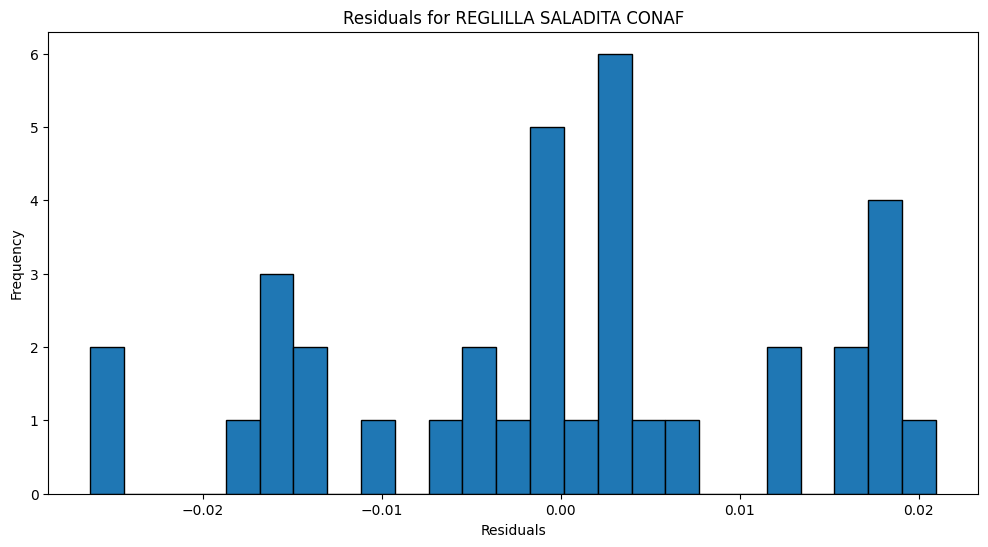

<Figure size 1200x600 with 0 Axes>

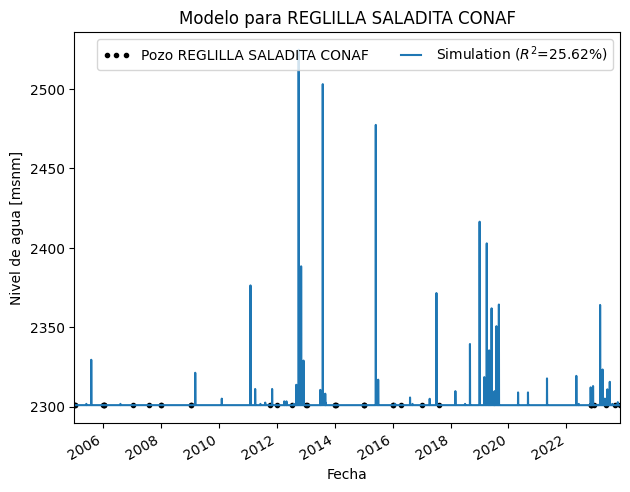

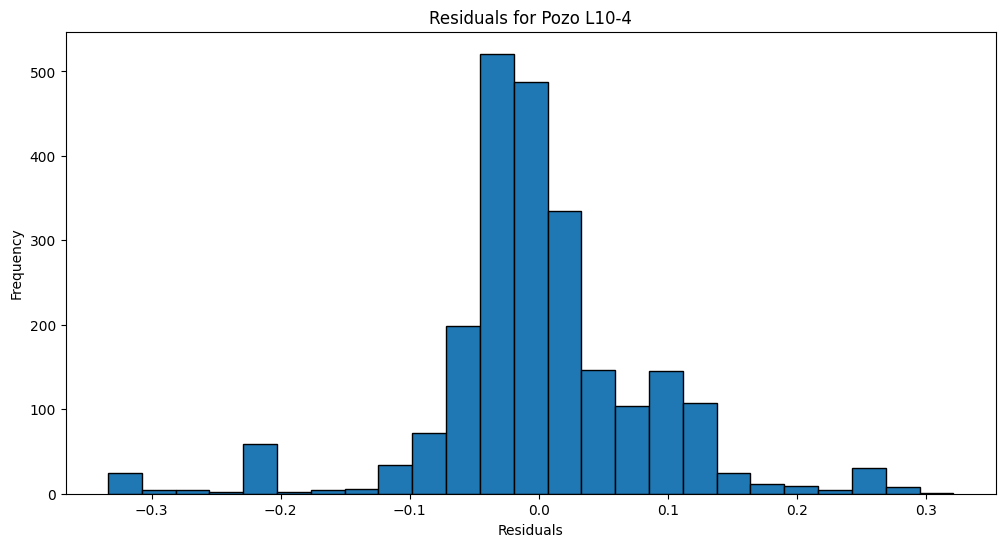

<Figure size 1200x600 with 0 Axes>

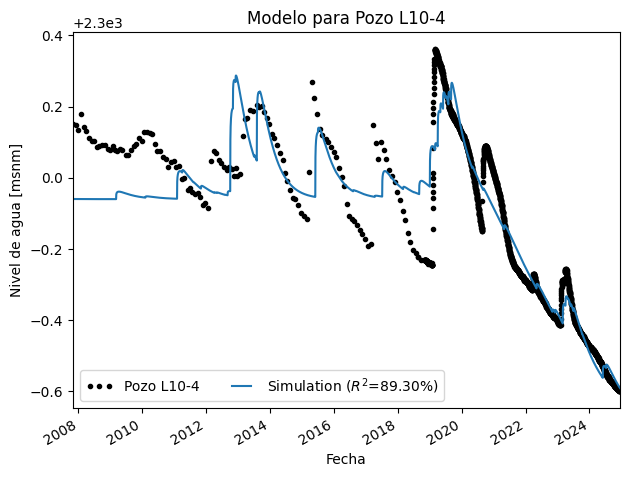

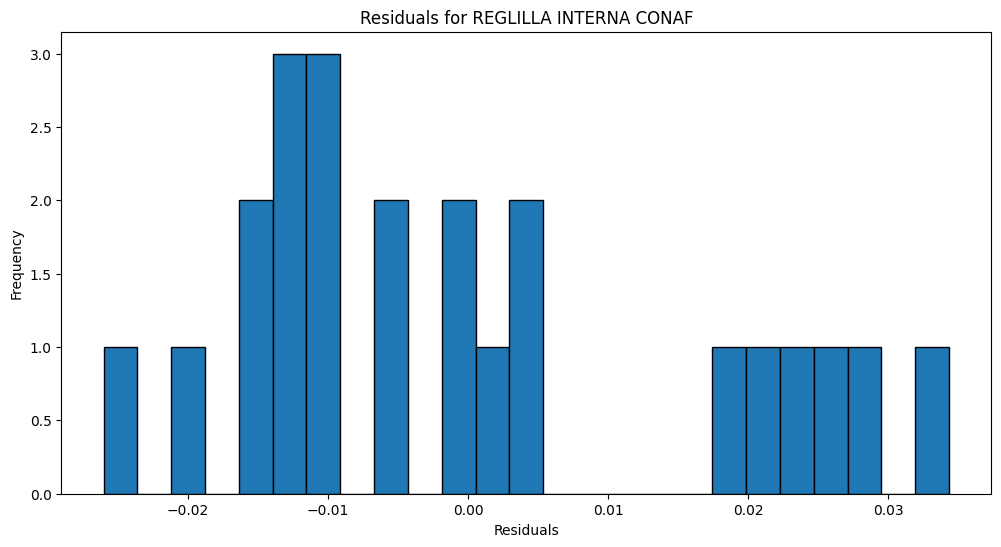

<Figure size 1200x600 with 0 Axes>

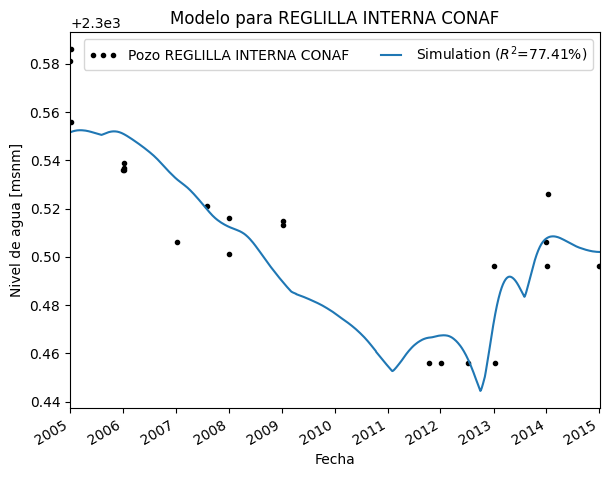

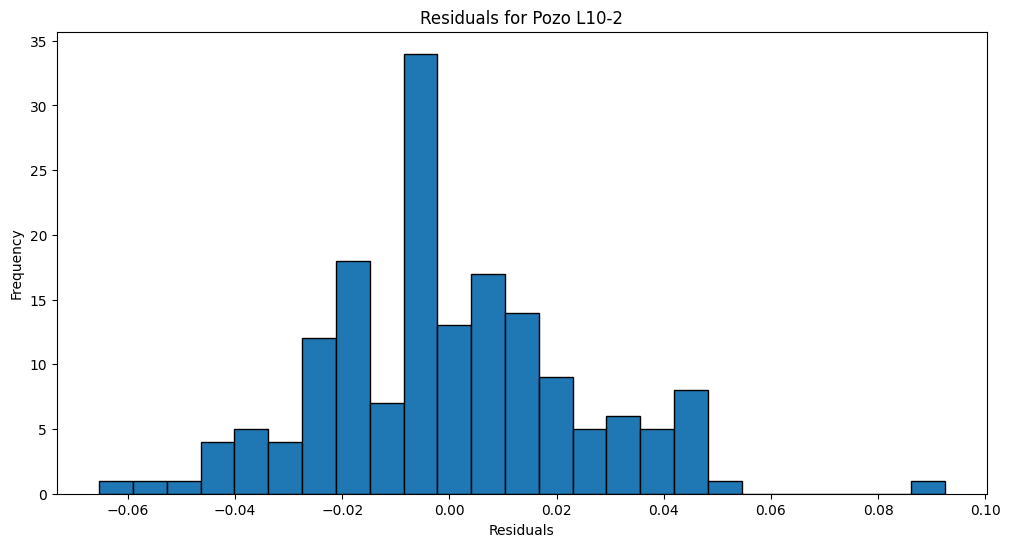

<Figure size 1200x600 with 0 Axes>

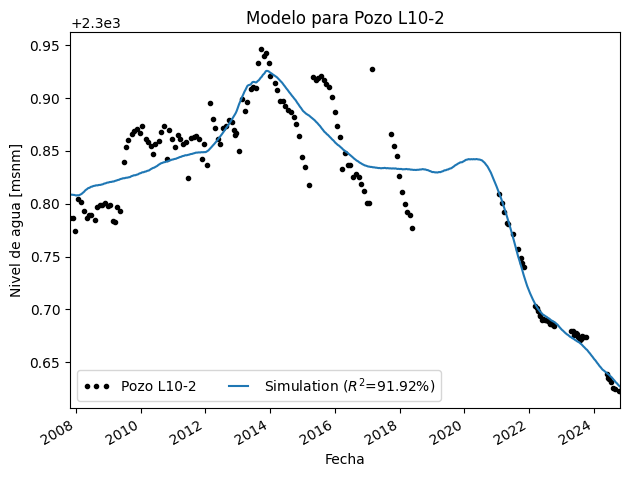

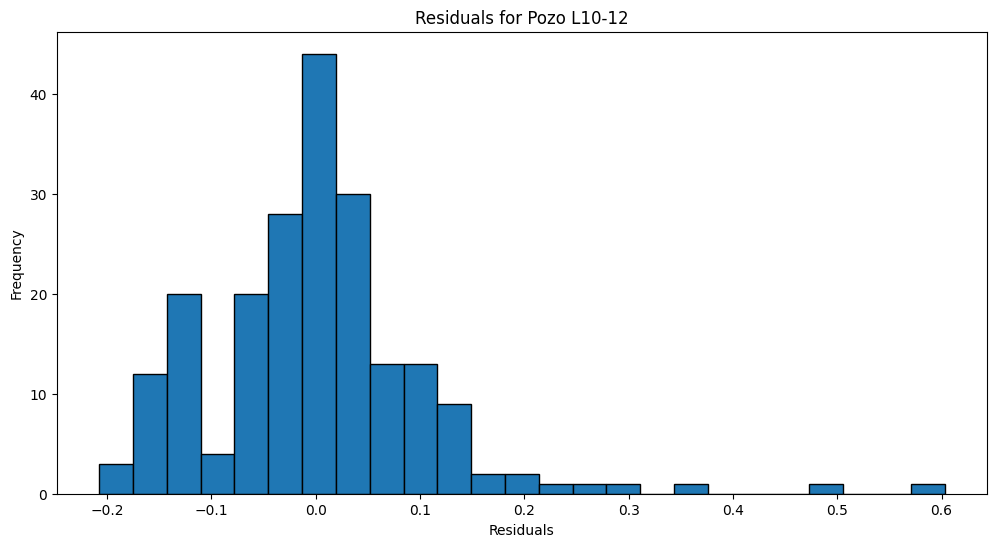

<Figure size 1200x600 with 0 Axes>

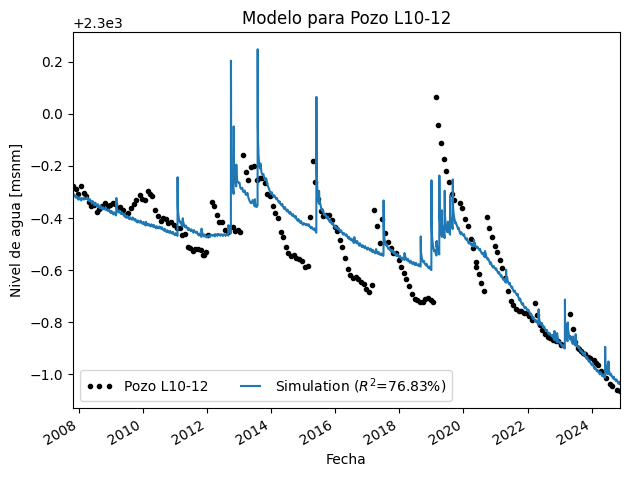

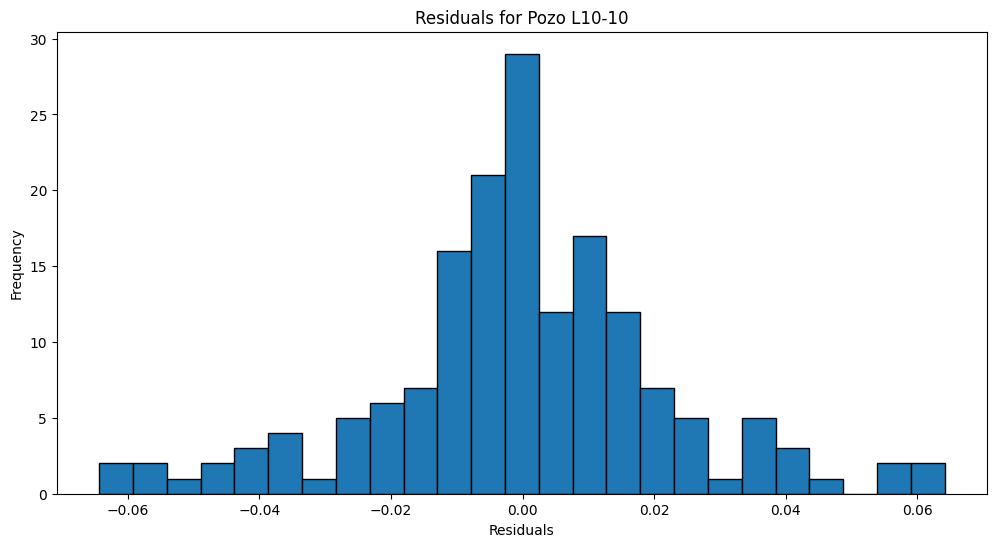

<Figure size 1200x600 with 0 Axes>

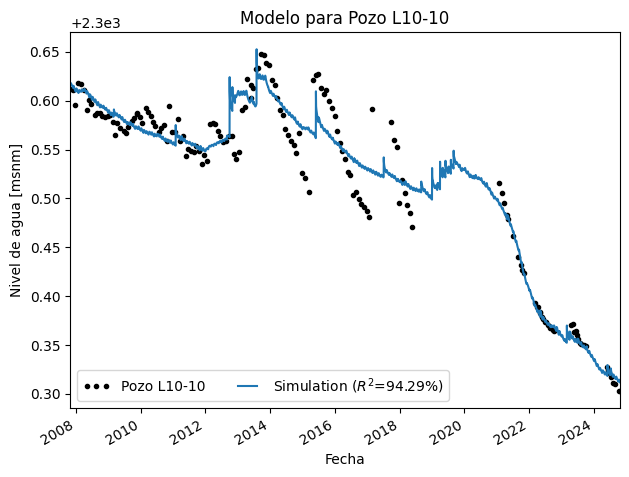

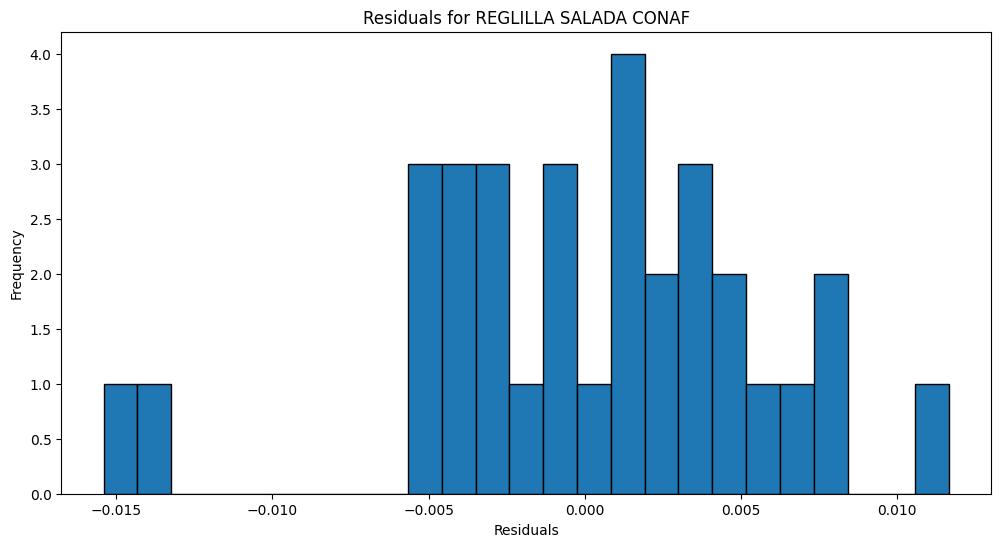

<Figure size 1200x600 with 0 Axes>

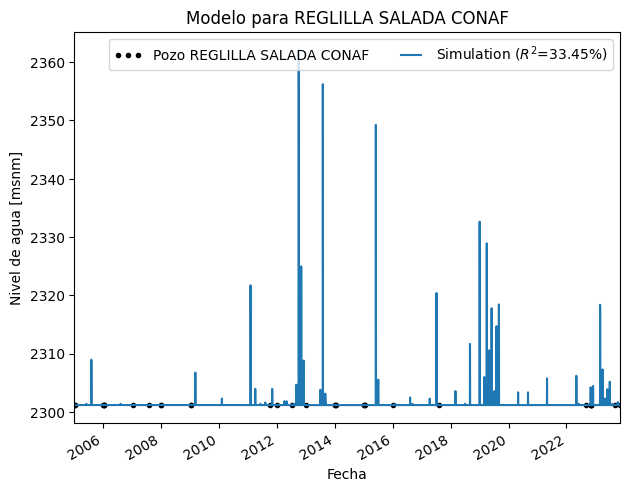

In [123]:

#### Modelo C: Recarga + SQM



# --- Paso 4: Crear modelos individuales para cada pozo ---
modelos_individuales = {}
model_stats = {}

# Asegurarse de que los índices de las series de precipitación y evaporación sean de tipo datetime
precipitacion.index = pd.to_datetime(precipitacion.index, errors='coerce')
evaporacion.index = pd.to_datetime(evaporacion.index, errors='coerce')

# Eliminar NaNs de los índices de las series de precipitación y evaporación
precipitacion = precipitacion.loc[precipitacion.index.dropna()]
evaporacion = evaporacion.loc[evaporacion.index.dropna()]

# Ordenar los índices de las series de precipitación y evaporación
precipitacion = precipitacion.sort_index()
evaporacion = evaporacion.sort_index()

# Asegurarse de que las series de precipitación y evaporación tengan una frecuencia regular
precipitacion = precipitacion.asfreq('D')
evaporacion = evaporacion.asfreq('D')
# print(precipitacion)
# print(evaporacion)

# plt.plot(precipitacion.index, precipitacion.values)
# plt.plot(evaporacion.index, evaporacion.values)

list_wel = [wel_alb / 86.4, wel_sqm_mop, wel_sqm_sop, wel_tuc /86.4, wel_til / 86.4, wel_neg / 86.4, wel_mon / 86.4]
print(len(list_wel))
print(len(list_wel[0:3]))
dis = [16000,25000,28000,16000,16000,43000,63000]

list_wel2 = list_wel[0:3]

pozos_a_modelar = [
    "Pozo REGLILLA SALADA CONAF", "Pozo L10-10", "Pozo L10-12", 
    "Pozo REGLILLA SALADITA CONAF", "Pozo REGLILLA INTERNA CONAF", "Pozo L10-2", "Pozo L10-2"
]


for pozo, datos in datos_pozos.items():
    if pozo == "REGLILLA SALADA CONAF" or pozo == "Pozo L10-10" or pozo == "Pozo L10-12" or pozo == "REGLILLA SALADITA CONAF" or pozo == "REGLILLA INTERNA CONAF" or pozo == "Pozo L10-2" or pozo == "Pozo L10-4":
        
        # Eliminar NaNs del índice de la serie
        datos = datos.loc[datos.index.dropna()]
        
        # Eliminar índices duplicados
        datos = datos.loc[~datos.index.duplicated(keep='first')]
        
        # Ordenar el índice de la serie
        datos = datos.sort_index()
        
        # Crear un modelo Pastas para el pozo actual
        ml = ps.Model(datos, name=pozo+" Recarga")
        #ml.add_noisemodel(ps.ArNoiseModel()) # Does not help too much
        # distances = [18000,280000000]
        # distances2 = [18000,28000,25000]
        # Añadir series de estrés (precipitación y evaporación)
        #Interna = 0.001
        #all 0.1
        if pozo == "REGLILLA INTERNA CONAF":
            sm_precip = ps.StressModel(precipitacion*0.1, ps.Gamma(), settings="prec", name="precipitacion")#, up=True)
        else:
            sm_precip = ps.StressModel(precipitacion*0.1, ps.Gamma(), settings="prec", name="precipitacion")
            
        sm_evap = ps.StressModel(evaporacion, ps.Gamma(), settings="evap", name="evaporacion")#, up=False)
        
        sm_alb = ps.StressModel(wel_alb / 84.6, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_sqm = ps.StressModel(wel_sqm, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        # sm_wel = ps.WellModel([wel_alb/ 1e6, wel_sqm], "WellModel", distances)
        sm_sqm_mop = ps.StressModel(wel_sqm_mop, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_sqm_sop = ps.StressModel(wel_sqm_sop, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        
        sm_mon = ps.StressModel(wel_mon / 86.4, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_til = ps.StressModel(wel_til / 86.4, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_neg = ps.StressModel(wel_neg / 86.4, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_tuc = ps.StressModel(wel_tuc / 86.4, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        
        # sm_wel2 = ps.WellModel([list_wel[0],list_wel[1]], "WellModel", [dis[0],dis[1]])#dis[0:3])
        sm_wel2 = ps.WellModel(list_wel, "WellModel", dis)
   
        #POZOS
        # sm_rch = ps.RechargeModel(
        #     precipitacion,
        #     evaporacion,
        #     ps.Gamma(),
        #     name="rainevap",
        #     recharge=ps.rch.Peterson(),
        #     settings=("prec", "evap"),
        # )    
        # modelos = ["A","B","C","D"]
        #LAGUNAS
        # for m in modelos:
        #     if m == "A":
        #         if pozo == "Pozo REGLILLA INTERNA CONAF":
        #             f=0.0001
        #         else:
        #             f=0.1
        #         sm_precip = ps.StressModel(precipitacion*f, ps.Gamma(), settings="prec", name="precipitacion")#, up=True)
        #         sm_evap = ps.StressModel(evaporacion, ps.Gamma(), settings="evap", name="evaporacion")#, up=False)
        #         ml.add_stressmodel(sm_precip)
        #         ml.add_stressmodel(sm_evap)
        #         ml.solve() 
        #         ml.
        #     elif m == "B":
                
        # sm_rch = ps.RechargeModel(
        #     precipitacion*0.8,
        #     evaporacion,
        #     ps.Gamma(),
        #     name="rainevap",
        #     recharge=ps.rch.Linear(),
        #     settings=("prec", "evap"),
        # )     
        
        #sm_rch = ps.RechargeModel(precipitacion, evaporacion, ps.Exponential(), "Recharge")
        
        sm_rch = ps.RechargeModel(
            precipitacion*0.8,
            evaporacion,
            ps.Gamma(),
            name="rainevap",
            recharge=ps.rch.Linear(),
            settings=("prec", "evap"),
        )     
        
        #sm_rch = ps.RechargeModel(precipitacion, evaporacion, ps.Exponential(), "Recharge")
        
        if "REGLILLA" in pozo:
            ml.add_stressmodel(sm_precip)
            ml.add_stressmodel(sm_evap)
        else:
            ml.add_stressmodel(sm_rch)
        # ml.add_stressmodel(sm_alb)
        # ml2 = ml.copy(name=pozo+" Recarga + Extracciones")
        # ml.add_stressmodel(sm_sqm_mop)
        # ml.add_stressmodel(sm_sqm_sop)
        ml.add_stressmodel(sm_sqm)
        ml.solve()
        # ml.add_stressmodel(sm_precip)
        # ml.add_stressmodel(sm_evap)
        # ml.add_stressmodel(sm_rch)

        
        
        # ml.add_stressmodel(sm_wel)
        # ml.add_stressmodel(sm_alb)
        #ml.add_stressmodel(sm_sqm)
        # ml.add_stressmodel(sm_sqm_mop)
        # ml.add_stressmodel(sm_sqm_sop)
        # ml2.add_stressmodel(sm_wel2)
        # ml.add_stressmodel(sm_mon)
        # ml2.add_stressmodel(sm_til)
        # ml.add_stressmodel(sm_neg)
        # ml2.add_stressmodel(sm_tuc)
        
        # ml.add_noisemodel(ps.ArmaNoiseModel())
        
        # ml2 = ml.copy(name=pozo+" Modelo A")
        # ml.solve()
        res =  ml.residuals()
        fig = plt.figure(figsize=(12, 6))
        plt.hist(res, bins=25, edgecolor='black')
        plt.xlabel('Residuals')
        plt.ylabel('Frequency')
        plt.title(f'Residuals for {pozo}')
        
        fig = plt.figure(figsize=(12, 6))
        ml.plot()
        plt.ylabel('Nivel de agua [msnm]')
        plt.title(f'Modelo para {pozo}')

   

            
        # Calibrar el modelo
        # mlwel = ml.solve()
        
        # Guardar el modelo en el diccionario
        # modelos_individuales[pozo] = ml

        # Graficar los resultados del modelo individual
        # ml.plot()
        # try:
        #     ml.plots.diagnostics()
        # except:
        #     pass
        # c = ml.get_contributions()
        # print(c)
        
        # report = ml.fit_report()
        # print(report)
        
        
        # try:
        #     ml.plots.diagnostics()
        # except:
        #     pass
            # ml2.plot()
        
        # mc = ps.CompareModels(models=[ml, ml2])
        # mc.plot(adjust_height=True)
        # ml.plots.results(figsize=(10, 6))
        # ml.stats.summary()
        
        r2 = ml.stats.rsq()
        rmse = ml.stats.rmse()
        # except Exception as e:
        #     print(f"Error al resolver el modelo {m} para {pozo}: {e}")
        #     r2, rmse = np.nan, np.nan

        # Guardar modelo y estadísticas
            # Guardar modelo y estadísticas
        modelos_individuales[f"{pozo}_C"] = ml
        model_stats[(pozo)] = {"R²": r2, "RMSE": rmse}

# Convertir estadísticas a DataFrame
        df_model_stats = pd.DataFrame.from_dict(model_stats, orient='index')
        df_model_stats.to_csv("Modelo_C.csv")
        
        # ml2.stats.summary()

        # ml.plots.stacked_results(
        #         figsize=(10, 8),
        #         stacklegend=True,
        #         stackcolors={"Extraction_2": "C1",},
            
        # )
        # plt.title(f"Modelo para el {pozo}")
        # plt.show()
        


7
3
Fit report REGLILLA SALADITA CON Fit Statistics
nfev    92                     EVP        62.04
nobs    36                     R2          0.62
noise   False                  RMSE        0.01
tmin    2005-01-01 00:00:00    AICc     -311.04
tmax    2023-11-08 00:00:00    BIC      -304.00
freq    D                      Obj         0.00
warmup  3650 days 00:00:00     ___             
solver  LeastSquares           Interp.       No

Parameters (10 optimized)
                     optimal      initial  vary
precipitacion_A     0.000010    15.865711  True
precipitacion_n    16.929032     1.000000  True
precipitacion_a   935.847611    10.000000  True
evaporacion_A       0.002026     0.349518  True
evaporacion_n       5.885080     1.000000  True
evaporacion_a       2.643300    10.000000  True
well_A             -0.027112    -0.761634  True
well_a           4722.696208   100.000000  True
well_b              0.087111     1.000000  True
constant_d       2300.960481  2300.943111  True

Warnings

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.

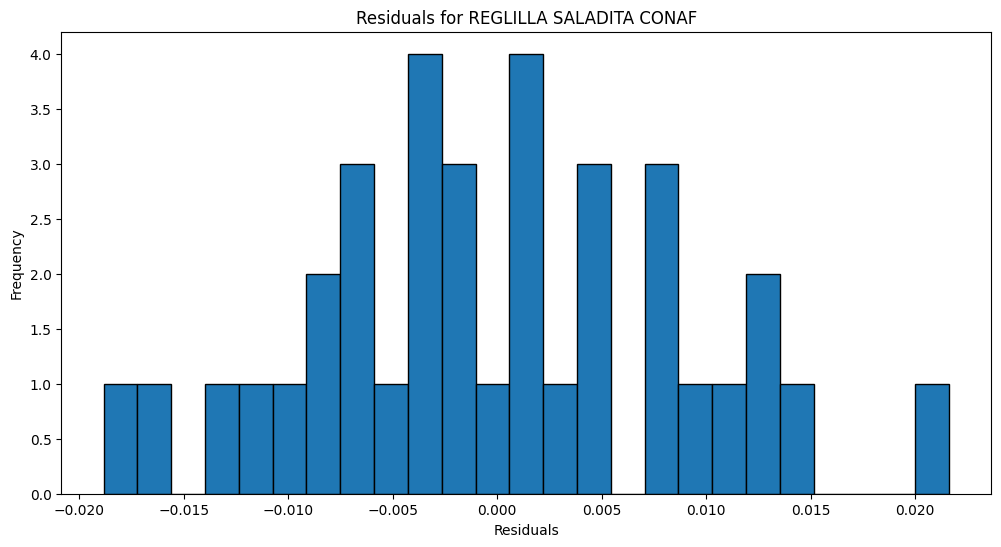

<Figure size 1200x600 with 0 Axes>

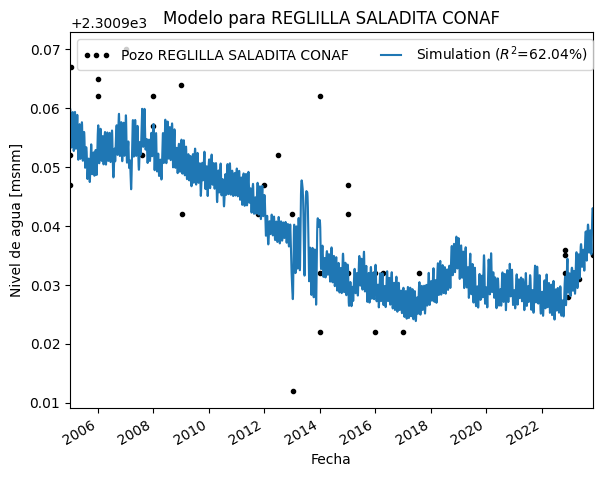

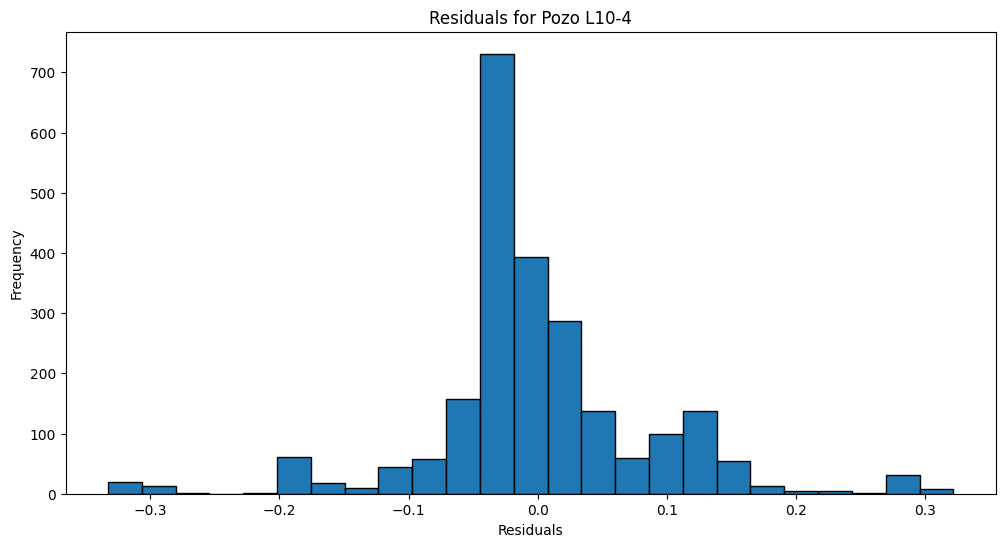

<Figure size 1200x600 with 0 Axes>

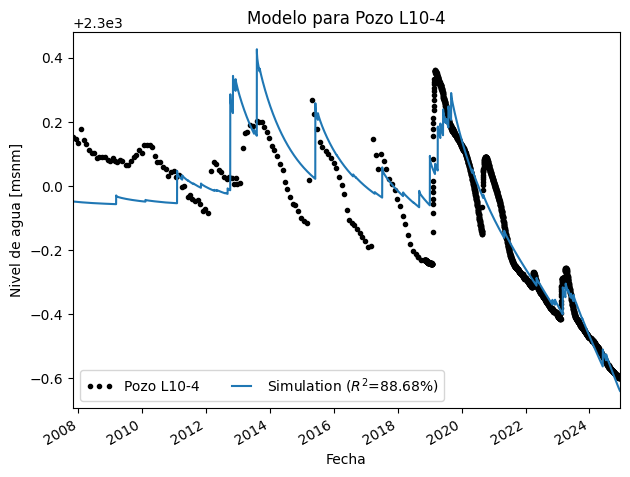

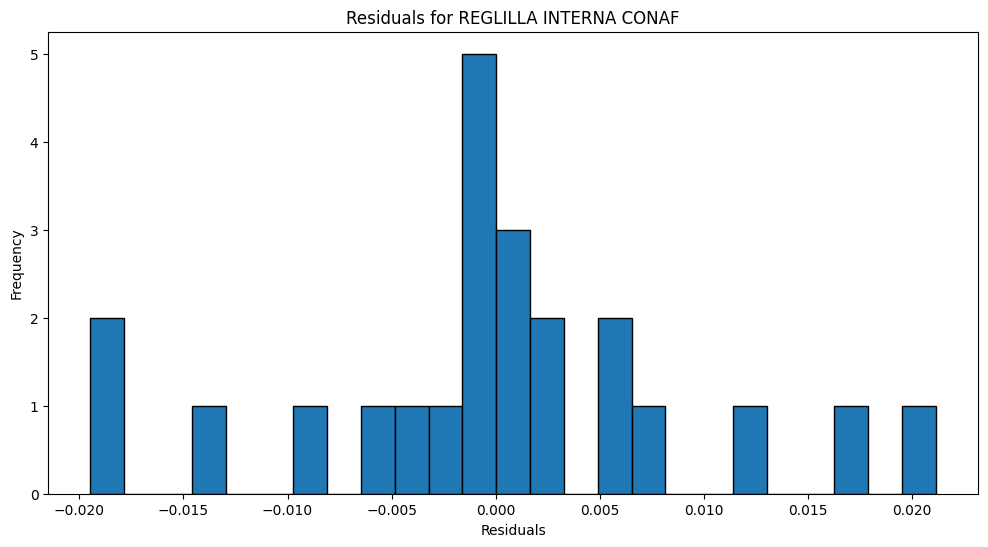

<Figure size 1200x600 with 0 Axes>

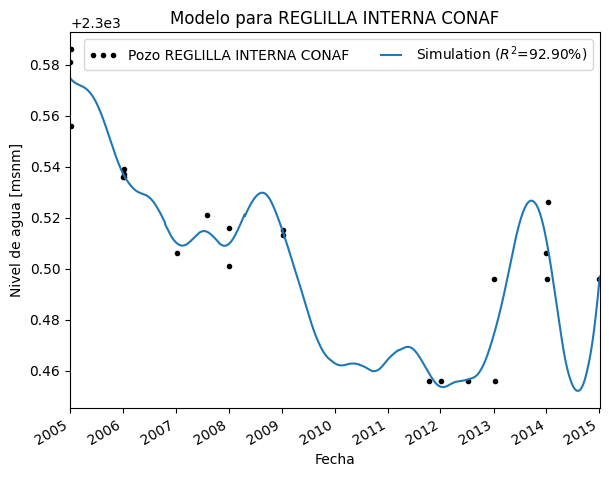

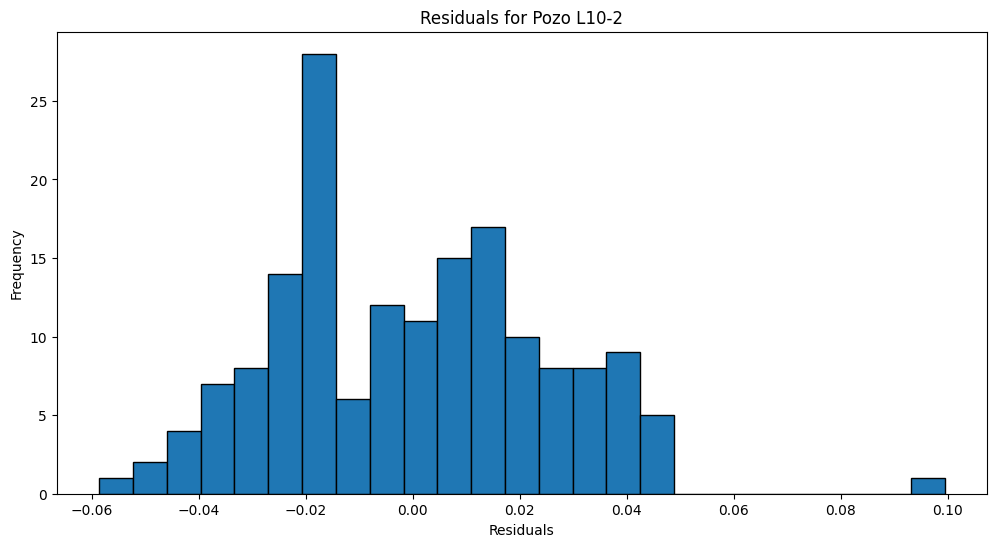

<Figure size 1200x600 with 0 Axes>

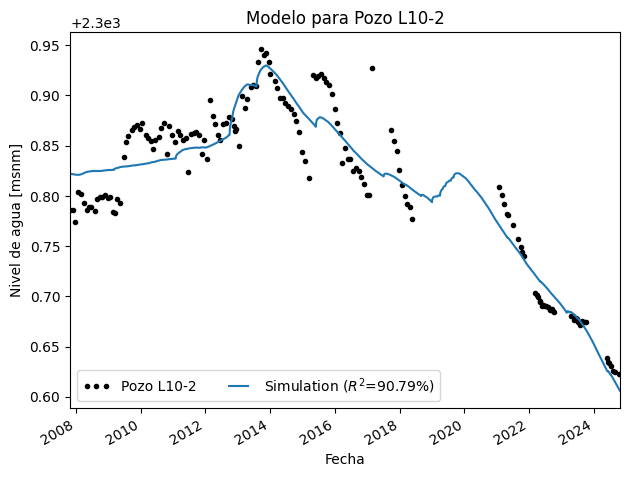

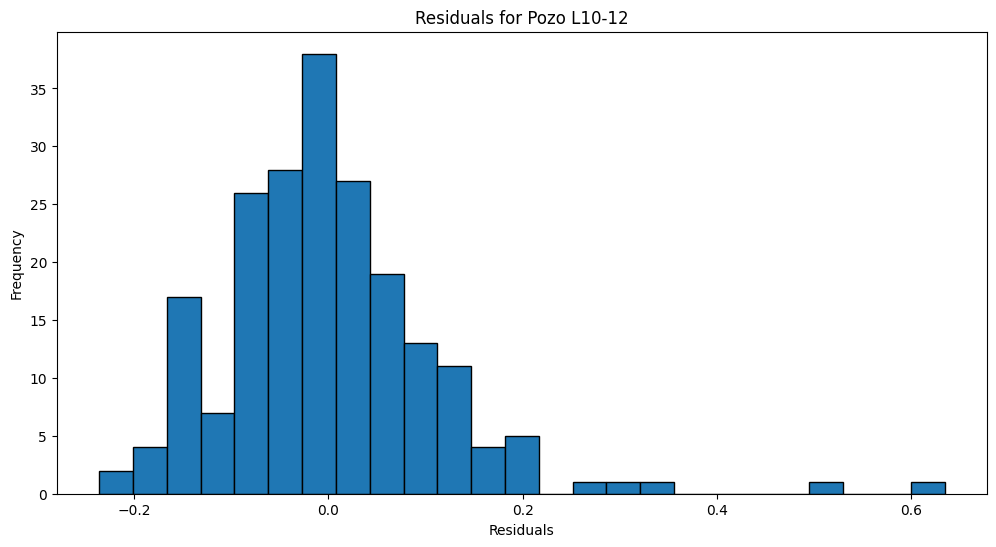

<Figure size 1200x600 with 0 Axes>

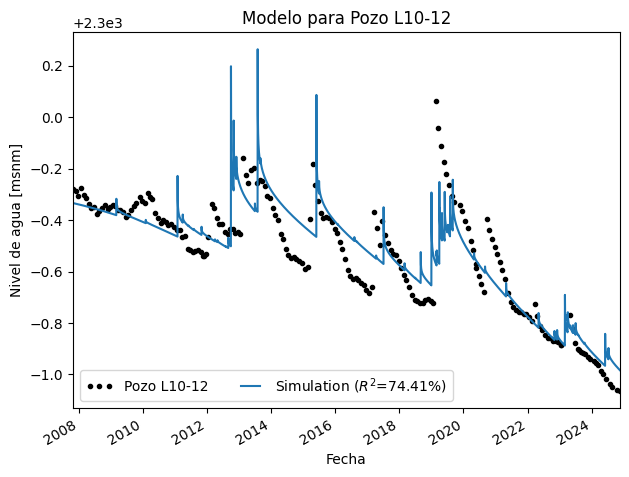

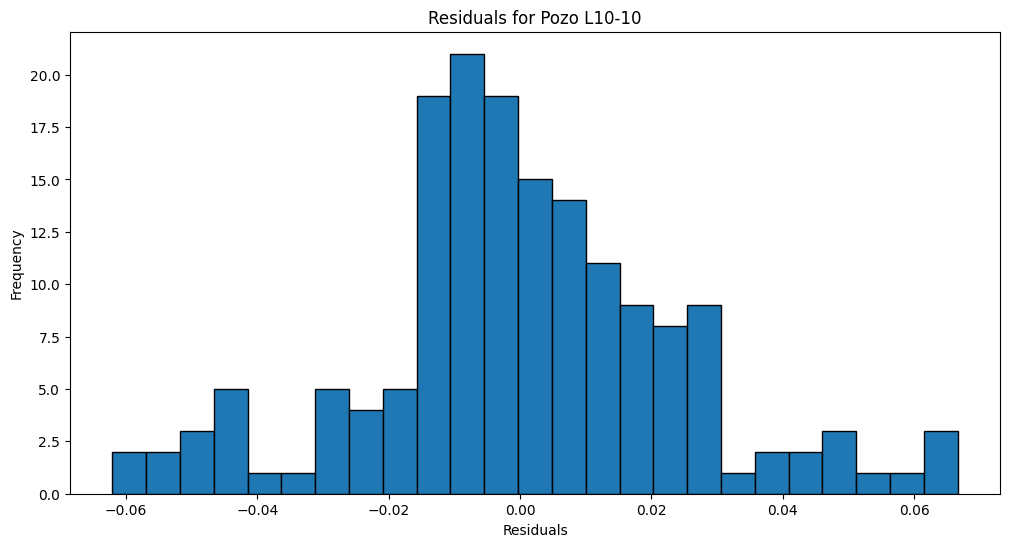

<Figure size 1200x600 with 0 Axes>

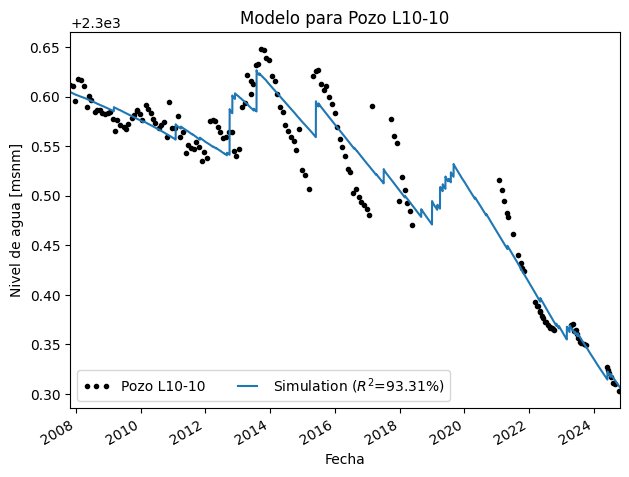

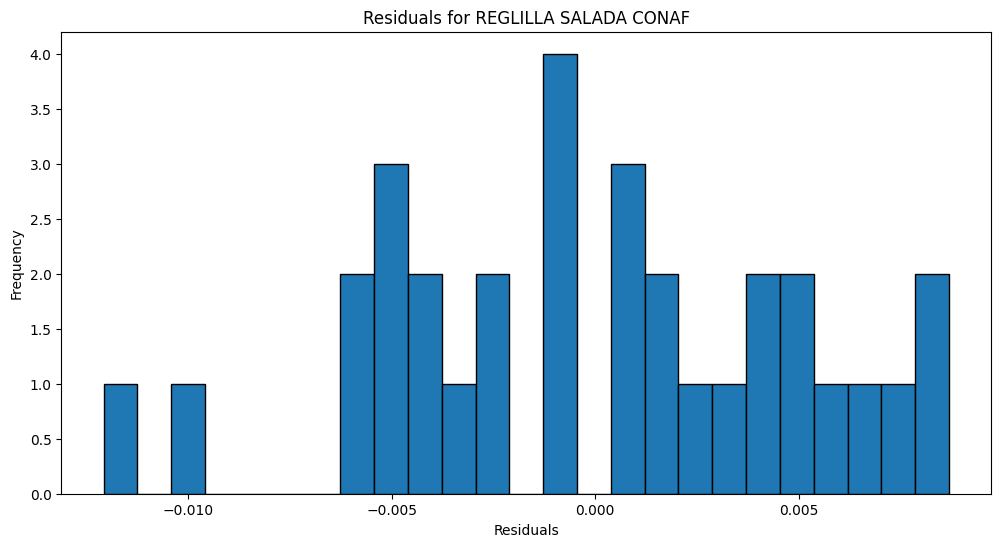

<Figure size 1200x600 with 0 Axes>

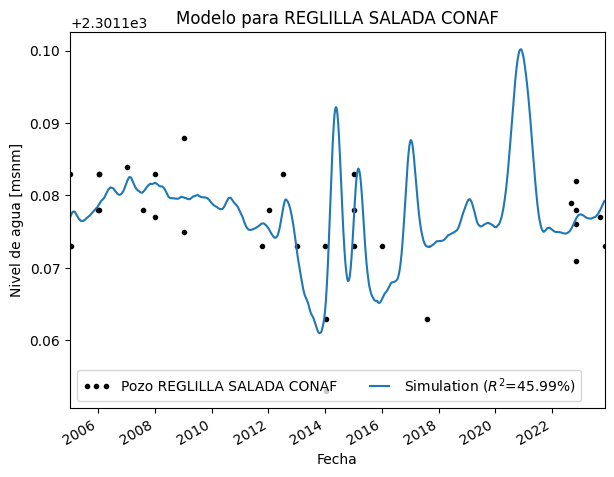

In [124]:

#### Modelo D: Recarga + Escondida



# --- Paso 4: Crear modelos individuales para cada pozo ---
modelos_individuales = {}
model_stats = {}

# Asegurarse de que los índices de las series de precipitación y evaporación sean de tipo datetime
precipitacion.index = pd.to_datetime(precipitacion.index, errors='coerce')
evaporacion.index = pd.to_datetime(evaporacion.index, errors='coerce')

# Eliminar NaNs de los índices de las series de precipitación y evaporación
precipitacion = precipitacion.loc[precipitacion.index.dropna()]
evaporacion = evaporacion.loc[evaporacion.index.dropna()]

# Ordenar los índices de las series de precipitación y evaporación
precipitacion = precipitacion.sort_index()
evaporacion = evaporacion.sort_index()

# Asegurarse de que las series de precipitación y evaporación tengan una frecuencia regular
precipitacion = precipitacion.asfreq('D')
evaporacion = evaporacion.asfreq('D')
# print(precipitacion)
# print(evaporacion)

# plt.plot(precipitacion.index, precipitacion.values)
# plt.plot(evaporacion.index, evaporacion.values)

list_wel = [wel_alb / 86.4, wel_sqm_mop, wel_sqm_sop, wel_tuc /86.4, wel_til / 86.4, wel_neg / 86.4, wel_mon / 86.4]
print(len(list_wel))
print(len(list_wel[0:3]))
dis = [16000,25000,28000,16000,16000,43000,63000]

list_wel2 = list_wel[0:3]

pozos_a_modelar = [
    "Pozo REGLILLA SALADA CONAF", "Pozo L10-10", "Pozo L10-12", 
    "Pozo REGLILLA SALADITA CONAF", "Pozo REGLILLA INTERNA CONAF", "Pozo L10-2", "Pozo L10-2"
]


for pozo, datos in datos_pozos.items():
    if pozo == "REGLILLA SALADA CONAF" or pozo == "Pozo L10-10" or pozo == "Pozo L10-12" or pozo == "REGLILLA SALADITA CONAF" or pozo == "REGLILLA INTERNA CONAF" or pozo == "Pozo L10-2" or pozo == "Pozo L10-4":
        
        # Eliminar NaNs del índice de la serie
        datos = datos.loc[datos.index.dropna()]
        
        # Eliminar índices duplicados
        datos = datos.loc[~datos.index.duplicated(keep='first')]
        
        # Ordenar el índice de la serie
        datos = datos.sort_index()
        
        # Crear un modelo Pastas para el pozo actual
        ml = ps.Model(datos, name=pozo+" Recarga")
        #ml.add_noisemodel(ps.ArNoiseModel()) # Does not help too much
        # distances = [18000,280000000]
        # distances2 = [18000,28000,25000]
        # Añadir series de estrés (precipitación y evaporación)
        #Interna = 0.001
        #all 0.1
        if pozo == "REGLILLA INTERNA CONAF":
            sm_precip = ps.StressModel(precipitacion*0.1, ps.Gamma(), settings="prec", name="precipitacion")#, up=True)
        else:
            sm_precip = ps.StressModel(precipitacion*0.1, ps.Gamma(), settings="prec", name="precipitacion")
            
        sm_evap = ps.StressModel(evaporacion, ps.Gamma(), settings="evap", name="evaporacion")#, up=False)
        
        sm_alb = ps.StressModel(wel_alb / 84.6, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_sqm = ps.StressModel(wel_sqm, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        # sm_wel = ps.WellModel([wel_alb/ 1e6, wel_sqm], "WellModel", distances)
        sm_sqm_mop = ps.StressModel(wel_sqm_mop, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_sqm_sop = ps.StressModel(wel_sqm_sop, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        
        sm_mon = ps.StressModel(wel_mon / 86.4, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_til = ps.StressModel(wel_til / 86.4, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_neg = ps.StressModel(wel_neg / 86.4, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_tuc = ps.StressModel(wel_tuc / 86.4, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        
        # sm_wel2 = ps.WellModel([list_wel[0],list_wel[1]], "WellModel", [dis[0],dis[1]])#dis[0:3])
        sm_wel2 = ps.WellModel(list_wel, "WellModel", dis)
   
        #POZOS
        # sm_rch = ps.RechargeModel(
        #     precipitacion,
        #     evaporacion,
        #     ps.Gamma(),
        #     name="rainevap",
        #     recharge=ps.rch.Peterson(),
        #     settings=("prec", "evap"),
        # )    
        # modelos = ["A","B","C","D"]
        #LAGUNAS
        # for m in modelos:
        #     if m == "A":
        #         if pozo == "Pozo REGLILLA INTERNA CONAF":
        #             f=0.0001
        #         else:
        #             f=0.1
        #         sm_precip = ps.StressModel(precipitacion*f, ps.Gamma(), settings="prec", name="precipitacion")#, up=True)
        #         sm_evap = ps.StressModel(evaporacion, ps.Gamma(), settings="evap", name="evaporacion")#, up=False)
        #         ml.add_stressmodel(sm_precip)
        #         ml.add_stressmodel(sm_evap)
        #         ml.solve() 
        #         ml.
        #     elif m == "B":
                
        # sm_rch = ps.RechargeModel(
        #     precipitacion*0.8,
        #     evaporacion,
        #     ps.Gamma(),
        #     name="rainevap",
        #     recharge=ps.rch.Linear(),
        #     settings=("prec", "evap"),
        # )     
        
        #sm_rch = ps.RechargeModel(precipitacion, evaporacion, ps.Exponential(), "Recharge")
        
        sm_rch = ps.RechargeModel(
            precipitacion*0.8,
            evaporacion,
            ps.Gamma(),
            name="rainevap",
            recharge=ps.rch.Linear(),
            settings=("prec", "evap"),
        )     
        
        #sm_rch = ps.RechargeModel(precipitacion, evaporacion, ps.Exponential(), "Recharge")
        
        if "REGLILLA" in pozo:
            ml.add_stressmodel(sm_precip)
            ml.add_stressmodel(sm_evap)
        else:
            ml.add_stressmodel(sm_rch)
        # ml.add_stressmodel(sm_alb)
        # ml2 = ml.copy(name=pozo+" Recarga + Extracciones")
        # ml.add_stressmodel(sm_sqm_mop)
        # ml.add_stressmodel(sm_sqm_sop)
        # ml.add_stressmodel(sm_sqm)
        # ml.add_stressmodel(sm_mon)
        ml.add_stressmodel(sm_til)
        # ml.add_stressmodel(sm_neg)
        ml.add_stressmodel(sm_tuc)
        ml.solve()
        # ml.add_stressmodel(sm_precip)
        # ml.add_stressmodel(sm_evap)
        # ml.add_stressmodel(sm_rch)

        
        
        # ml.add_stressmodel(sm_wel)
        # ml.add_stressmodel(sm_alb)
        #ml.add_stressmodel(sm_sqm)
        # ml.add_stressmodel(sm_sqm_mop)
        # ml.add_stressmodel(sm_sqm_sop)
        # ml2.add_stressmodel(sm_wel2)
        # ml.add_stressmodel(sm_mon)
        # ml2.add_stressmodel(sm_til)
        # ml.add_stressmodel(sm_neg)
        # ml2.add_stressmodel(sm_tuc)
        
        # ml.add_noisemodel(ps.ArmaNoiseModel())
        
        # ml2 = ml.copy(name=pozo+" Modelo A")
        # ml.solve()
        res =  ml.residuals()
        fig = plt.figure(figsize=(12, 6))
        plt.hist(res, bins=25, edgecolor='black')
        plt.xlabel('Residuals')
        plt.ylabel('Frequency')
        plt.title(f'Residuals for {pozo}')
        
        fig = plt.figure(figsize=(12, 6))
        ml.plot()
        plt.ylabel('Nivel de agua [msnm]')
        plt.title(f'Modelo para {pozo}')

   

            
        # Calibrar el modelo
        # mlwel = ml.solve()
        
        # Guardar el modelo en el diccionario
        # modelos_individuales[pozo] = ml

        # Graficar los resultados del modelo individual
        # ml.plot()
        # try:
        #     ml.plots.diagnostics()
        # except:
        #     pass
        # c = ml.get_contributions()
        # print(c)
        
        # report = ml.fit_report()
        # print(report)
        
        
        # try:
        #     ml.plots.diagnostics()
        # except:
        #     pass
            # ml2.plot()
        
        # mc = ps.CompareModels(models=[ml, ml2])
        # mc.plot(adjust_height=True)
        # ml.plots.results(figsize=(10, 6))
        # ml.stats.summary()
        
        r2 = ml.stats.rsq()
        rmse = ml.stats.rmse()
        # except Exception as e:
        #     print(f"Error al resolver el modelo {m} para {pozo}: {e}")
        #     r2, rmse = np.nan, np.nan

        # Guardar modelo y estadísticas
            # Guardar modelo y estadísticas
        modelos_individuales[f"{pozo}_D"] = ml
        model_stats[(pozo)] = {"R²": r2, "RMSE": rmse}

# Convertir estadísticas a DataFrame
        df_model_stats = pd.DataFrame.from_dict(model_stats, orient='index')
        df_model_stats.to_csv("Modelo_D.csv")
        
        # ml2.stats.summary()

        # ml.plots.stacked_results(
        #         figsize=(10, 8),
        #         stacklegend=True,
        #         stackcolors={"Extraction_2": "C1",},
            
        # )
        # plt.title(f"Modelo para el {pozo}")
        # plt.show()
        


7
3
Fit report REGLILLA SALADITA CON Fit Statistics
nfev    92                     EVP        62.04
nobs    36                     R2          0.62
noise   False                  RMSE        0.01
tmin    2005-01-01 00:00:00    AICc     -311.04
tmax    2023-11-08 00:00:00    BIC      -304.00
freq    D                      Obj         0.00
warmup  3650 days 00:00:00     ___             
solver  LeastSquares           Interp.       No

Parameters (10 optimized)
                     optimal      initial  vary
precipitacion_A     0.000010    15.865711  True
precipitacion_n    16.929032     1.000000  True
precipitacion_a   935.847611    10.000000  True
evaporacion_A       0.002026     0.349518  True
evaporacion_n       5.885080     1.000000  True
evaporacion_a       2.643300    10.000000  True
well_A             -0.027112    -0.761634  True
well_a           4722.696208   100.000000  True
well_b              0.087111     1.000000  True
constant_d       2300.960481  2300.943111  True

Warnings

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.

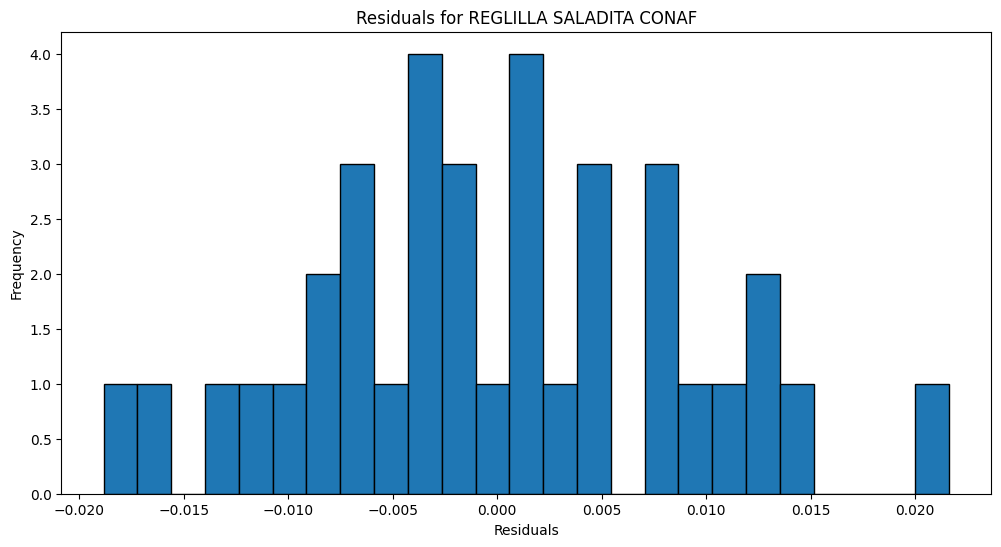

<Figure size 1200x600 with 0 Axes>

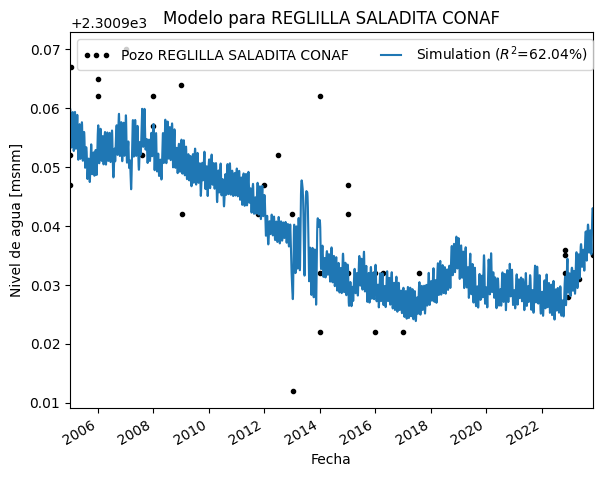

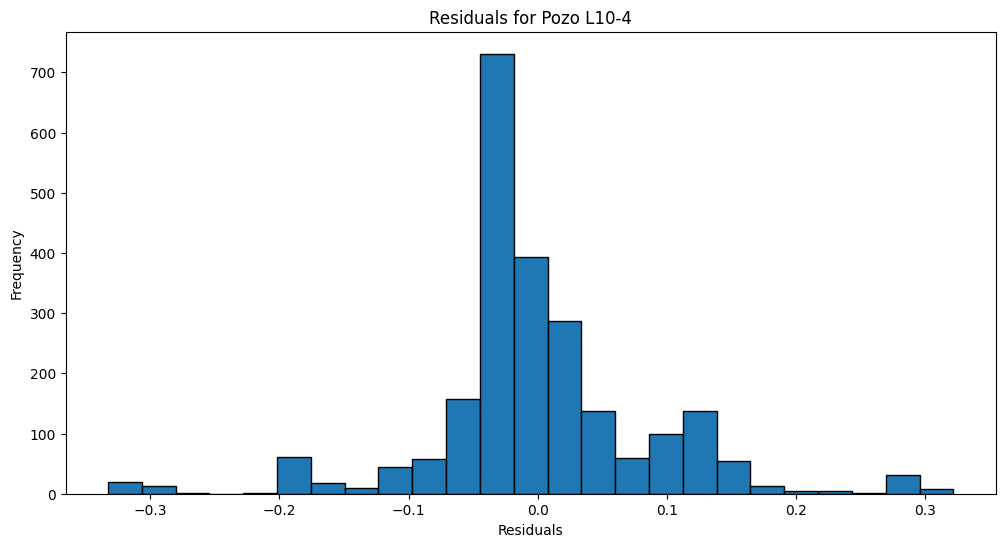

<Figure size 1200x600 with 0 Axes>

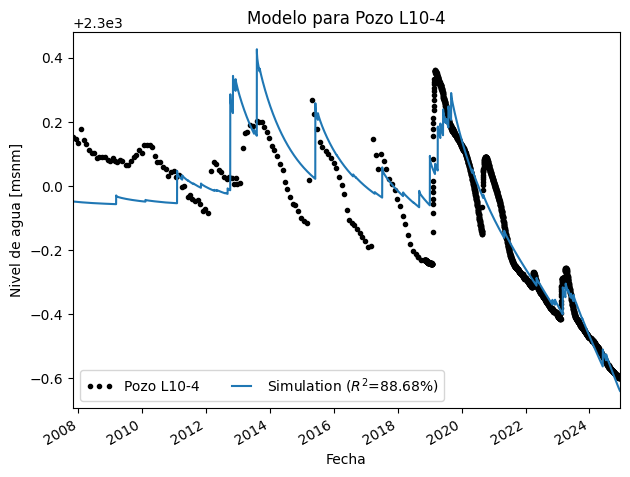

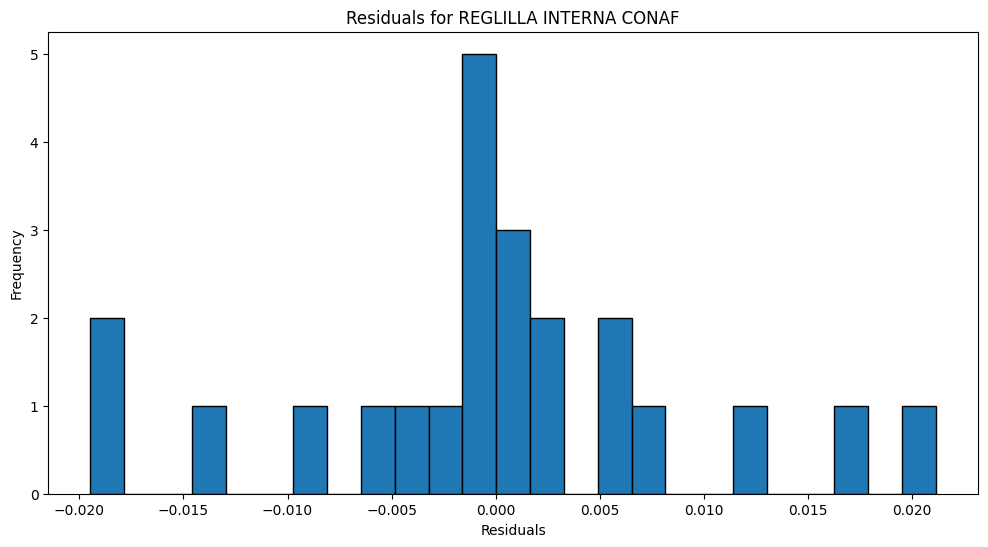

<Figure size 1200x600 with 0 Axes>

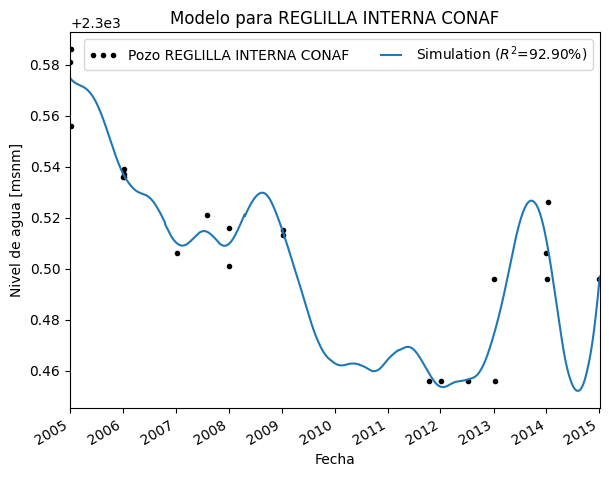

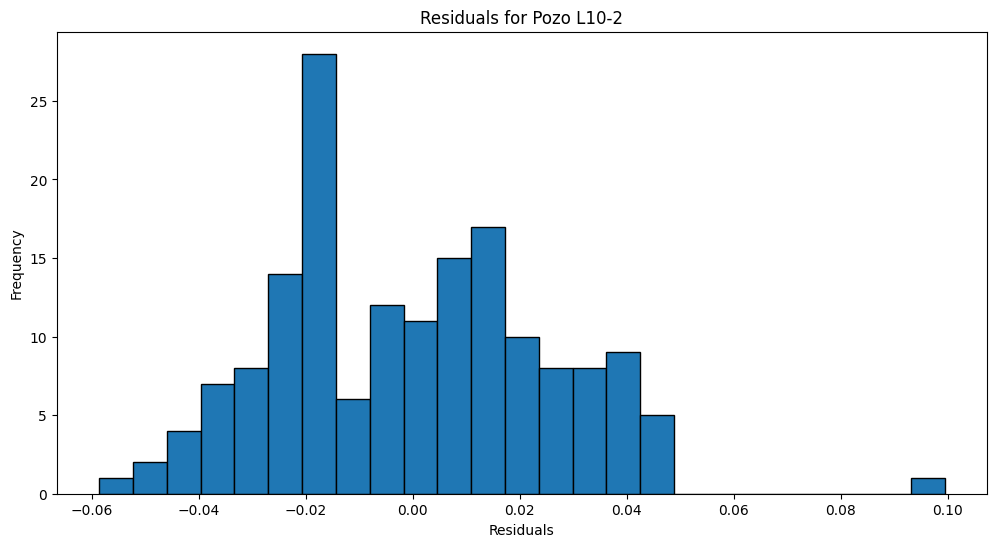

<Figure size 1200x600 with 0 Axes>

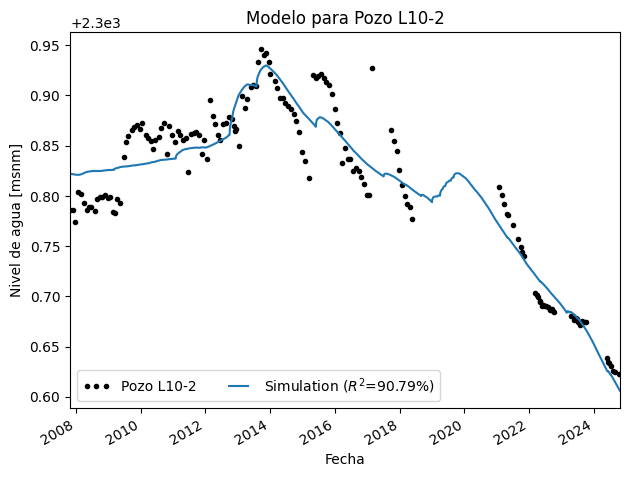

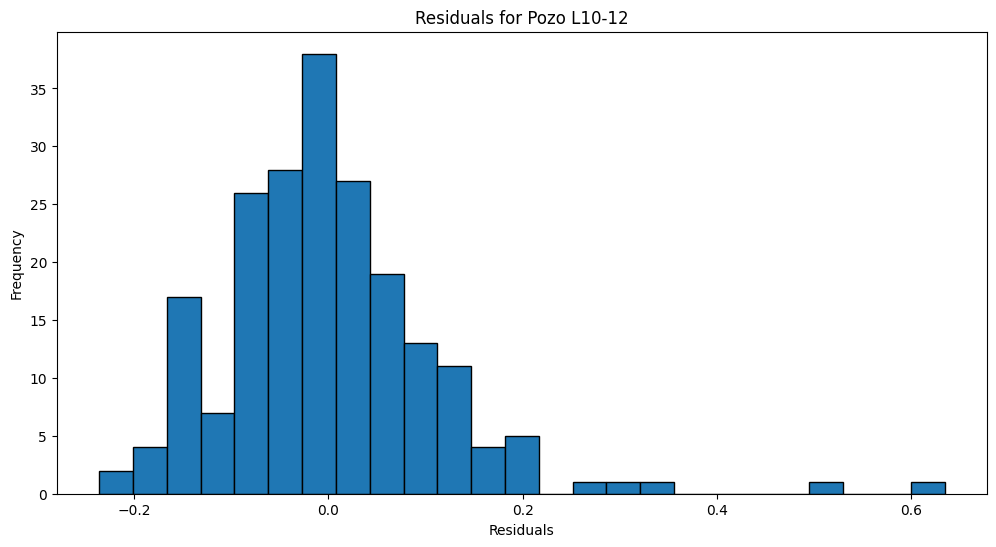

<Figure size 1200x600 with 0 Axes>

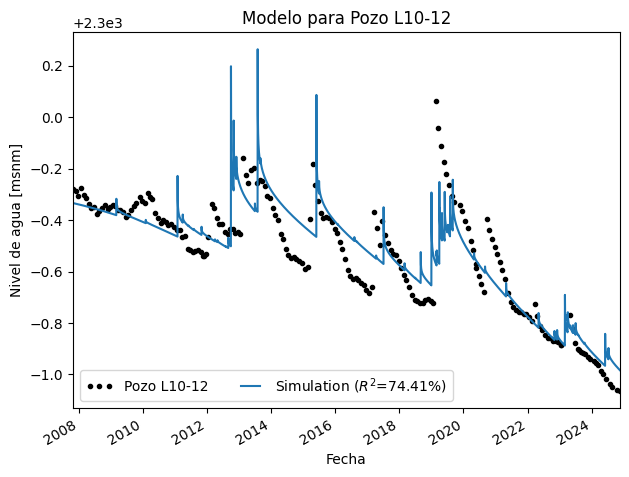

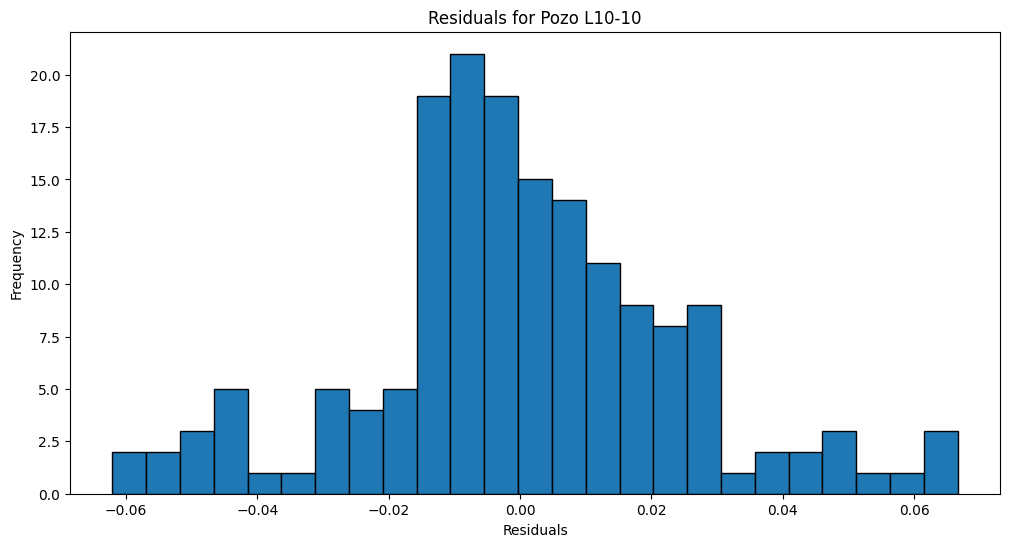

<Figure size 1200x600 with 0 Axes>

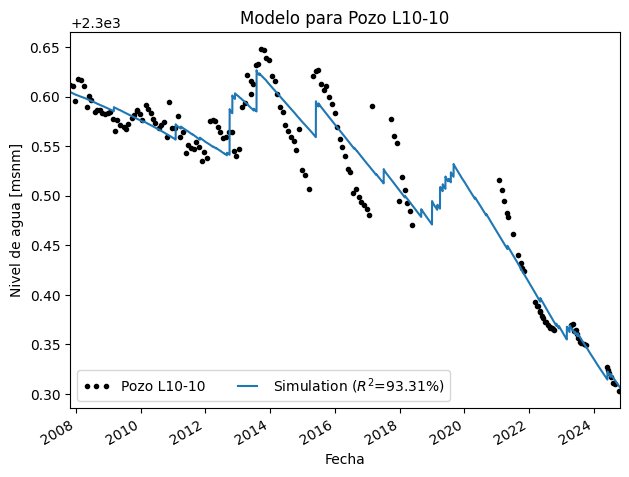

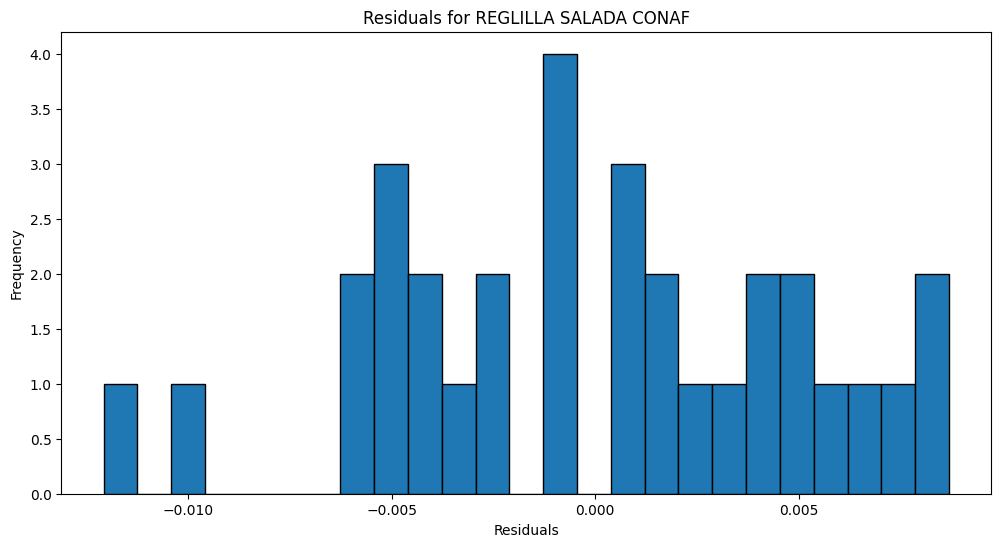

<Figure size 1200x600 with 0 Axes>

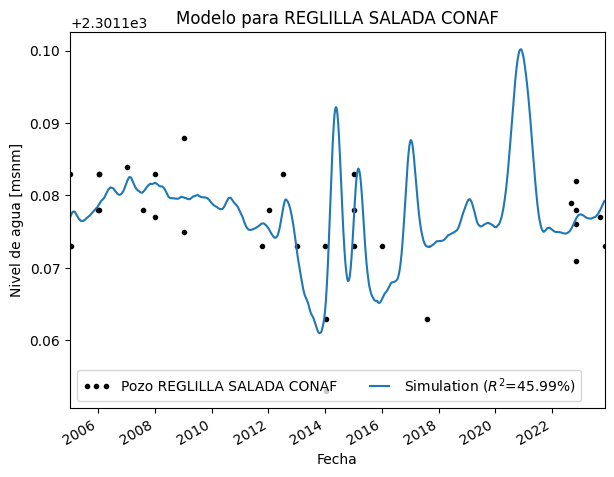

In [125]:

#### Modelo D: Recarga + Escondida (all)



# --- Paso 4: Crear modelos individuales para cada pozo ---
modelos_individuales = {}
model_stats = {}

# Asegurarse de que los índices de las series de precipitación y evaporación sean de tipo datetime
precipitacion.index = pd.to_datetime(precipitacion.index, errors='coerce')
evaporacion.index = pd.to_datetime(evaporacion.index, errors='coerce')

# Eliminar NaNs de los índices de las series de precipitación y evaporación
precipitacion = precipitacion.loc[precipitacion.index.dropna()]
evaporacion = evaporacion.loc[evaporacion.index.dropna()]

# Ordenar los índices de las series de precipitación y evaporación
precipitacion = precipitacion.sort_index()
evaporacion = evaporacion.sort_index()

# Asegurarse de que las series de precipitación y evaporación tengan una frecuencia regular
precipitacion = precipitacion.asfreq('D')
evaporacion = evaporacion.asfreq('D')
# print(precipitacion)
# print(evaporacion)

# plt.plot(precipitacion.index, precipitacion.values)
# plt.plot(evaporacion.index, evaporacion.values)

list_wel = [wel_alb / 86.4, wel_sqm_mop, wel_sqm_sop, wel_tuc /86.4, wel_til / 86.4, wel_neg / 86.4, wel_mon / 86.4]
print(len(list_wel))
print(len(list_wel[0:3]))
dis = [16000,25000,28000,16000,16000,43000,63000]

list_wel2 = list_wel[0:3]

pozos_a_modelar = [
    "Pozo REGLILLA SALADA CONAF", "Pozo L10-10", "Pozo L10-12", 
    "Pozo REGLILLA SALADITA CONAF", "Pozo REGLILLA INTERNA CONAF", "Pozo L10-2", "Pozo L10-2"
]


for pozo, datos in datos_pozos.items():
    if pozo == "REGLILLA SALADA CONAF" or pozo == "Pozo L10-10" or pozo == "Pozo L10-12" or pozo == "REGLILLA SALADITA CONAF" or pozo == "REGLILLA INTERNA CONAF" or pozo == "Pozo L10-2" or pozo == "Pozo L10-4":
        
        # Eliminar NaNs del índice de la serie
        datos = datos.loc[datos.index.dropna()]
        
        # Eliminar índices duplicados
        datos = datos.loc[~datos.index.duplicated(keep='first')]
        
        # Ordenar el índice de la serie
        datos = datos.sort_index()
        
        # Crear un modelo Pastas para el pozo actual
        ml = ps.Model(datos, name=pozo+" Recarga")
        #ml.add_noisemodel(ps.ArNoiseModel()) # Does not help too much
        # distances = [18000,280000000]
        # distances2 = [18000,28000,25000]
        # Añadir series de estrés (precipitación y evaporación)
        #Interna = 0.001
        #all 0.1
        if pozo == "REGLILLA INTERNA CONAF":
            sm_precip = ps.StressModel(precipitacion*0.1, ps.Gamma(), settings="prec", name="precipitacion")#, up=True)
        else:
            sm_precip = ps.StressModel(precipitacion*0.1, ps.Gamma(), settings="prec", name="precipitacion")
            
        sm_evap = ps.StressModel(evaporacion, ps.Gamma(), settings="evap", name="evaporacion")#, up=False)
        
        sm_alb = ps.StressModel(wel_alb / 84.6, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_sqm = ps.StressModel(wel_sqm, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        # sm_wel = ps.WellModel([wel_alb/ 1e6, wel_sqm], "WellModel", distances)
        sm_sqm_mop = ps.StressModel(wel_sqm_mop, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_sqm_sop = ps.StressModel(wel_sqm_sop, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        
        sm_mon = ps.StressModel(wel_mon / 86.4, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_til = ps.StressModel(wel_til / 86.4, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_neg = ps.StressModel(wel_neg / 86.4, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_tuc = ps.StressModel(wel_tuc / 86.4, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        
        # sm_wel2 = ps.WellModel([list_wel[0],list_wel[1]], "WellModel", [dis[0],dis[1]])#dis[0:3])
        sm_wel2 = ps.WellModel(list_wel, "WellModel", dis)
   
        #POZOS
        # sm_rch = ps.RechargeModel(
        #     precipitacion,
        #     evaporacion,
        #     ps.Gamma(),
        #     name="rainevap",
        #     recharge=ps.rch.Peterson(),
        #     settings=("prec", "evap"),
        # )    
        # modelos = ["A","B","C","D"]
        #LAGUNAS
        # for m in modelos:
        #     if m == "A":
        #         if pozo == "Pozo REGLILLA INTERNA CONAF":
        #             f=0.0001
        #         else:
        #             f=0.1
        #         sm_precip = ps.StressModel(precipitacion*f, ps.Gamma(), settings="prec", name="precipitacion")#, up=True)
        #         sm_evap = ps.StressModel(evaporacion, ps.Gamma(), settings="evap", name="evaporacion")#, up=False)
        #         ml.add_stressmodel(sm_precip)
        #         ml.add_stressmodel(sm_evap)
        #         ml.solve() 
        #         ml.
        #     elif m == "B":
                
        # sm_rch = ps.RechargeModel(
        #     precipitacion*0.8,
        #     evaporacion,
        #     ps.Gamma(),
        #     name="rainevap",
        #     recharge=ps.rch.Linear(),
        #     settings=("prec", "evap"),
        # )     
        
        #sm_rch = ps.RechargeModel(precipitacion, evaporacion, ps.Exponential(), "Recharge")
        
        sm_rch = ps.RechargeModel(
            precipitacion*0.8,
            evaporacion,
            ps.Gamma(),
            name="rainevap",
            recharge=ps.rch.Linear(),
            settings=("prec", "evap"),
        )     
        
        #sm_rch = ps.RechargeModel(precipitacion, evaporacion, ps.Exponential(), "Recharge")
        
        if "REGLILLA" in pozo:
            ml.add_stressmodel(sm_precip)
            ml.add_stressmodel(sm_evap)
        else:
            ml.add_stressmodel(sm_rch)
        # ml.add_stressmodel(sm_alb)
        # ml2 = ml.copy(name=pozo+" Recarga + Extracciones")
        # ml.add_stressmodel(sm_sqm_mop)
        # ml.add_stressmodel(sm_sqm_sop)
        # ml.add_stressmodel(sm_sqm)
        ml.add_stressmodel(sm_mon)
        ml.add_stressmodel(sm_til)
        ml.add_stressmodel(sm_neg)
        ml.add_stressmodel(sm_tuc)
        ml.solve()
        # ml.add_stressmodel(sm_precip)
        # ml.add_stressmodel(sm_evap)
        # ml.add_stressmodel(sm_rch)

        
        
        # ml.add_stressmodel(sm_wel)
        # ml.add_stressmodel(sm_alb)
        #ml.add_stressmodel(sm_sqm)
        # ml.add_stressmodel(sm_sqm_mop)
        # ml.add_stressmodel(sm_sqm_sop)
        # ml2.add_stressmodel(sm_wel2)
        # ml.add_stressmodel(sm_mon)
        # ml2.add_stressmodel(sm_til)
        # ml.add_stressmodel(sm_neg)
        # ml2.add_stressmodel(sm_tuc)
        
        # ml.add_noisemodel(ps.ArmaNoiseModel())
        
        # ml2 = ml.copy(name=pozo+" Modelo A")
        # ml.solve()
        res =  ml.residuals()
        fig = plt.figure(figsize=(12, 6))
        plt.hist(res, bins=25, edgecolor='black')
        plt.xlabel('Residuals')
        plt.ylabel('Frequency')
        plt.title(f'Residuals for {pozo}')
        
        fig = plt.figure(figsize=(12, 6))
        ml.plot()
        plt.ylabel('Nivel de agua [msnm]')
        plt.title(f'Modelo para {pozo}')

   

            
        # Calibrar el modelo
        # mlwel = ml.solve()
        
        # Guardar el modelo en el diccionario
        # modelos_individuales[pozo] = ml

        # Graficar los resultados del modelo individual
        # ml.plot()
        # try:
        #     ml.plots.diagnostics()
        # except:
        #     pass
        # c = ml.get_contributions()
        # print(c)
        
        # report = ml.fit_report()
        # print(report)
        
        
        # try:
        #     ml.plots.diagnostics()
        # except:
        #     pass
            # ml2.plot()
        
        # mc = ps.CompareModels(models=[ml, ml2])
        # mc.plot(adjust_height=True)
        # ml.plots.results(figsize=(10, 6))
        # ml.stats.summary()
        
        r2 = ml.stats.rsq()
        rmse = ml.stats.rmse()
        # except Exception as e:
        #     print(f"Error al resolver el modelo {m} para {pozo}: {e}")
        #     r2, rmse = np.nan, np.nan

        # Guardar modelo y estadísticas
            # Guardar modelo y estadísticas
        modelos_individuales[f"{pozo}_D2"] = ml
        model_stats[(pozo)] = {"R²": r2, "RMSE": rmse}

# Convertir estadísticas a DataFrame
        df_model_stats = pd.DataFrame.from_dict(model_stats, orient='index')
        df_model_stats.to_csv("Modelo_D2.csv")
        
        # ml2.stats.summary()

        # ml.plots.stacked_results(
        #         figsize=(10, 8),
        #         stacklegend=True,
        #         stackcolors={"Extraction_2": "C1",},
            
        # )
        # plt.title(f"Modelo para el {pozo}")
        # plt.show()
        


7
3
Fit report REGLILLA SALADITA CON Fit Statistics
nfev    50                     EVP        25.62
nobs    36                     R2          0.26
noise   False                  RMSE        0.01
tmin    2005-01-01 00:00:00    AICc     -286.82
tmax    2023-11-08 00:00:00    BIC      -279.79
freq    D                      Obj         0.00
warmup  3650 days 00:00:00     ___             
solver  LeastSquares           Interp.       No

Parameters (10 optimized)
                     optimal      initial  vary
precipitacion_A    81.120613    15.865711  True
precipitacion_n     0.010000     1.000000  True
precipitacion_a     4.638584    10.000000  True
evaporacion_A       0.004762     0.349518  True
evaporacion_n       2.115770     1.000000  True
evaporacion_a      30.111253    10.000000  True
well_A             -0.000012    -0.004362  True
well_a             60.366636   100.000000  True
well_b              0.212079     1.000000  True
constant_d       2300.898954  2300.943111  True

Warnings

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.

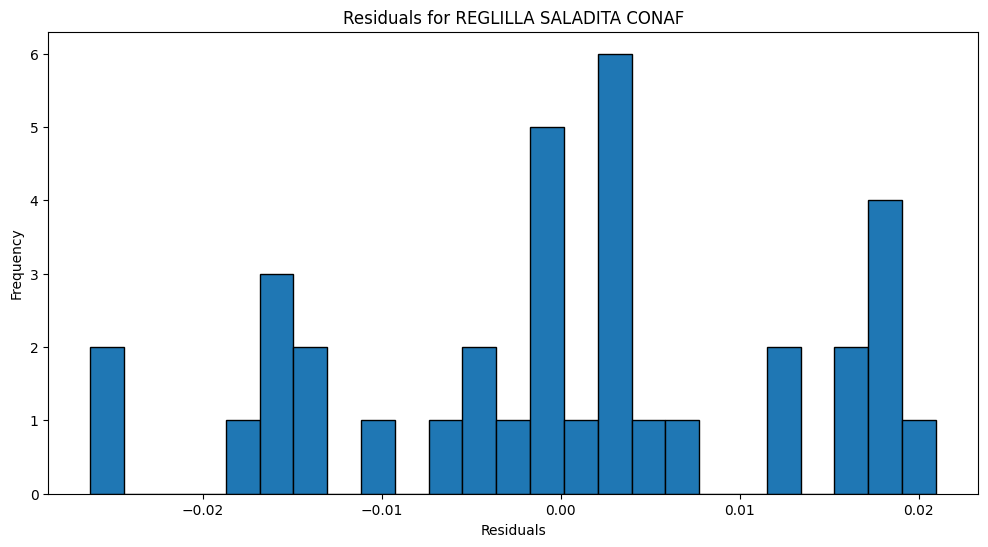

<Figure size 1200x600 with 0 Axes>

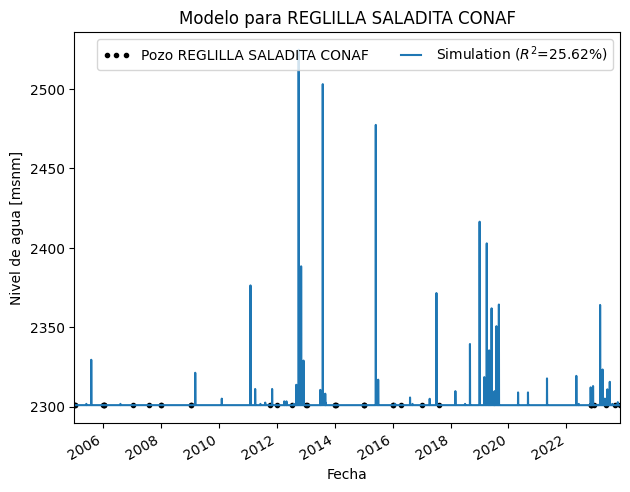

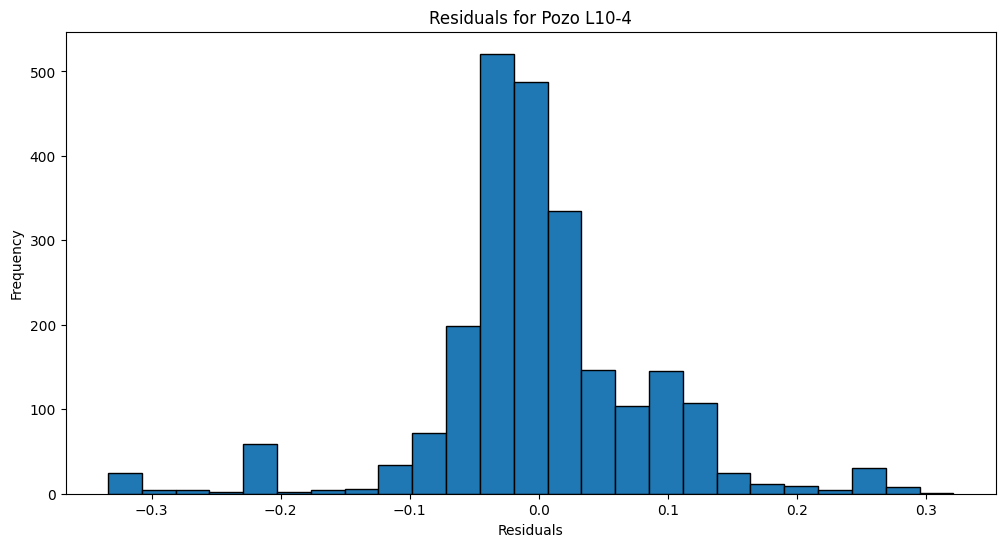

<Figure size 1200x600 with 0 Axes>

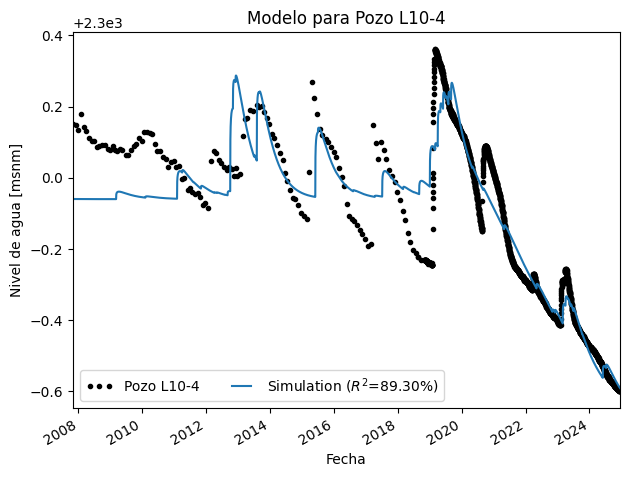

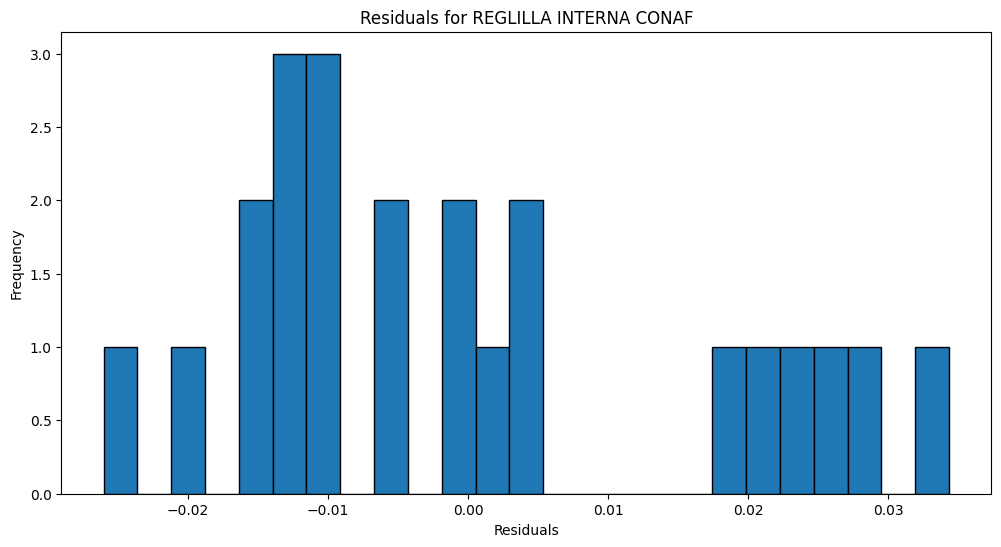

<Figure size 1200x600 with 0 Axes>

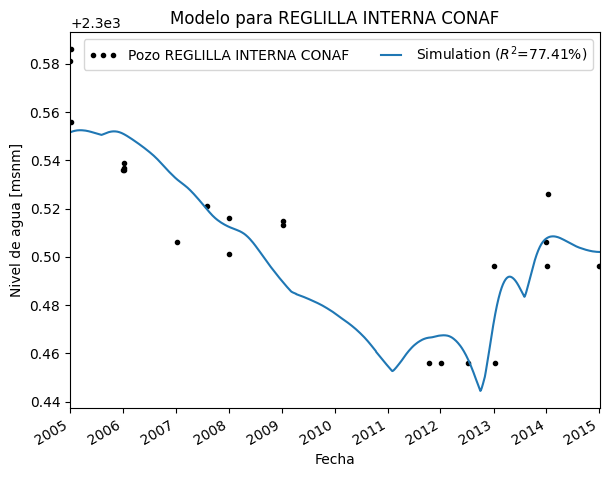

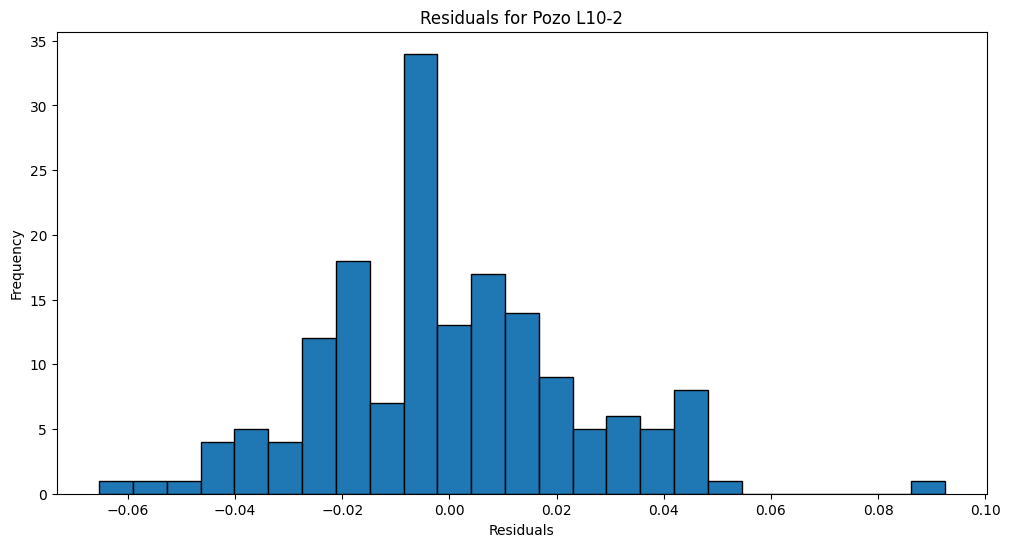

<Figure size 1200x600 with 0 Axes>

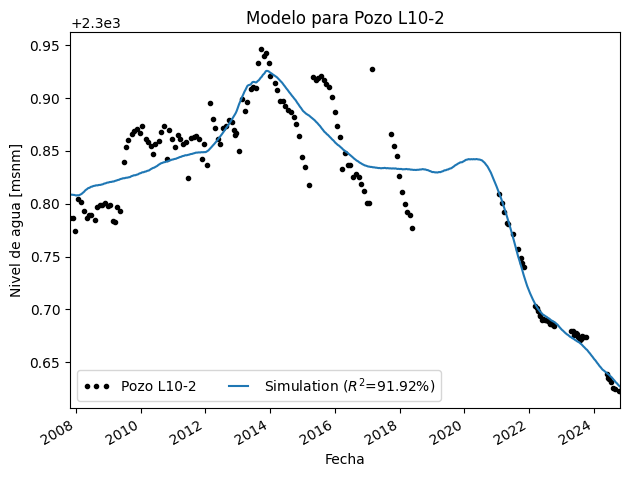

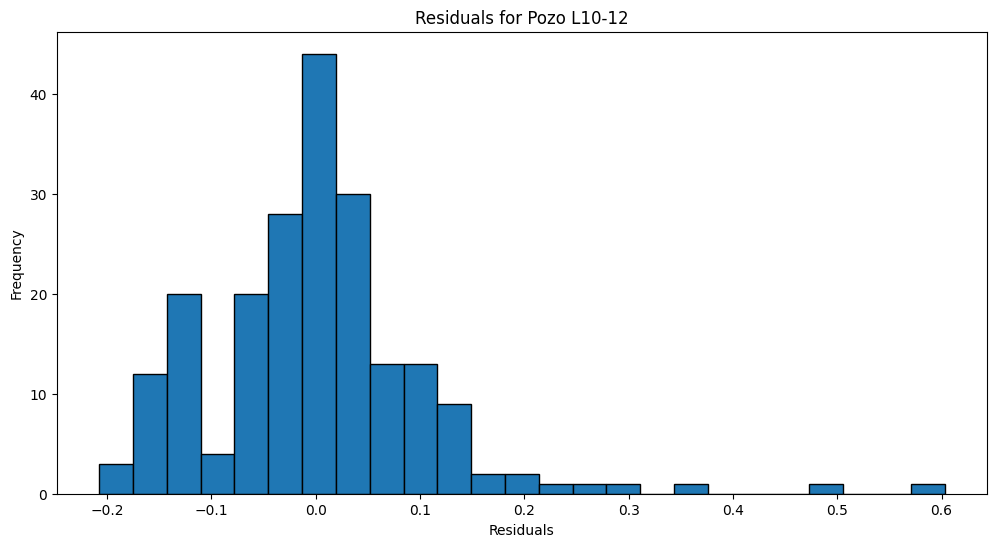

<Figure size 1200x600 with 0 Axes>

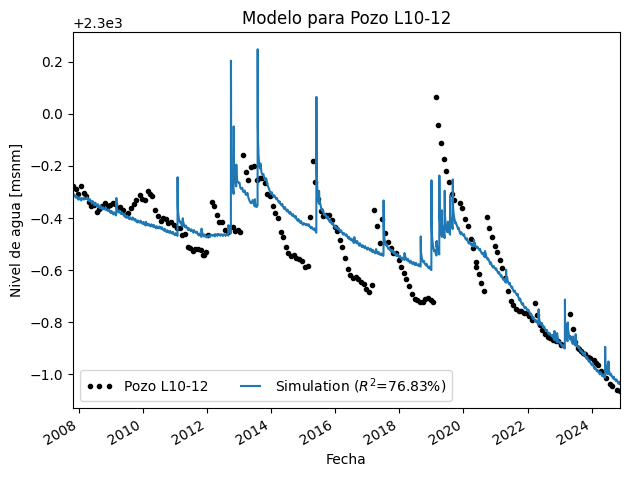

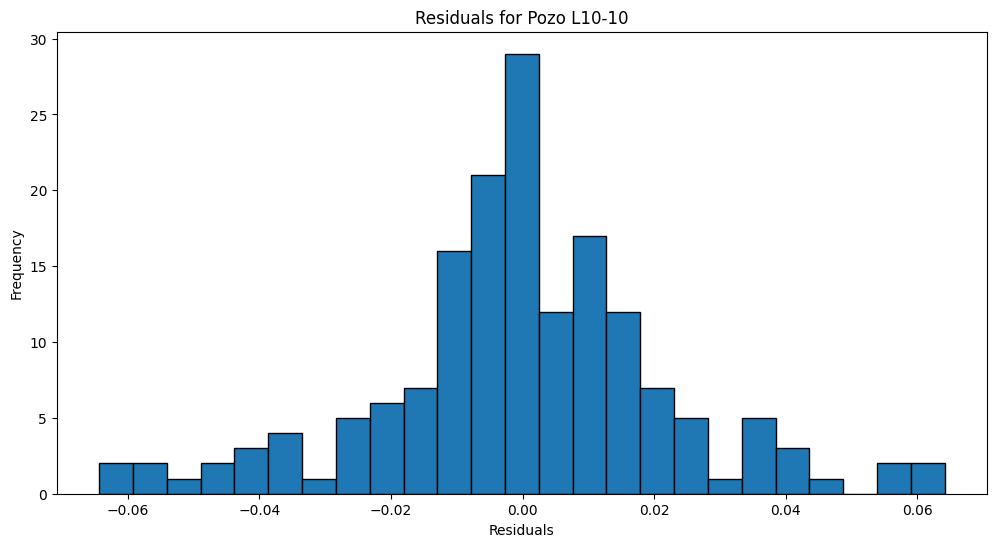

<Figure size 1200x600 with 0 Axes>

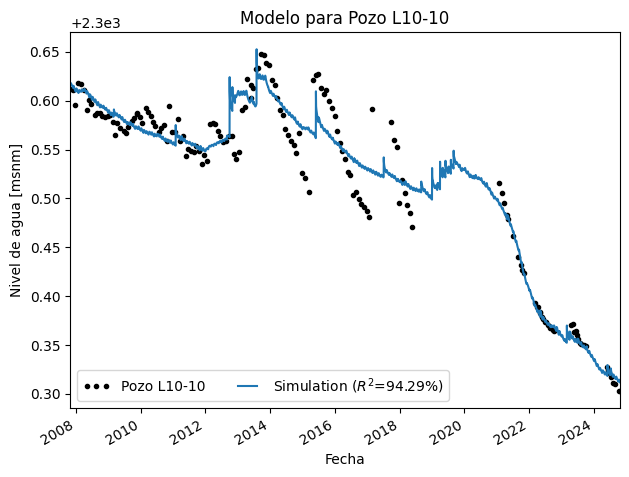

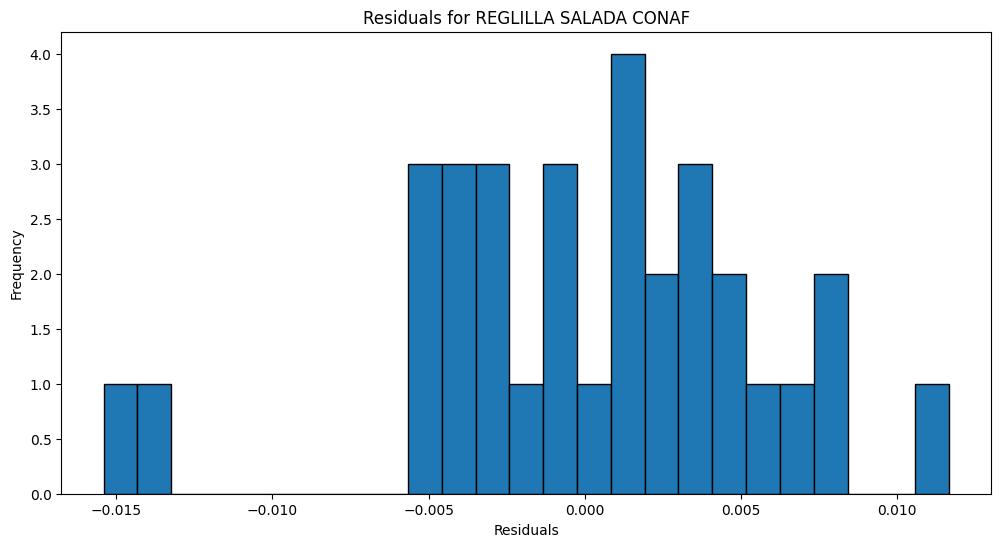

<Figure size 1200x600 with 0 Axes>

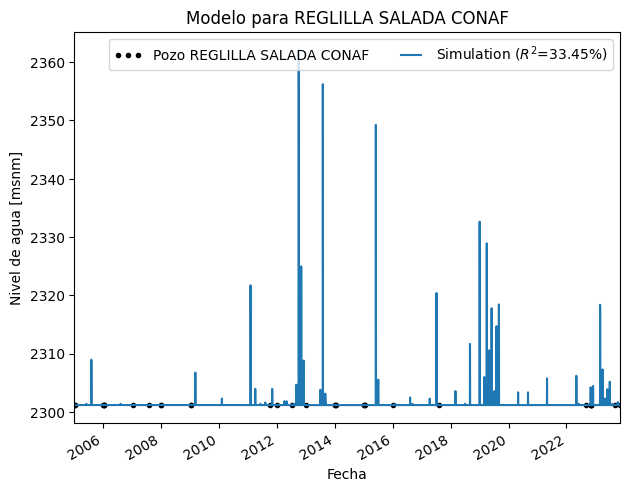

In [126]:

#### Modelo E: Recarga + Salar



# --- Paso 4: Crear modelos individuales para cada pozo ---
modelos_individuales = {}
model_stats = {}

# Asegurarse de que los índices de las series de precipitación y evaporación sean de tipo datetime
precipitacion.index = pd.to_datetime(precipitacion.index, errors='coerce')
evaporacion.index = pd.to_datetime(evaporacion.index, errors='coerce')

# Eliminar NaNs de los índices de las series de precipitación y evaporación
precipitacion = precipitacion.loc[precipitacion.index.dropna()]
evaporacion = evaporacion.loc[evaporacion.index.dropna()]

# Ordenar los índices de las series de precipitación y evaporación
precipitacion = precipitacion.sort_index()
evaporacion = evaporacion.sort_index()

# Asegurarse de que las series de precipitación y evaporación tengan una frecuencia regular
precipitacion = precipitacion.asfreq('D')
evaporacion = evaporacion.asfreq('D')
# print(precipitacion)
# print(evaporacion)

# plt.plot(precipitacion.index, precipitacion.values)
# plt.plot(evaporacion.index, evaporacion.values)

list_wel = [wel_alb / 86.4, wel_sqm_mop, wel_sqm_sop, wel_tuc /86.4, wel_til / 86.4, wel_neg / 86.4, wel_mon / 86.4]
print(len(list_wel))
print(len(list_wel[0:3]))
dis = [16000,25000,28000,16000,16000,43000,63000]

list_wel2 = list_wel[0:3]

pozos_a_modelar = [
    "Pozo REGLILLA SALADA CONAF", "Pozo L10-10", "Pozo L10-12", 
    "Pozo REGLILLA SALADITA CONAF", "Pozo REGLILLA INTERNA CONAF", "Pozo L10-2", "Pozo L10-2"
]


for pozo, datos in datos_pozos.items():
    if pozo == "REGLILLA SALADA CONAF" or pozo == "Pozo L10-10" or pozo == "Pozo L10-12" or pozo == "REGLILLA SALADITA CONAF" or pozo == "REGLILLA INTERNA CONAF" or pozo == "Pozo L10-2" or pozo == "Pozo L10-4":
        
        # Eliminar NaNs del índice de la serie
        datos = datos.loc[datos.index.dropna()]
        
        # Eliminar índices duplicados
        datos = datos.loc[~datos.index.duplicated(keep='first')]
        
        # Ordenar el índice de la serie
        datos = datos.sort_index()
        
        # Crear un modelo Pastas para el pozo actual
        ml = ps.Model(datos, name=pozo+" Recarga")
        #ml.add_noisemodel(ps.ArNoiseModel()) # Does not help too much
        # distances = [18000,280000000]
        # distances2 = [18000,28000,25000]
        # Añadir series de estrés (precipitación y evaporación)
        #Interna = 0.001
        #all 0.1
        if pozo == "REGLILLA INTERNA CONAF":
            sm_precip = ps.StressModel(precipitacion*0.1, ps.Gamma(), settings="prec", name="precipitacion")#, up=True)
        else:
            sm_precip = ps.StressModel(precipitacion*0.1, ps.Gamma(), settings="prec", name="precipitacion")
            
        sm_evap = ps.StressModel(evaporacion, ps.Gamma(), settings="evap", name="evaporacion")#, up=False)
        
        sm_alb = ps.StressModel(wel_alb / 84.6, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_sqm = ps.StressModel(wel_sqm, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        # sm_wel = ps.WellModel([wel_alb/ 1e6, wel_sqm], "WellModel", distances)
        sm_sqm_mop = ps.StressModel(wel_sqm_mop, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_sqm_sop = ps.StressModel(wel_sqm_sop, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        
        sm_mon = ps.StressModel(wel_mon / 86.4, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_til = ps.StressModel(wel_til / 86.4, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_neg = ps.StressModel(wel_neg / 86.4, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_tuc = ps.StressModel(wel_tuc / 86.4, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        
        # sm_wel2 = ps.WellModel([list_wel[0],list_wel[1]], "WellModel", [dis[0],dis[1]])#dis[0:3])
        sm_wel2 = ps.WellModel(list_wel, "WellModel", dis)
   
        #POZOS
        # sm_rch = ps.RechargeModel(
        #     precipitacion,
        #     evaporacion,
        #     ps.Gamma(),
        #     name="rainevap",
        #     recharge=ps.rch.Peterson(),
        #     settings=("prec", "evap"),
        # )    
        # modelos = ["A","B","C","D"]
        #LAGUNAS
        # for m in modelos:
        #     if m == "A":
        #         if pozo == "Pozo REGLILLA INTERNA CONAF":
        #             f=0.0001
        #         else:
        #             f=0.1
        #         sm_precip = ps.StressModel(precipitacion*f, ps.Gamma(), settings="prec", name="precipitacion")#, up=True)
        #         sm_evap = ps.StressModel(evaporacion, ps.Gamma(), settings="evap", name="evaporacion")#, up=False)
        #         ml.add_stressmodel(sm_precip)
        #         ml.add_stressmodel(sm_evap)
        #         ml.solve() 
        #         ml.
        #     elif m == "B":
                
        # sm_rch = ps.RechargeModel(
        #     precipitacion*0.8,
        #     evaporacion,
        #     ps.Gamma(),
        #     name="rainevap",
        #     recharge=ps.rch.Linear(),
        #     settings=("prec", "evap"),
        # )     
        
        #sm_rch = ps.RechargeModel(precipitacion, evaporacion, ps.Exponential(), "Recharge")
        
        sm_rch = ps.RechargeModel(
            precipitacion*0.8,
            evaporacion,
            ps.Gamma(),
            name="rainevap",
            recharge=ps.rch.Linear(),
            settings=("prec", "evap"),
        )     
        
        #sm_rch = ps.RechargeModel(precipitacion, evaporacion, ps.Exponential(), "Recharge")
        
        if "REGLILLA" in pozo:
            ml.add_stressmodel(sm_precip)
            ml.add_stressmodel(sm_evap)
        else:
            ml.add_stressmodel(sm_rch)
        ml.add_stressmodel(sm_alb)
        # ml2 = ml.copy(name=pozo+" Recarga + Extracciones")
        # ml.add_stressmodel(sm_sqm_mop)
        # ml.add_stressmodel(sm_sqm_sop)
        ml.add_stressmodel(sm_sqm)
        # ml.add_stressmodel(sm_mon)
        # ml.add_stressmodel(sm_til)
        # ml.add_stressmodel(sm_neg)
        # ml.add_stressmodel(sm_tuc)
        ml.solve()
        # ml.add_stressmodel(sm_precip)
        # ml.add_stressmodel(sm_evap)
        # ml.add_stressmodel(sm_rch)

        
        
        # ml.add_stressmodel(sm_wel)
        # ml.add_stressmodel(sm_alb)
        #ml.add_stressmodel(sm_sqm)
        # ml.add_stressmodel(sm_sqm_mop)
        # ml.add_stressmodel(sm_sqm_sop)
        # ml2.add_stressmodel(sm_wel2)
        # ml.add_stressmodel(sm_mon)
        # ml2.add_stressmodel(sm_til)
        # ml.add_stressmodel(sm_neg)
        # ml2.add_stressmodel(sm_tuc)
        
        # ml.add_noisemodel(ps.ArmaNoiseModel())
        
        # ml2 = ml.copy(name=pozo+" Modelo A")
        # ml.solve()
        res =  ml.residuals()
        fig = plt.figure(figsize=(12, 6))
        plt.hist(res, bins=25, edgecolor='black')
        plt.xlabel('Residuals')
        plt.ylabel('Frequency')
        plt.title(f'Residuals for {pozo}')
        
        fig = plt.figure(figsize=(12, 6))
        ml.plot()
        plt.ylabel('Nivel de agua [msnm]')
        plt.title(f'Modelo para {pozo}')

   

            
        # Calibrar el modelo
        # mlwel = ml.solve()
        
        # Guardar el modelo en el diccionario
        # modelos_individuales[pozo] = ml

        # Graficar los resultados del modelo individual
        # ml.plot()
        # try:
        #     ml.plots.diagnostics()
        # except:
        #     pass
        # c = ml.get_contributions()
        # print(c)
        
        # report = ml.fit_report()
        # print(report)
        
        
        # try:
        #     ml.plots.diagnostics()
        # except:
        #     pass
            # ml2.plot()
        
        # mc = ps.CompareModels(models=[ml, ml2])
        # mc.plot(adjust_height=True)
        # ml.plots.results(figsize=(10, 6))
        # ml.stats.summary()
        
        r2 = ml.stats.rsq()
        rmse = ml.stats.rmse()
        # except Exception as e:
        #     print(f"Error al resolver el modelo {m} para {pozo}: {e}")
        #     r2, rmse = np.nan, np.nan

        # Guardar modelo y estadísticas
            # Guardar modelo y estadísticas
        modelos_individuales[f"{pozo}_E"] = ml
        model_stats[(pozo)] = {"R²": r2, "RMSE": rmse}

# Convertir estadísticas a DataFrame
        df_model_stats = pd.DataFrame.from_dict(model_stats, orient='index')
        df_model_stats.to_csv("Modelo_E.csv")
        
        # ml2.stats.summary()

        # ml.plots.stacked_results(
        #         figsize=(10, 8),
        #         stacklegend=True,
        #         stackcolors={"Extraction_2": "C1",},
            
        # )
        # plt.title(f"Modelo para el {pozo}")
        # plt.show()
        


7
3
Fit report REGLILLA SALADITA CON Fit Statistics
nfev    55                     EVP        54.30
nobs    36                     R2          0.54
noise   False                  RMSE        0.01
tmin    2005-01-01 00:00:00    AICc     -315.16
tmax    2023-11-08 00:00:00    BIC      -308.07
freq    D                      Obj         0.00
warmup  3650 days 00:00:00     ___             
solver  LeastSquares           Interp.       No

Parameters (7 optimized)
                     optimal      initial  vary
precipitacion_A     8.196162    15.865711  True
precipitacion_n     4.889286     1.000000  True
precipitacion_a   132.212293    10.000000  True
evaporacion_A       0.045114     0.349518  True
evaporacion_n       2.140307     1.000000  True
evaporacion_a     507.074519    10.000000  True
constant_d       2300.487647  2300.943111  True
Fit report Pozo L10-4 Recarga     Fit Statistics
nfev    82                     EVP         65.79
nobs    2345                   R2           0.66
noise  

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.

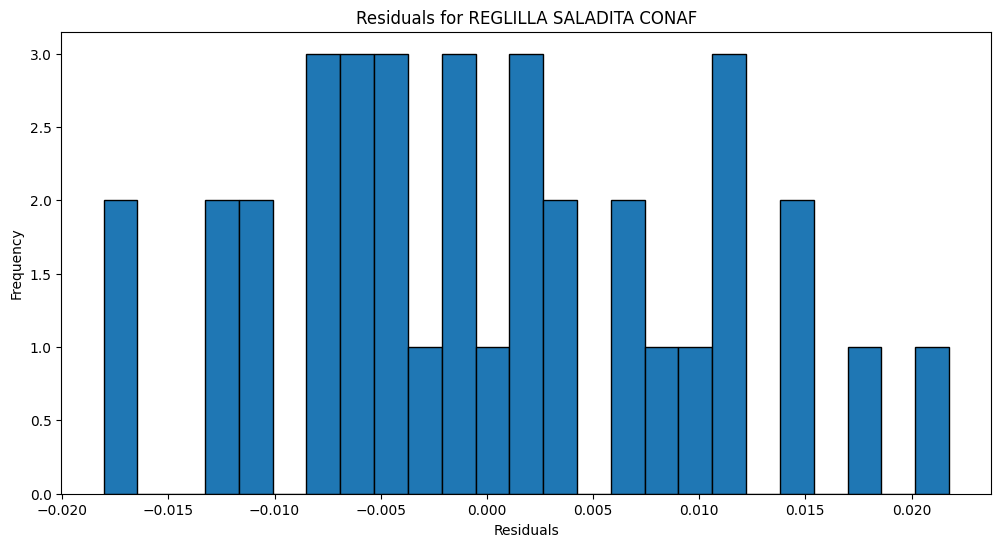

<Figure size 1200x600 with 0 Axes>

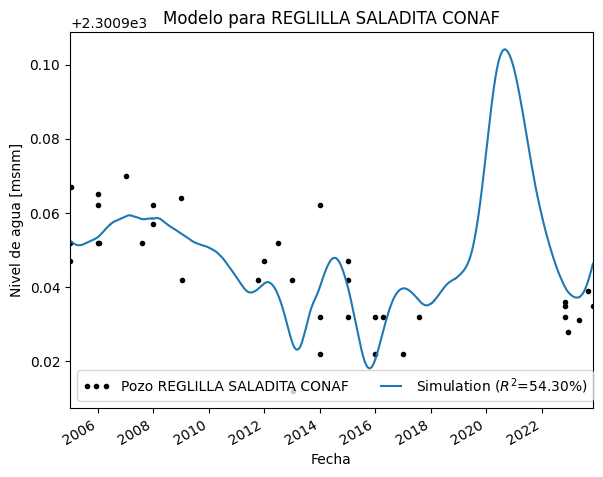

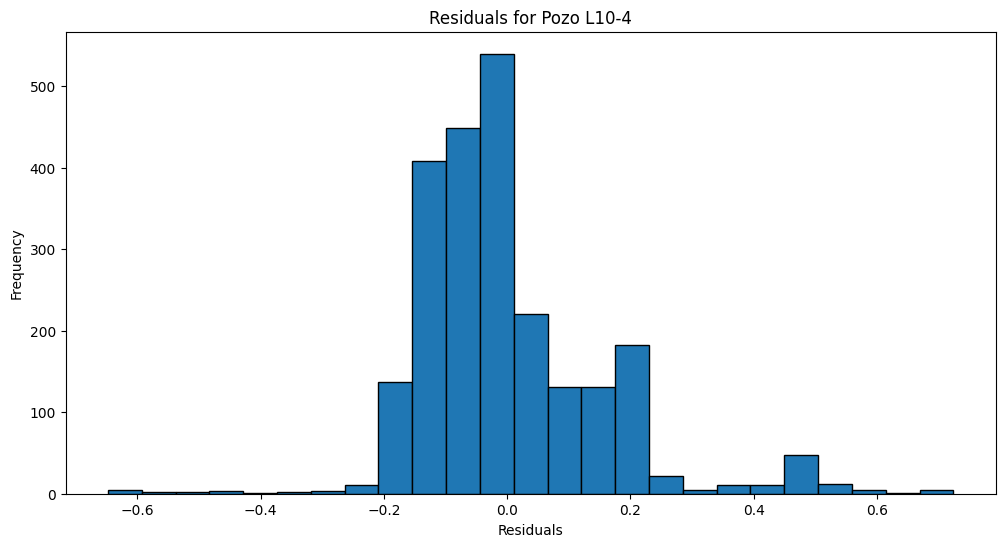

<Figure size 1200x600 with 0 Axes>

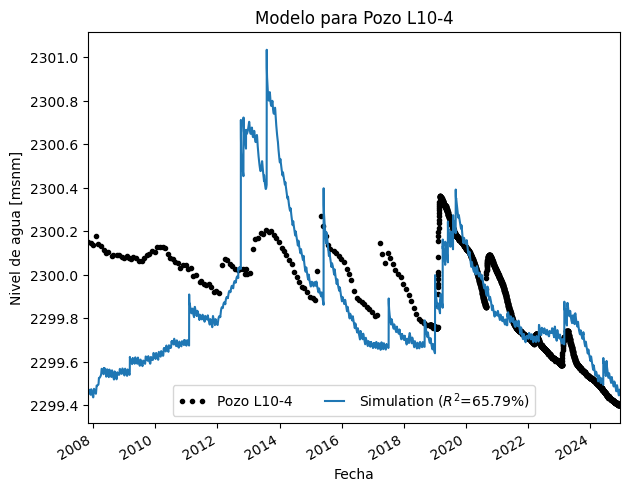

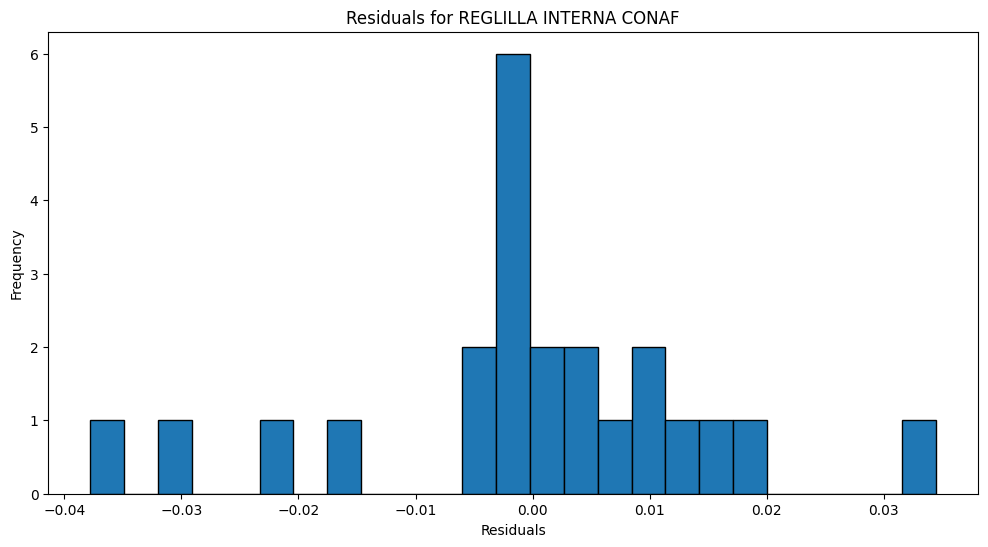

<Figure size 1200x600 with 0 Axes>

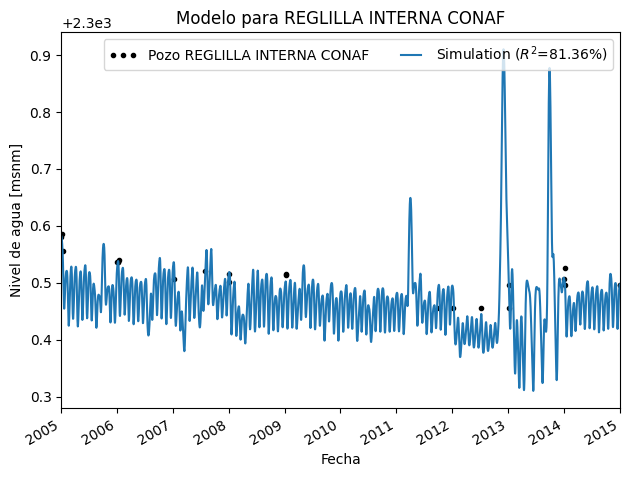

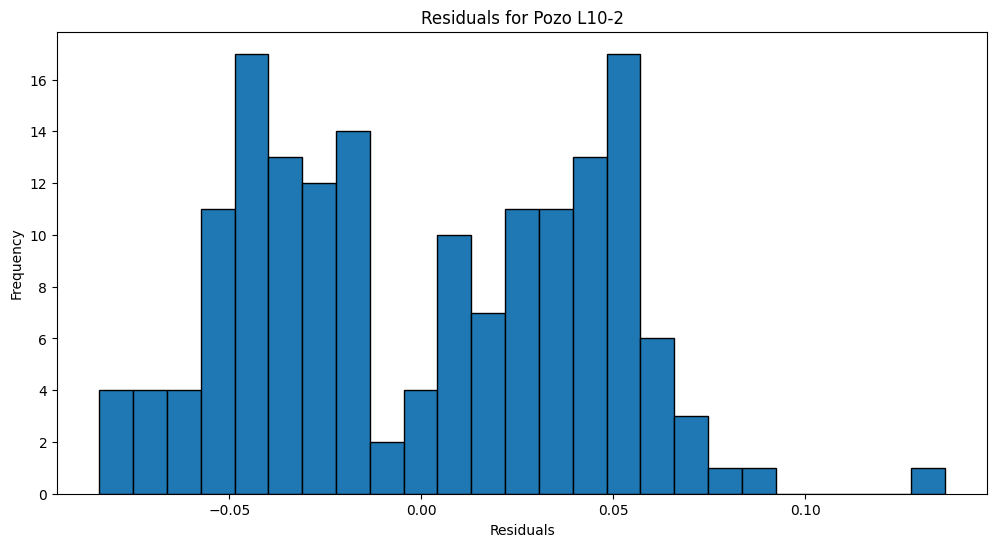

<Figure size 1200x600 with 0 Axes>

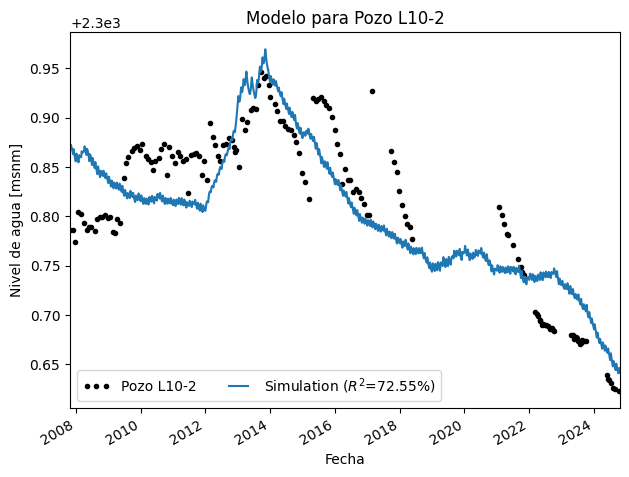

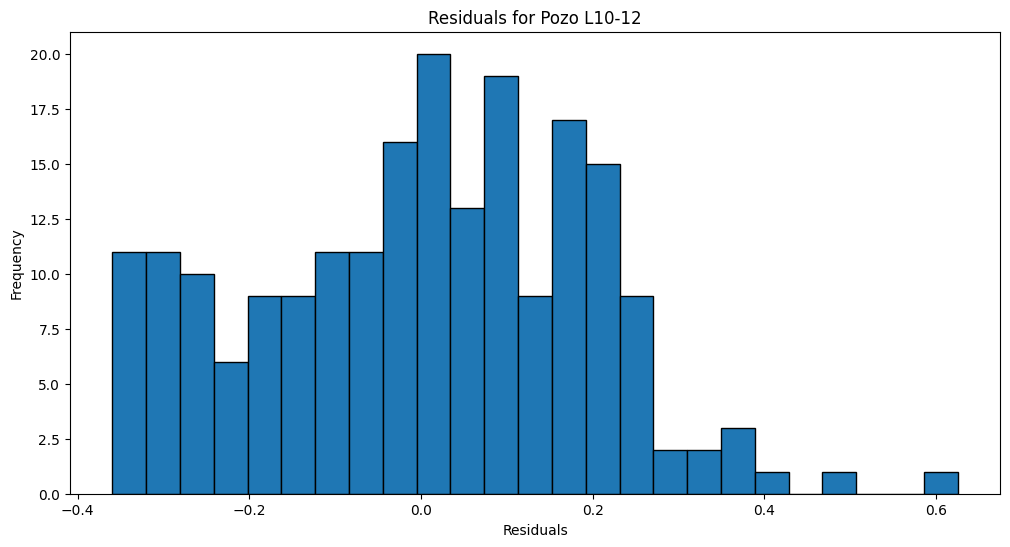

<Figure size 1200x600 with 0 Axes>

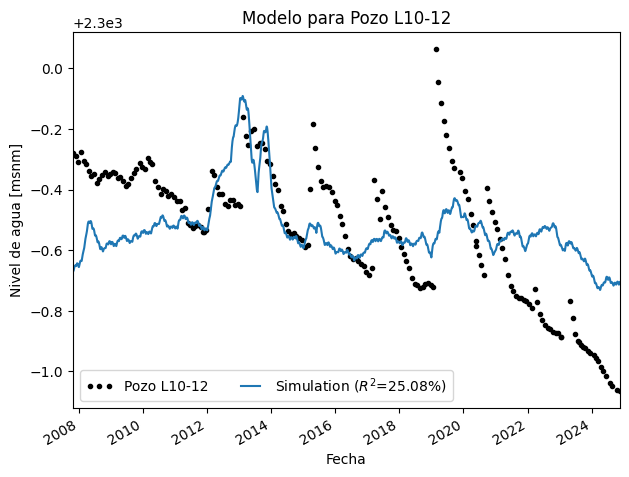

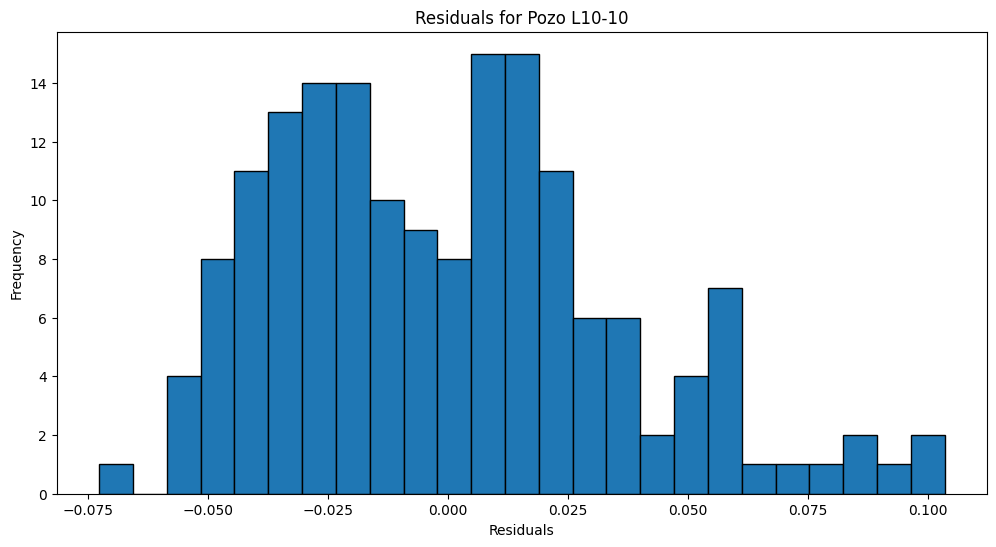

<Figure size 1200x600 with 0 Axes>

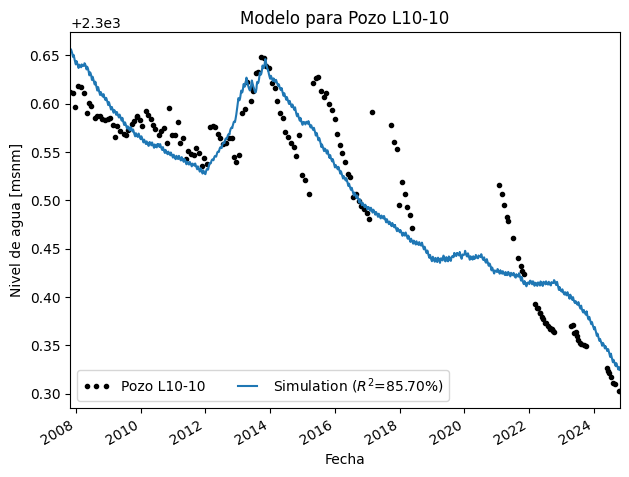

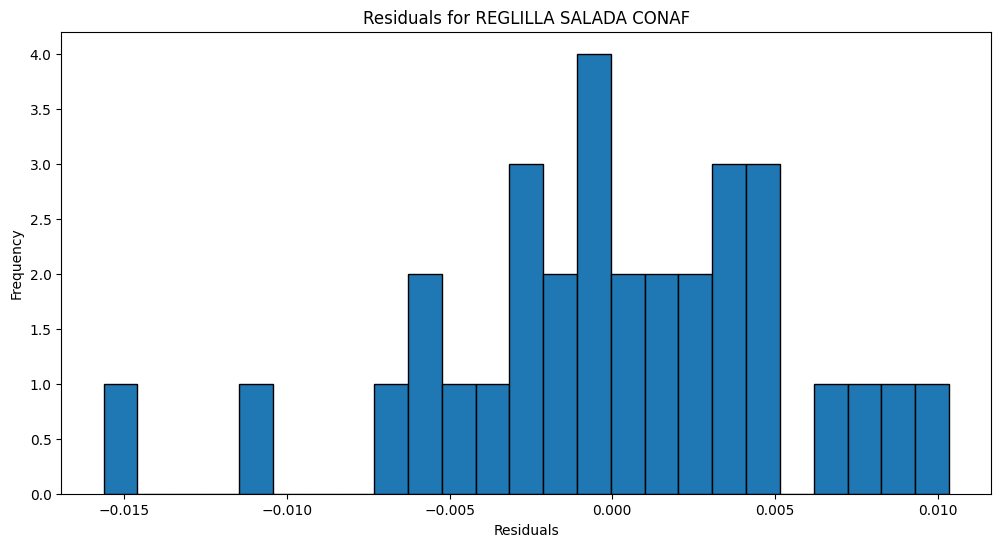

<Figure size 1200x600 with 0 Axes>

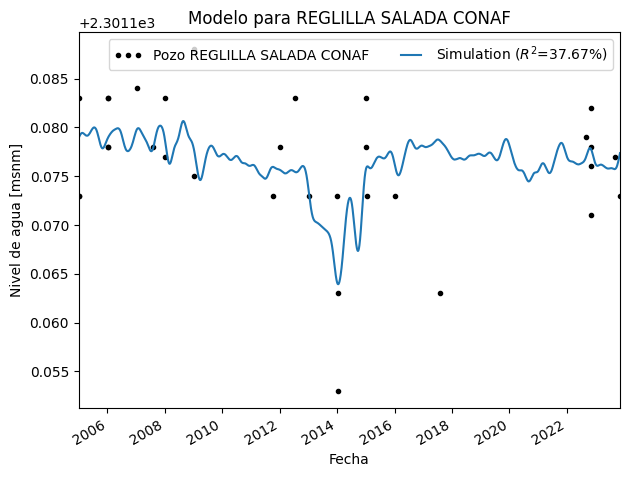

In [127]:

#### Modelo F: Recarga + all



# --- Paso 4: Crear modelos individuales para cada pozo ---
modelos_individuales = {}
model_stats = {}

# Asegurarse de que los índices de las series de precipitación y evaporación sean de tipo datetime
precipitacion.index = pd.to_datetime(precipitacion.index, errors='coerce')
evaporacion.index = pd.to_datetime(evaporacion.index, errors='coerce')

# Eliminar NaNs de los índices de las series de precipitación y evaporación
precipitacion = precipitacion.loc[precipitacion.index.dropna()]
evaporacion = evaporacion.loc[evaporacion.index.dropna()]

# Ordenar los índices de las series de precipitación y evaporación
precipitacion = precipitacion.sort_index()
evaporacion = evaporacion.sort_index()

# Asegurarse de que las series de precipitación y evaporación tengan una frecuencia regular
precipitacion = precipitacion.asfreq('D')
evaporacion = evaporacion.asfreq('D')
# print(precipitacion)
# print(evaporacion)

# plt.plot(precipitacion.index, precipitacion.values)
# plt.plot(evaporacion.index, evaporacion.values)

list_wel = [wel_alb / 86.4, wel_sqm_mop, wel_sqm_sop, wel_tuc /86.4, wel_til / 86.4, wel_neg / 86.4, wel_mon / 86.4]
print(len(list_wel))
print(len(list_wel[0:3]))
dis = [16000,25000,28000,16000,16000,43000,63000]

list_wel2 = list_wel[0:3]

pozos_a_modelar = [
    "Pozo REGLILLA SALADA CONAF", "Pozo L10-10", "Pozo L10-12", 
    "Pozo REGLILLA SALADITA CONAF", "Pozo REGLILLA INTERNA CONAF", "Pozo L10-2", "Pozo L10-2"
]


for pozo, datos in datos_pozos.items():
    if pozo == "REGLILLA SALADA CONAF" or pozo == "Pozo L10-10" or pozo == "Pozo L10-12" or pozo == "REGLILLA SALADITA CONAF" or pozo == "REGLILLA INTERNA CONAF" or pozo == "Pozo L10-2" or pozo == "Pozo L10-4":
        
        # Eliminar NaNs del índice de la serie
        datos = datos.loc[datos.index.dropna()]
        
        # Eliminar índices duplicados
        datos = datos.loc[~datos.index.duplicated(keep='first')]
        
        # Ordenar el índice de la serie
        datos = datos.sort_index()
        
        # Crear un modelo Pastas para el pozo actual
        ml = ps.Model(datos, name=pozo+" Recarga")
        #ml.add_noisemodel(ps.ArNoiseModel()) # Does not help too much
        # distances = [18000,280000000]
        # distances2 = [18000,28000,25000]
        # Añadir series de estrés (precipitación y evaporación)
        #Interna = 0.001
        #all 0.1
        if pozo == "REGLILLA INTERNA CONAF":
            sm_precip = ps.StressModel(precipitacion*0.1, ps.Gamma(), settings="prec", name="precipitacion")#, up=True)
        else:
            sm_precip = ps.StressModel(precipitacion*0.1, ps.Gamma(), settings="prec", name="precipitacion")
            
        sm_evap = ps.StressModel(evaporacion, ps.Gamma(), settings="evap", name="evaporacion")#, up=False)
        
        sm_alb = ps.StressModel(wel_alb / 84.6, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_sqm = ps.StressModel(wel_sqm, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        # sm_wel = ps.WellModel([wel_alb/ 1e6, wel_sqm], "WellModel", distances)
        sm_sqm_mop = ps.StressModel(wel_sqm_mop, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_sqm_sop = ps.StressModel(wel_sqm_sop, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        
        sm_mon = ps.StressModel(wel_mon / 86.4, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_til = ps.StressModel(wel_til / 86.4, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_neg = ps.StressModel(wel_neg / 86.4, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        sm_tuc = ps.StressModel(wel_tuc / 86.4, rfunc=ps.Hantush(), name="well", settings="well", up=False)
        
        # sm_wel2 = ps.WellModel([list_wel[0],list_wel[1]], "WellModel", [dis[0],dis[1]])#dis[0:3])
        sm_wel2 = ps.WellModel(list_wel, "WellModel", dis)
   
        #POZOS
        # sm_rch = ps.RechargeModel(
        #     precipitacion,
        #     evaporacion,
        #     ps.Gamma(),
        #     name="rainevap",
        #     recharge=ps.rch.Peterson(),
        #     settings=("prec", "evap"),
        # )    
        # modelos = ["A","B","C","D"]
        #LAGUNAS
        # for m in modelos:
        #     if m == "A":
        #         if pozo == "Pozo REGLILLA INTERNA CONAF":
        #             f=0.0001
        #         else:
        #             f=0.1
        #         sm_precip = ps.StressModel(precipitacion*f, ps.Gamma(), settings="prec", name="precipitacion")#, up=True)
        #         sm_evap = ps.StressModel(evaporacion, ps.Gamma(), settings="evap", name="evaporacion")#, up=False)
        #         ml.add_stressmodel(sm_precip)
        #         ml.add_stressmodel(sm_evap)
        #         ml.solve() 
        #         ml.
        #     elif m == "B":
                
        # sm_rch = ps.RechargeModel(
        #     precipitacion*0.8,
        #     evaporacion,
        #     ps.Gamma(),
        #     name="rainevap",
        #     recharge=ps.rch.Linear(),
        #     settings=("prec", "evap"),
        # )     
        
        #sm_rch = ps.RechargeModel(precipitacion, evaporacion, ps.Exponential(), "Recharge")
        
        sm_rch = ps.RechargeModel(
            precipitacion*0.8,
            evaporacion,
            ps.Gamma(),
            name="rainevap",
            recharge=ps.rch.Linear(),
            settings=("prec", "evap"),
        )     
        
        #sm_rch = ps.RechargeModel(precipitacion, evaporacion, ps.Exponential(), "Recharge")
        
        if "REGLILLA" in pozo:
            ml.add_stressmodel(sm_precip)
            ml.add_stressmodel(sm_evap)
        else:
            ml.add_stressmodel(sm_rch)
        # ml.add_stressmodel(sm_alb)
        # ml2 = ml.copy(name=pozo+" Recarga + Extracciones")
        # ml.add_stressmodel(sm_sqm_mop)
        # ml.add_stressmodel(sm_sqm_sop)
        # ml.add_stressmodel(sm_sqm)
        # ml.add_stressmodel(sm_mon)
        # ml.add_stressmodel(sm_til)
        # ml.add_stressmodel(sm_neg)
        # ml.add_stressmodel(sm_tuc)
        ml2.add_stressmodel(sm_wel2)
        ml.solve()
        # ml.add_stressmodel(sm_precip)
        # ml.add_stressmodel(sm_evap)
        # ml.add_stressmodel(sm_rch)

        
        
        # ml.add_stressmodel(sm_wel)
        # ml.add_stressmodel(sm_alb)
        #ml.add_stressmodel(sm_sqm)
        # ml.add_stressmodel(sm_sqm_mop)
        # ml.add_stressmodel(sm_sqm_sop)
        # ml2.add_stressmodel(sm_wel2)
        # ml.add_stressmodel(sm_mon)
        # ml2.add_stressmodel(sm_til)
        # ml.add_stressmodel(sm_neg)
        # ml2.add_stressmodel(sm_tuc)
        
        # ml.add_noisemodel(ps.ArmaNoiseModel())
        
        # ml2 = ml.copy(name=pozo+" Modelo A")
        # ml.solve()
        res =  ml.residuals()
        fig = plt.figure(figsize=(12, 6))
        plt.hist(res, bins=25, edgecolor='black')
        plt.xlabel('Residuals')
        plt.ylabel('Frequency')
        plt.title(f'Residuals for {pozo}')
        
        fig = plt.figure(figsize=(12, 6))
        ml.plot()
        plt.ylabel('Nivel de agua [msnm]')
        plt.title(f'Modelo para {pozo}')

   

            
        # Calibrar el modelo
        # mlwel = ml.solve()
        
        # Guardar el modelo en el diccionario
        # modelos_individuales[pozo] = ml

        # Graficar los resultados del modelo individual
        # ml.plot()
        # try:
        #     ml.plots.diagnostics()
        # except:
        #     pass
        # c = ml.get_contributions()
        # print(c)
        
        # report = ml.fit_report()
        # print(report)
        
        
        # try:
        #     ml.plots.diagnostics()
        # except:
        #     pass
            # ml2.plot()
        
        # mc = ps.CompareModels(models=[ml, ml2])
        # mc.plot(adjust_height=True)
        # ml.plots.results(figsize=(10, 6))
        # ml.stats.summary()
        
        r2 = ml.stats.rsq()
        rmse = ml.stats.rmse()
        # except Exception as e:
        #     print(f"Error al resolver el modelo {m} para {pozo}: {e}")
        #     r2, rmse = np.nan, np.nan

        # Guardar modelo y estadísticas
            # Guardar modelo y estadísticas
        modelos_individuales[f"{pozo}_F"] = ml
        model_stats[(pozo)] = {"R²": r2, "RMSE": rmse}

# Convertir estadísticas a DataFrame
        df_model_stats = pd.DataFrame.from_dict(model_stats, orient='index')
        df_model_stats.to_csv("Modelo_F.csv")
        
        # ml2.stats.summary()

        # ml.plots.stacked_results(
        #         figsize=(10, 8),
        #         stacklegend=True,
        #         stackcolors={"Extraction_2": "C1",},
            
        # )
        # plt.title(f"Modelo para el {pozo}")
        # plt.show()
        
